# Making stacked histograms
- processes an `events[year][ch][sample]` object using `make_events_dict()`
- uses `plot_hists()` to make stacked histograms

In [1]:
import glob
import os
import json
import pickle
import yaml
import math

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import pyarrow.parquet as pq
from sklearn.metrics import auc, roc_curve
from scipy.special import softmax

import hist as hist2
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.style.CMS)

import sys
sys.path
sys.path.append("../python/")

import utils

plt.rcParams.update({"font.size": 20})

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# get lumi
with open("../fileset/luminosity.json") as f:
    luminosity = json.load(f)
    
luminosity

{'ele': {'Run2': 137640.0,
  '2016APV': 19492.72,
  '2016': 16809.96,
  '2017': 41476.02,
  '2018': 59816.23},
 'mu': {'Run2': 137640.0,
  '2016APV': 19436.16,
  '2016': 16810.81,
  '2017': 41475.26,
  '2018': 59781.96},
 'lep': {'Run2': 137640.0,
  '2016APV': 19436.16,
  '2016': 16810.81,
  '2017': 41475.26,
  '2018': 59781.96}}

In [4]:
def rename_column(ev_dict, old_name, new_name):
    for year in ev_dict:
        for ch in ev_dict[year]:
            for sample in ev_dict[year][ch]:
                df = ev_dict[year][ch][sample]
                df[new_name] = df[old_name]
                
                # drop old column
                df = df[df.columns.drop(list(df.filter(regex=old_name)))]

# tagger_old = "fj_ParT_score_finetuned_v2_1-12"
# tagger_new = "fj_ParT_score_finetuned_v2_1_12"
# rename_column(events_dict, tagger_old, tagger_new)                

In [690]:
 # define your regions here
presel = {
    
        "mu": {
            "lep_fj_dr": "( ( lep_fj_dr>0.03) )", 
#             "lep_fj_dr": "( ( lep_fj_dr<0.8) )",   
            
            ### signal region
#             "LepIsolation": " ( (lep_pt<55) & (lep_isolation<0.15) ) | (lep_pt>=55)",
#             "LepMisolation": " ( (lep_pt>=55) & (lep_misolation<0.2) ) | (lep_pt<55)",
        },
        "ele": {
            "lep_fj_dr": "( ( lep_fj_dr>0.03) )",
#             "lep_fj_dr": "( ( lep_fj_dr<0.8) )",               
            ### signal region
#             "LepIsolation": " ( (lep_pt<120) & (lep_isolation<0.15) ) | (lep_pt>=120)",
        },
}

samples_dir = {
    "2016":    "../eos/postprocessOct13_hidNeurons_2016",
    "2016APV": "../eos/postprocessOct13_hidNeurons_2016APV",    
    "2017":    "../eos/postprocessOct9_hidNeurons_2017",
    "2018":    "../eos/postprocessOct5_hidNeurons_2018",
}

In [11]:
from make_stacked_hists import make_events_dict
channels = ["ele", "mu"]
samples = [
    "ggF", 
    "VH",
    "VBF",
    "ttH",
    "QCD",
    "DYJets",
    "WJetsLNu",
    "WZQQ",
    "TTbar",
    "SingleTop",
    "Diboson",
    "Data"
]

years = ["2017", "2016", "2016APV", "2018"]
# years = ["2017", "2018"]

events_dictqcd = {}
events_dictqcd["signal_region"] = {}
for year in years:

    out = make_events_dict([year], channels, samples_dir[year], samples, presel, region="signal_region")
    events_dictqcd["signal_region"] = {**events_dictqcd["signal_region"], **out}

INFO:root:Finding QCD_Pt_3200toInf samples and should combine them under QCD_Pt_3200toInf
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 200 events
INFO:root:Will fill the QCD_Pt_3200toInf dataframe with the remaining 200 events
INFO:root:tot event weight 0.0012087925168874974 

INFO:root:Finding QCD_Pt_1800to2400 samples and should combine them under QCD_Pt_1800to2400
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 893 events
INFO:root:Will fill the QCD_Pt_1800to2400 dataframe with the remaining 893 events
INFO:root:tot event weight 0.6085285580482859 

INFO:root:Finding QCD_Pt_2400to3200 samples and should combine them under QCD_Pt_2400to3200
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 634 events
INFO:root:Will fill the QCD_Pt_2400to3200 dataframe with the remaining 634 events
INFO:root:tot event weight 0.044660275131412824 

INFO:root:Finding QCD_Pt_1

INFO:root:Applying lep_fj_dr selection on 8540 events
INFO:root:Will fill the QCD_Pt_600to800 dataframe with the remaining 8540 events
INFO:root:tot event weight 331.9735622076878 

INFO:root:Finding QCD_Pt_300to470 samples and should combine them under QCD_Pt_300to470
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 4745 events
INFO:root:Will fill the QCD_Pt_300to470 dataframe with the remaining 4745 events
INFO:root:tot event weight 9729.561682766527 

INFO:root:Finding QCD_Pt_170to300 samples and should combine them under QCD_Pt_170to300
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 1009 events
INFO:root:Will fill the QCD_Pt_170to300 dataframe with the remaining 1009 events
INFO:root:tot event weight 57873.036969389286 

INFO:root:Finding QCD_Pt_800to1000 samples and should combine them under QCD_Pt_800to1000
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection o

INFO:root:Finding QCD_Pt_1400to1800 samples and should combine them under QCD_Pt_1400to1800
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 1784 events
INFO:root:Will fill the QCD_Pt_1400to1800 dataframe with the remaining 1784 events
INFO:root:tot event weight 1.928422900222035 

INFO:root:Finding QCD_Pt_3200toInf samples and should combine them under QCD_Pt_3200toInf
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 90 events
INFO:root:Will fill the QCD_Pt_3200toInf dataframe with the remaining 90 events
INFO:root:tot event weight 0.00022410875843321748 

INFO:root:Finding QCD_Pt_1800to2400 samples and should combine them under QCD_Pt_1800to2400
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 503 events
INFO:root:Will fill the QCD_Pt_1800to2400 dataframe with the remaining 503 events
INFO:root:tot event weight 0.15402035467955416 

INFO:root:Finding QCD_Pt_24

INFO:root:Applying lep_fj_dr selection on 1050 events
INFO:root:Will fill the QCD_Pt_600to800 dataframe with the remaining 1050 events
INFO:root:tot event weight 487.13521191069447 

INFO:root:Finding QCD_Pt_300to470 samples and should combine them under QCD_Pt_300to470
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 774 events
INFO:root:Will fill the QCD_Pt_300to470 dataframe with the remaining 774 events
INFO:root:tot event weight 15585.149072054874 

INFO:root:Finding QCD_Pt_170to300 samples and should combine them under QCD_Pt_170to300
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 255 events
INFO:root:Will fill the QCD_Pt_170to300 dataframe with the remaining 255 events
INFO:root:tot event weight 78223.97131109594 

INFO:root:Finding QCD_Pt_800to1000 samples and should combine them under QCD_Pt_800to1000
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 1

In [691]:
from make_stacked_hists import make_events_dict
channels = ["ele", "mu"]
samples = [
    "ggF", 
    "VH",
    "VBF",
    "ttH",
    "QCD",
    "DYJets",
    "WJetsLNu",
    "WZQQ",
    "TTbar",
    "SingleTop",
    "Diboson",
    "Data"
]

years = ["2017", "2016", "2016APV", "2018"]
# years = ["2017", "2018"]

events_dict2 = {}
events_dict2["signal_region"] = {}
for year in years:

    out = make_events_dict([year], channels, samples_dir[year], samples, presel, region="signal_region")
    events_dict2["signal_region"] = {**events_dict2["signal_region"], **out}

INFO:root:Finding DYJetsToLL_M-50_HT-600to800 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 165029 events
INFO:root:Will fill the DYJets dataframe with the remaining 165029 events
INFO:root:tot event weight 3057.8149388615484 

INFO:root:Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 3841 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 3841 events
INFO:root:tot event weight 6124.89967450774 

INFO:root:Finding DYJetsToLL_M-10to50 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 362 events
INFO:root:Will fill the DYJets dataframe with the remaining 362 events
INFO:root:tot event weight 6294.187524951826 

INFO:root:Finding DYJetsToLL_Pt-400To650 samples and should combine 

INFO:root:Will fill the WJetsLNu dataframe with the remaining 166 events
INFO:root:tot event weight 289.69795840326003 

INFO:root:Finding SingleMuon_Run2017C samples and should combine them under Data
INFO:root:No parquet file for SingleMuon_Run2017C
INFO:root:Finding ST_s-channel_4f_leptonDecays samples and should combine them under SingleTop
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 27132 events
INFO:root:Will fill the SingleTop dataframe with the remaining 27132 events
INFO:root:tot event weight 90.69283597942014 

INFO:root:Finding SingleMuon_Run2017D samples and should combine them under Data
INFO:root:No parquet file for SingleMuon_Run2017D
INFO:root:Finding DYJetsToLL_Pt-50To100 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 20199 events
INFO:root:Will fill the DYJets dataframe with the remaining 20199 events
INFO:root:tot event weight 3209.1

INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 57465 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 57465 events
INFO:root:tot event weight 71.17365548664372 

INFO:root:Finding ttHToNonbb_M125 samples and should combine them under ttH
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 11238 events
INFO:root:Will fill the ttH dataframe with the remaining 11238 events
INFO:root:tot event weight 39.50339569654196 

INFO:root:Finding ZJetsToQQ_HT-800toInf samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 1308 events
INFO:root:Will fill the WZQQ dataframe with the remaining 1308 events
INFO:root:tot event weight 103.37385465732507 

INFO:root:Finding SingleElectron_Run2017F samples and should combine them under Data
INFO:root:Applying lep_fj_dr selection on 137982 events
INFO:root:Will fill the Data dat

INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 138315 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 138315 events
INFO:root:tot event weight 67457.97977424678 

INFO:root:Finding ST_tW_top_5f_inclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 11206 events
INFO:root:Will fill the SingleTop dataframe with the remaining 11206 events
INFO:root:tot event weight 2582.080510774146 

INFO:root:Finding GluGluHToWW_Pt-200ToInf_M-125 samples and should combine them under ggF
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 17893 events
INFO:root:Will fill the ggF dataframe with the remaining 17893 events
INFO:root:tot event weight 147.14511546667495 

INFO:root:Finding WJetsToQQ_HT-200to400 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:r

INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 9478 events
INFO:root:Will fill the Diboson dataframe with the remaining 9478 events
INFO:root:tot event weight 0.08743811300908065 

INFO:root:Finding DYJetsToLL_M-50_HT-2500toInf samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 38007 events
INFO:root:Will fill the DYJets dataframe with the remaining 38007 events
INFO:root:tot event weight 5.579411705979712 

INFO:root:Finding QCD_Pt_1000to1400 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 1477 events
INFO:root:Will fill the QCD dataframe with the remaining 1477 events
INFO:root:tot event weight 24.665749862048806 

INFO:root:Finding QCD_Pt_600to800 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selecti

INFO:root:Will fill the WJetsLNu dataframe with the remaining 1145 events
INFO:root:tot event weight 1926.6166714307708 

INFO:root:Finding SingleMuon_Run2016H samples and should combine them under Data
INFO:root:No parquet file for SingleMuon_Run2016H
INFO:root:Finding SingleMuon_Run2016F samples and should combine them under Data
INFO:root:No parquet file for SingleMuon_Run2016F
INFO:root:Finding DYJetsToLL_Pt-400To650 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 125157 events
INFO:root:Will fill the DYJets dataframe with the remaining 125157 events
INFO:root:tot event weight 497.3189873526905 

INFO:root:Finding VBFHToWWToLNuQQ_M-125_withDipoleRecoil samples and should combine them under VBF
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 452 events
INFO:root:Will fill the VBF dataframe with the remaining 452 events
INFO:root:tot event weight 16.62353

INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 1039 events
INFO:root:Will fill the QCD dataframe with the remaining 1039 events
INFO:root:tot event weight 0.2886557931570866 

INFO:root:Finding WW samples and should combine them under Diboson
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 4102 events
INFO:root:Will fill the Diboson dataframe with the remaining 4102 events
INFO:root:tot event weight 323.54851477656155 

INFO:root:Finding ST_t-channel_antitop_4f_InclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 10311 events
INFO:root:Will fill the SingleTop dataframe with the remaining 10311 events
INFO:root:tot event weight 307.91992267796627 

INFO:root:Finding TTTo2L2Nu samples and should combine them under TTbar
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selec

INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 28380 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 28380 events
INFO:root:tot event weight 14445.864402895784 

INFO:root:Finding QCD_Pt_470to600 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 5881 events
INFO:root:Will fill the QCD dataframe with the remaining 5881 events
INFO:root:tot event weight 1013.1771165358141 

INFO:root:Finding HZJ_HToWW_M-125 samples and should combine them under VH
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 11855 events
INFO:root:Will fill the VH dataframe with the remaining 11855 events
INFO:root:tot event weight 6.12594250554714 

INFO:root:Finding WZ samples and should combine them under Diboson
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 1724 events
INFO:root:Wil

INFO:root:tot event weight 1028.2374553868199 

INFO:root:Finding ZJetsToQQ_HT-200to400 samples and should combine them under WZQQ
INFO:root:Finding QCD_Pt_120to170 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 23 events
INFO:root:Will fill the QCD dataframe with the remaining 23 events
INFO:root:tot event weight 5963.542453053595 

INFO:root:Finding DYJetsToLL_M-50_HT-800to1200 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 2738 events
INFO:root:Will fill the DYJets dataframe with the remaining 2738 events
INFO:root:tot event weight 442.19441737895386 

INFO:root:Finding QCD_Pt_3200toInf samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 93 events
INFO:root:Will fill the QCD dataframe with the remaining 93 events
INFO:root:tot even

INFO:root:Will fill the WJetsLNu dataframe with the remaining 73761 events
INFO:root:tot event weight 8458.858734537953 

INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 400 events
INFO:root:Will fill the WZQQ dataframe with the remaining 400 events
INFO:root:tot event weight 73.70197191660186 

INFO:root:Finding DYJetsToLL_M-50_HT-100to200 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 436 events
INFO:root:Will fill the DYJets dataframe with the remaining 436 events
INFO:root:tot event weight 581.4454819133431 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 48459 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 48459 event

INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 77435 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 77435 events
INFO:root:tot event weight 1087.6926178924978 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 40308 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 40308 events
INFO:root:tot event weight 20983.82143392765 

INFO:root:Finding ST_tW_top_5f_inclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 4144 events
INFO:root:Will fill the SingleTop dataframe with the remaining 4144 events
INFO:root:tot event weight 1074.5663791753607 

INFO:root:Finding GluGluHToWW_Pt-200ToInf_M-125 samples and should combine them under ggF
INFO:root:---> Using already stored event weight

INFO:root:Applying lep_fj_dr selection on 636 events
INFO:root:Will fill the DYJets dataframe with the remaining 636 events
INFO:root:tot event weight 4.0220358598270725 

INFO:root:Finding QCD_Pt_1000to1400 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 2643 events
INFO:root:Will fill the QCD dataframe with the remaining 2643 events
INFO:root:tot event weight 19.96626451393177 

INFO:root:Finding SingleElectron_Run2016D_HIPM samples and should combine them under Data
INFO:root:Applying lep_fj_dr selection on 42553 events
INFO:root:Will fill the Data dataframe with the remaining 42553 events
INFO:root:tot event weight 42553.0 

INFO:root:Finding QCD_Pt_600to800 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 6524 events
INFO:root:Will fill the QCD dataframe with the remaining 6524 events
INFO:root:tot event weight 341

INFO:root:Will fill the DYJets dataframe with the remaining 6627 events
INFO:root:tot event weight 953.9831799903618 

INFO:root:Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 1391 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 1391 events
INFO:root:tot event weight 2172.248426507894 

INFO:root:Finding DYJetsToLL_Pt-400To650 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 24752 events
INFO:root:Will fill the DYJets dataframe with the remaining 24752 events
INFO:root:tot event weight 101.5519149578942 

INFO:root:Finding VBFHToWWToLNuQQ_M-125_withDipoleRecoil samples and should combine them under VBF
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 657 events
INFO:root:Will fill the VBF dataframe with the remaining 6

INFO:root:tot event weight 0.15402035467955416 

INFO:root:Finding WW samples and should combine them under Diboson
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 3959 events
INFO:root:Will fill the Diboson dataframe with the remaining 3959 events
INFO:root:tot event weight 392.7278174204025 

INFO:root:Finding SingleMuon_Run2016D_HIPM samples and should combine them under Data
INFO:root:Applying lep_fj_dr selection on 35656 events
INFO:root:Will fill the Data dataframe with the remaining 35656 events
INFO:root:tot event weight 35656.0 

INFO:root:Finding ST_t-channel_antitop_4f_InclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 16469 events
INFO:root:Will fill the SingleTop dataframe with the remaining 16469 events
INFO:root:tot event weight 553.1999260880441 

INFO:root:Finding TTTo2L2Nu samples and should combine them under TTbar
INFO:ro

INFO:root:Finding ZJetsToQQ_HT-800toInf samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 608 events
INFO:root:Will fill the WZQQ dataframe with the remaining 608 events
INFO:root:tot event weight 49.502009118841556 

INFO:root:Finding QCD_Pt_800to1000 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 2728 events
INFO:root:Will fill the QCD dataframe with the remaining 2728 events
INFO:root:tot event weight 37.37880755368852 

INFO:root:Finding WJetsToQQ_HT-400to600 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 115 events
INFO:root:Will fill the WZQQ dataframe with the remaining 115 events
INFO:root:tot event weight 99.45824221304892 

INFO:root:Finding WJetsToLNu_HT-400To600 samples and should combine them under WJetsLNu
INFO:root:---

INFO:root:Finding ST_tW_top_5f_inclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 13317 events
INFO:root:Will fill the SingleTop dataframe with the remaining 13317 events
INFO:root:tot event weight 3144.476440270807 

INFO:root:Finding GluGluHToWW_Pt-200ToInf_M-125 samples and should combine them under ggF
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 11028 events
INFO:root:Will fill the ggF dataframe with the remaining 11028 events
INFO:root:tot event weight 128.7535937083168 

INFO:root:Finding WJetsToQQ_HT-200to400 samples and should combine them under WZQQ
INFO:root:No parquet file for WJetsToQQ_HT-200to400
INFO:root:Finding ST_tW_antitop_5f_inclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 13111 events
INFO:root:Will fill the Singl

INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 1880 events
INFO:root:Will fill the WZQQ dataframe with the remaining 1880 events
INFO:root:tot event weight 333.1282460282311 

INFO:root:Finding DYJetsToLL_M-50_HT-1200to2500 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 5117 events
INFO:root:Will fill the DYJets dataframe with the remaining 5117 events
INFO:root:tot event weight 617.2541055594716 

INFO:root:Finding ZJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 916 events
INFO:root:Will fill the WZQQ dataframe with the remaining 916 events
INFO:root:tot event weight 175.3906835300559 

INFO:root:Finding postprocessing.py samples and should combine them under postprocessing.py
INFO:root:No parquet file for postprocessing.py
INFO:root:Finding QCD_Pt

INFO:root:Finding VBFHToWWToLNuQQ_M-125_withDipoleRecoil samples and should combine them under VBF
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 567 events
INFO:root:Will fill the VBF dataframe with the remaining 567 events
INFO:root:tot event weight 75.79792196020279 

INFO:root:Finding HWminusJ_HToWW_M-125 samples and should combine them under VH
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 12560 events
INFO:root:Will fill the VH dataframe with the remaining 12560 events
INFO:root:tot event weight 11.117461757703678 

INFO:root:Finding DYJetsToLL_M-50_HT-70to100 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 2 events
INFO:root:Will fill the DYJets dataframe with the remaining 2 events
INFO:root:tot event weight 74.74621609351613 

INFO:root:Finding .DS_Store samples and should combine them under .DS_Store
I

INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 229 events
INFO:root:Will fill the QCD dataframe with the remaining 229 events
INFO:root:tot event weight 0.02364363009805965 

INFO:root:Finding DYJetsToLL_Pt-650ToInf samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 37113 events
INFO:root:Will fill the DYJets dataframe with the remaining 37113 events
INFO:root:tot event weight 45.79969143825934 

INFO:root:Finding GluGluHToTauTau samples and should combine them under HTauTau
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 331 events
INFO:root:Will fill the HTauTau dataframe with the remaining 331 events
INFO:root:tot event weight 4.629107108031669 

INFO:root:Finding ZJetsToQQ_HT-400to600 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection

INFO:root:Finding QCD_Pt_470to600 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 669 events
INFO:root:Will fill the QCD dataframe with the remaining 669 events
INFO:root:tot event weight 1578.2963535079466 

INFO:root:Finding HZJ_HToWW_M-125 samples and should combine them under VH
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 30598 events
INFO:root:Will fill the VH dataframe with the remaining 30598 events
INFO:root:tot event weight 25.506741345492713 

INFO:root:Finding WZ samples and should combine them under Diboson
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 1286 events
INFO:root:Will fill the Diboson dataframe with the remaining 1286 events
INFO:root:tot event weight 266.9562701291628 

INFO:root:Finding QCD_Pt_1400to1800 samples and should combine them under QCD
INFO:root:---> Using already stored event 

In [6]:
from make_stacked_hists import make_events_dict
channels = ["ele", "mu"]
samples = [
    "ggF", 
    "VH",
    "VBF",
    "ttH",
    "QCD",
    "DYJets",
    "WJetsLNu",
    "WZQQ",
    "TTbar",
    "SingleTop",
    "Diboson",
    "Data"
]

years = ["2017", "2016", "2016APV", "2018"]
# years = ["2017", "2018"]

events_dict = {}
events_dict["signal_region"] = {}
events_dict["qcd_region"] = {}
for year in years:

    out = make_events_dict([year], channels, samples_dir[year], samples, presel, region="signal_region")
    events_dict["signal_region"] = {**events_dict["signal_region"], **out}
    
    out = make_events_dict([year], channels, samples_dir[year], samples, presel, region="qcd_region")
    events_dict["qcd_region"] = {**events_dict["qcd_region"], **out}

INFO:root:Finding DYJetsToLL_M-50_HT-600to800 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 165029 events
INFO:root:Will fill the DYJets dataframe with the remaining 165029 events
INFO:root:tot event weight 3057.8149388615484 

INFO:root:Finding WJetsToLNu_HT-100To200 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 3841 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 3841 events
INFO:root:tot event weight 6124.89967450774 

INFO:root:Finding DYJetsToLL_M-10to50 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 362 events
INFO:root:Will fill the DYJets dataframe with the remaining 362 events
INFO:root:tot event weight 6294.187524951826 

INFO:root:Finding DYJetsToLL_Pt-400To650 samples and should combine 

INFO:root:Will fill the WJetsLNu dataframe with the remaining 166 events
INFO:root:tot event weight 289.69795840326003 

INFO:root:Finding SingleMuon_Run2017C samples and should combine them under Data
INFO:root:No parquet file for SingleMuon_Run2017C
INFO:root:Finding ST_s-channel_4f_leptonDecays samples and should combine them under SingleTop
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 27132 events
INFO:root:Will fill the SingleTop dataframe with the remaining 27132 events
INFO:root:tot event weight 90.69283597942014 

INFO:root:Finding SingleMuon_Run2017D samples and should combine them under Data
INFO:root:No parquet file for SingleMuon_Run2017D
INFO:root:Finding DYJetsToLL_Pt-50To100 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 20199 events
INFO:root:Will fill the DYJets dataframe with the remaining 20199 events
INFO:root:tot event weight 3209.1

Skipping sample QCD_Pt_170to300


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 128874 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 128874 events
INFO:root:tot event weight 14833.776501705954 

INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 1583 events
INFO:root:Will fill the WZQQ dataframe with the remaining 1583 events
INFO:root:tot event weight 396.3541785274009 

INFO:root:Finding DYJetsToLL_M-50_HT-100to200 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 34 events
INFO:root:Will fill the DYJets dataframe with the remaining 34 events
INFO:root:tot event weight 2114.9784792550163 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying l

INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 283 events
INFO:root:Will fill the SingleTop dataframe with the remaining 283 events
INFO:root:tot event weight 2.090611570966458 

INFO:root:Finding DYJetsToLL_M-50_HT-400to600 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 65854 events
INFO:root:Will fill the DYJets dataframe with the remaining 65854 events
INFO:root:tot event weight 6141.2992090984635 

INFO:root:Finding WJetsToLNu_HT-1200To2500 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 270374 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 270374 events
INFO:root:tot event weight 3658.474959665805 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:r

INFO:root:Finding ZJetsToQQ_HT-400to600 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 359 events
INFO:root:Will fill the WZQQ dataframe with the remaining 359 events
INFO:root:tot event weight 168.89175999168293 

INFO:root:Finding ZZ samples and should combine them under Diboson
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 391 events
INFO:root:Will fill the Diboson dataframe with the remaining 391 events
INFO:root:tot event weight 73.18860291039695 

INFO:root:Finding TTToHadronic samples and should combine them under TTbar
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 3507 events
INFO:root:Will fill the TTbar dataframe with the remaining 3507 events
INFO:root:tot event weight 465.78947728988766 

INFO:root:Finding GluGluZH_HToWW_ZTo2L_M-125 samples and should combine them under Diboson
INFO:root:---> Using a

Skipping sample QCD_Pt_170to300


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 175965 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 175965 events
INFO:root:tot event weight 20625.548931703273 

INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 682 events
INFO:root:Will fill the WZQQ dataframe with the remaining 682 events
INFO:root:tot event weight 159.40836848700047 

INFO:root:Finding DYJetsToLL_M-50_HT-100to200 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 22 events
INFO:root:Will fill the DYJets dataframe with the remaining 22 events
INFO:root:tot event weight 1305.1437907853483 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying le

INFO:root:tot event weight 629.3002642810478 

INFO:root:Finding ST_s-channel_4f_hadronicDecays samples and should combine them under SingleTop
INFO:root:No parquet file for ST_s-channel_4f_hadronicDecays
INFO:root:Finding DYJetsToLL_M-50_HT-400to600 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 61476 events
INFO:root:Will fill the DYJets dataframe with the remaining 61476 events
INFO:root:tot event weight 5286.0094880152865 

INFO:root:Finding WJetsToLNu_HT-1200To2500 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 126363 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 126363 events
INFO:root:tot event weight 1647.8780996118498 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_

INFO:root:Finding ZJetsToQQ_HT-400to600 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 414 events
INFO:root:Will fill the WZQQ dataframe with the remaining 414 events
INFO:root:tot event weight 206.33034391280495 

INFO:root:Finding ZZ samples and should combine them under Diboson
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 548 events
INFO:root:Will fill the Diboson dataframe with the remaining 548 events
INFO:root:tot event weight 94.13604323960818 

INFO:root:Finding TTToHadronic samples and should combine them under TTbar
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 2024 events
INFO:root:Will fill the TTbar dataframe with the remaining 2024 events
INFO:root:tot event weight 237.14627180215987 

INFO:root:Finding GluGluZH_HToWW_ZTo2L_M-125 samples and should combine them under Diboson
INFO:root:---> Using a

Skipping sample QCD_Pt_170to300


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 66404 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 66404 events
INFO:root:tot event weight 7576.046031364624 

INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 1394 events
INFO:root:Will fill the WZQQ dataframe with the remaining 1394 events
INFO:root:tot event weight 351.8288020926672 

INFO:root:Finding DYJetsToLL_M-50_HT-100to200 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 27 events
INFO:root:Will fill the DYJets dataframe with the remaining 27 events
INFO:root:tot event weight 1599.8949706370356 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_

INFO:root:Finding DYJetsToLL_M-50_HT-400to600 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 2975 events
INFO:root:Will fill the DYJets dataframe with the remaining 2975 events
INFO:root:tot event weight 275.47402088695384 

INFO:root:Finding WJetsToLNu_HT-1200To2500 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 19015 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 19015 events
INFO:root:tot event weight 263.64164290735977 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 6141 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 6141 events
INFO:root:tot event weight 2890.5840268513057 

INFO:root:Finding ST_tW_top_5f_inclusiveDecays samples a

INFO:root:tot event weight 2299.631681903229 

INFO:root:Finding ZZ samples and should combine them under Diboson
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 134 events
INFO:root:Will fill the Diboson dataframe with the remaining 134 events
INFO:root:tot event weight 24.079502289185733 

INFO:root:Finding TTToHadronic samples and should combine them under TTbar
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 52249 events
INFO:root:Will fill the TTbar dataframe with the remaining 52249 events
INFO:root:tot event weight 6300.0452736484785 

INFO:root:Finding GluGluZH_HToWW_ZTo2L_M-125 samples and should combine them under Diboson
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 811 events
INFO:root:Will fill the Diboson dataframe with the remaining 811 events
INFO:root:tot event weight 0.006879805976764382 

INFO:root:Finding DYJetsToLL_M-50_HT-2500toInf sam

Skipping sample QCD_Pt_170to300


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 12921 events
INFO:root:Will fill the WZQQ dataframe with the remaining 12921 events
INFO:root:tot event weight 3056.5440890395903 

INFO:root:Finding DYJetsToLL_M-50_HT-100to200 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 2 events
INFO:root:Will fill the DYJets dataframe with the remaining 2 events
INFO:root:tot event weight 138.0459883624747 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 6155 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 6155 events
INFO:root:tot event weight 7.880818881206833 

INFO:root:Finding ttHToNonbb_M125 samples and should combine them under ttH
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr sel

INFO:root:Applying lep_fj_dr selection on 53 events
INFO:root:Will fill the SingleTop dataframe with the remaining 53 events
INFO:root:tot event weight 0.3656495809965531 

INFO:root:Finding WJetsToLNu_HT-1200To2500 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 80571 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 80571 events
INFO:root:tot event weight 1020.8087020620566 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 35486 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 35486 events
INFO:root:tot event weight 19690.326851379636 

INFO:root:Finding ST_tW_top_5f_inclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 4758 even

INFO:root:Will fill the Diboson dataframe with the remaining 11775 events
INFO:root:tot event weight 0.0858832461690919 

INFO:root:Finding DYJetsToLL_M-50_HT-2500toInf samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 35826 events
INFO:root:Will fill the DYJets dataframe with the remaining 35826 events
INFO:root:tot event weight 4.062472709089403 

INFO:root:Finding QCD_Pt_1000to1400 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 3009 events
INFO:root:Will fill the QCD dataframe with the remaining 3009 events
INFO:root:tot event weight 19.164749670259724 

INFO:root:Finding QCD_Pt_600to800 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 8540 events
INFO:root:Will fill the QCD dataframe with the remaining 8540 events
INFO:root:tot ev

Skipping sample QCD_Pt_170to300


INFO:root:Finding DYJetsToLL_M-50_HT-100to200 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 538 events
INFO:root:Will fill the DYJets dataframe with the remaining 538 events
INFO:root:tot event weight 726.8547793602328 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 33311 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 33311 events
INFO:root:tot event weight 27.598308986171013 

INFO:root:Finding ttHToNonbb_M125 samples and should combine them under ttH
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 10323 events
INFO:root:Will fill the ttH dataframe with the remaining 10323 events
INFO:root:tot event weight 15.385283218685437 

INFO:root:Finding ZJetsToQQ_HT-800toInf samples and should combine them und

INFO:root:tot event weight 0.7858300774467486 

INFO:root:Finding WJetsToLNu_HT-1200To2500 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 117564 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 117564 events
INFO:root:tot event weight 1477.7969870092504 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 45901 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 45901 events
INFO:root:tot event weight 25138.8948262408 

INFO:root:Finding ST_tW_top_5f_inclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 4821 events
INFO:root:Will fill the SingleTop dataframe with the remaining 4821 events
INFO:root:tot event weight 1008.4171427995715 


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 4707 events
INFO:root:Will fill the QCD dataframe with the remaining 4707 events
INFO:root:tot event weight 177.71933933836655 

INFO:root:Finding QCD_Pt_300to470 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 2585 events
INFO:root:Will fill the QCD dataframe with the remaining 2585 events
INFO:root:tot event weight 5178.457719540677 

INFO:root:Finding WJetsToQQ_HT-800toInf samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 551 events
INFO:root:Will fill the WZQQ dataframe with the remaining 551 events
INFO:root:tot event weight 50.95994659862771 

INFO:root:Finding DYJetsToLL_M-50_HT-1200to2500 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 

Skipping sample QCD_Pt_170to300


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 73761 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 73761 events
INFO:root:tot event weight 8458.858734537953 

INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 400 events
INFO:root:Will fill the WZQQ dataframe with the remaining 400 events
INFO:root:tot event weight 73.70197191660186 

INFO:root:Finding DYJetsToLL_M-50_HT-100to200 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 436 events
INFO:root:Will fill the DYJets dataframe with the remaining 436 events
INFO:root:tot event weight 581.4454819133431 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_f

INFO:root:Will fill the SingleTop dataframe with the remaining 48 events
INFO:root:tot event weight 0.3456988376433379 

INFO:root:Finding WJetsToLNu_HT-1200To2500 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 52776 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 52776 events
INFO:root:tot event weight 659.2336312864455 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 22458 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 22458 events
INFO:root:tot event weight 12596.22542899543 

INFO:root:Finding ST_tW_top_5f_inclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 2974 events
INFO:root:Will fill the SingleTop dataframe with th

INFO:root:tot event weight 0.05705430282935839 

INFO:root:Finding DYJetsToLL_M-50_HT-2500toInf samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 27437 events
INFO:root:Will fill the DYJets dataframe with the remaining 27437 events
INFO:root:tot event weight 3.0884007024155027 

INFO:root:Finding QCD_Pt_1000to1400 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 2738 events
INFO:root:Will fill the QCD dataframe with the remaining 2738 events
INFO:root:tot event weight 17.66850883613887 

INFO:root:Finding QCD_Pt_600to800 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 7827 events
INFO:root:Will fill the QCD dataframe with the remaining 7827 events
INFO:root:tot event weight 306.04350410569714 

INFO:root:Finding QCD_Pt_300to470 samples

Skipping sample QCD_Pt_170to300


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 479 events
INFO:root:Will fill the DYJets dataframe with the remaining 479 events
INFO:root:tot event weight 652.5152845289226 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 24350 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 24350 events
INFO:root:tot event weight 19.816920953344507 

INFO:root:Finding ttHToNonbb_M125 samples and should combine them under ttH
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 5425 events
INFO:root:Will fill the ttH dataframe with the remaining 5425 events
INFO:root:tot event weight 8.162273114227776 

INFO:root:Finding ZJetsToQQ_HT-800toInf samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selectio

INFO:root:tot event weight 115.45412558526193 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 2108 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 2108 events
INFO:root:tot event weight 1165.3192694665502 

INFO:root:Finding ST_tW_top_5f_inclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 914 events
INFO:root:Will fill the SingleTop dataframe with the remaining 914 events
INFO:root:tot event weight 192.16891590910484 

INFO:root:Finding SingleElectron_Run2016H samples and should combine them under Data
INFO:root:No parquet file for SingleElectron_Run2016H
INFO:root:Finding GluGluHToWW_Pt-200ToInf_M-125 samples and should combine them under ggF
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 

INFO:root:tot event weight 330.2853347745167 

INFO:root:Finding QCD_Pt_600to800 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 147387 events
INFO:root:Will fill the QCD dataframe with the remaining 147387 events
INFO:root:tot event weight 5459.208146438083 

INFO:root:Finding QCD_Pt_300to470 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 63950 events
INFO:root:Will fill the QCD dataframe with the remaining 63950 events
INFO:root:tot event weight 125220.71636188951 

INFO:root:Finding WJetsToQQ_HT-800toInf samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 16116 events
INFO:root:Will fill the WZQQ dataframe with the remaining 16116 events
INFO:root:tot event weight 1466.2672460971048 

INFO:root:Finding DYJetsToLL_M-50_HT-1200to2500 sa

Skipping sample QCD_Pt_170to300


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 4032 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 4032 events
INFO:root:tot event weight 3.3915745471391836 

INFO:root:Finding ttHToNonbb_M125 samples and should combine them under ttH
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 1542 events
INFO:root:Will fill the ttH dataframe with the remaining 1542 events
INFO:root:tot event weight 2.247055623163675 

INFO:root:Finding ZJetsToQQ_HT-800toInf samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 16693 events
INFO:root:Will fill the WZQQ dataframe with the remaining 16693 events
INFO:root:tot event weight 899.0117052841448 

INFO:root:Finding QCD_Pt_800to1000 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 94350 e

INFO:root:tot event weight 1074.5663791753607 

INFO:root:Finding GluGluHToWW_Pt-200ToInf_M-125 samples and should combine them under ggF
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 6336 events
INFO:root:Will fill the ggF dataframe with the remaining 6336 events
INFO:root:tot event weight 43.35694058427548 

INFO:root:Finding WJetsToQQ_HT-200to400 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 6 events
INFO:root:Will fill the WZQQ dataframe with the remaining 6 events
INFO:root:tot event weight 51.21398910916603 

INFO:root:Finding ST_tW_antitop_5f_inclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 4119 events
INFO:root:Will fill the SingleTop dataframe with the remaining 4119 events
INFO:root:tot event weight 1079.5300815396884 

INFO:root:Finding ZJe

INFO:root:Applying lep_fj_dr selection on 6524 events
INFO:root:Will fill the QCD dataframe with the remaining 6524 events
INFO:root:tot event weight 341.71796411530676 

INFO:root:Finding QCD_Pt_300to470 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 4348 events
INFO:root:Will fill the QCD dataframe with the remaining 4348 events
INFO:root:tot event weight 10229.92883598261 

INFO:root:Finding WJetsToQQ_HT-800toInf samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 1563 events
INFO:root:Will fill the WZQQ dataframe with the remaining 1563 events
INFO:root:tot event weight 114.49943085450349 

INFO:root:Finding DYJetsToLL_M-50_HT-1200to2500 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 18140 events
INFO:root:Will fill the DYJets da

Skipping sample QCD_Pt_170to300


INFO:root:Applying lep_fj_dr selection on 25541 events
INFO:root:Will fill the Data dataframe with the remaining 25541 events
INFO:root:tot event weight 25541.0 

INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 1222 events
INFO:root:Will fill the WZQQ dataframe with the remaining 1222 events
INFO:root:tot event weight 175.16278509198156 

INFO:root:Finding DYJetsToLL_M-50_HT-100to200 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 95 events
INFO:root:Will fill the DYJets dataframe with the remaining 95 events
INFO:root:tot event weight 738.4966200766956 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 36148 events
INFO:root:Will fill the WJetsLN

INFO:root:tot event weight 1.3693438315899278 

INFO:root:Finding DYJetsToLL_M-50_HT-400to600 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 2555 events
INFO:root:Will fill the DYJets dataframe with the remaining 2555 events
INFO:root:tot event weight 2780.299167321417 

INFO:root:Finding WJetsToLNu_HT-1200To2500 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 116504 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 116504 events
INFO:root:tot event weight 1647.9240821183596 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 52559 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 52559 events
INFO:root:tot event weight 27326.64681781931 

INFO:r

INFO:root:Finding GluGluZH_HToWW_ZTo2L_M-125 samples and should combine them under Diboson
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 4619 events
INFO:root:Will fill the Diboson dataframe with the remaining 4619 events
INFO:root:tot event weight 0.03716734738651073 

INFO:root:Finding DYJetsToLL_M-50_HT-2500toInf samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 394 events
INFO:root:Will fill the DYJets dataframe with the remaining 394 events
INFO:root:tot event weight 2.5651493870953597 

INFO:root:Finding QCD_Pt_1000to1400 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 1537 events
INFO:root:Will fill the QCD dataframe with the remaining 1537 events
INFO:root:tot event weight 11.315214510473464 

INFO:root:Finding SingleElectron_Run2016D_HIPM samples and should combine

Skipping sample QCD_Pt_170to300


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 74559 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 74559 events
INFO:root:tot event weight 9425.321642981278 

INFO:root:Finding SingleElectron_Run2016C_HIPM samples and should combine them under Data
INFO:root:No parquet file for SingleElectron_Run2016C_HIPM
INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 590 events
INFO:root:Will fill the WZQQ dataframe with the remaining 590 events
INFO:root:tot event weight 81.1332243034965 

INFO:root:Finding DYJetsToLL_M-50_HT-100to200 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 77 events
INFO:root:Will fill the DYJets dataframe with the remaining 77 events
INFO:root:tot event weight 581.4877064593703 

INFO:root:Findin

INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 42 events
INFO:root:Will fill the SingleTop dataframe with the remaining 42 events
INFO:root:tot event weight 0.38259426290348286 

INFO:root:Finding DYJetsToLL_M-50_HT-400to600 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 2299 events
INFO:root:Will fill the DYJets dataframe with the remaining 2299 events
INFO:root:tot event weight 2382.666200021753 

INFO:root:Finding WJetsToLNu_HT-1200To2500 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 50698 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 50698 events
INFO:root:tot event weight 690.6631373967141 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:A

INFO:root:Will fill the TTbar dataframe with the remaining 2059 events
INFO:root:tot event weight 109.48138321784867 

INFO:root:Finding GluGluZH_HToWW_ZTo2L_M-125 samples and should combine them under Diboson
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 7137 events
INFO:root:Will fill the Diboson dataframe with the remaining 7137 events
INFO:root:tot event weight 0.058621678578608824 

INFO:root:Finding DYJetsToLL_M-50_HT-2500toInf samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 489 events
INFO:root:Will fill the DYJets dataframe with the remaining 489 events
INFO:root:tot event weight 3.0345110496987315 

INFO:root:Finding QCD_Pt_1000to1400 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 2405 events
INFO:root:Will fill the QCD dataframe with the remaining 2405 events
I

Skipping sample QCD_Pt_170to300


INFO:root:Applying lep_fj_dr selection on 16633 events
INFO:root:Will fill the Data dataframe with the remaining 16633 events
INFO:root:tot event weight 16633.0 

INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 1073 events
INFO:root:Will fill the WZQQ dataframe with the remaining 1073 events
INFO:root:tot event weight 154.48301400105112 

INFO:root:Finding DYJetsToLL_M-50_HT-100to200 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 83 events
INFO:root:Will fill the DYJets dataframe with the remaining 83 events
INFO:root:tot event weight 638.0363444248067 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 26205 events
INFO:root:Will fill the WJetsLN

INFO:root:Will fill the DYJets dataframe with the remaining 126 events
INFO:root:tot event weight 140.72459936899864 

INFO:root:Finding WJetsToLNu_HT-1200To2500 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 8996 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 8996 events
INFO:root:tot event weight 131.53353002783237 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 2488 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 2488 events
INFO:root:tot event weight 1302.3108554089379 

INFO:root:Finding ST_tW_top_5f_inclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 830 events
INFO:root:Will fill the SingleTop dataframe with the rem

INFO:root:Will fill the DYJets dataframe with the remaining 24 events
INFO:root:tot event weight 0.1672324571169535 

INFO:root:Finding QCD_Pt_1000to1400 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 48004 events
INFO:root:Will fill the QCD dataframe with the remaining 48004 events
INFO:root:tot event weight 359.8099055539113 

INFO:root:Finding SingleElectron_Run2016D_HIPM samples and should combine them under Data
INFO:root:No parquet file for SingleElectron_Run2016D_HIPM
INFO:root:Finding QCD_Pt_600to800 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 116078 events
INFO:root:Will fill the QCD dataframe with the remaining 116078 events
INFO:root:tot event weight 6066.189990962642 

INFO:root:Finding QCD_Pt_300to470 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:

Skipping sample QCD_Pt_170to300


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 4483 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 4483 events
INFO:root:tot event weight 3.7960481580967693 

INFO:root:Finding ttHToNonbb_M125 samples and should combine them under ttH
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 1304 events
INFO:root:Will fill the ttH dataframe with the remaining 1304 events
INFO:root:tot event weight 2.426240983751155 

INFO:root:Finding ZJetsToQQ_HT-800toInf samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 12254 events
INFO:root:Will fill the WZQQ dataframe with the remaining 12254 events
INFO:root:tot event weight 1010.2149555466852 

INFO:root:Finding QCD_Pt_800to1000 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 84332 

INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 229616 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 229616 events
INFO:root:tot event weight 3317.247106812116 

INFO:root:Finding WJetsToLNu_HT-200To400 samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 122853 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 122853 events
INFO:root:tot event weight 62102.341247773926 

INFO:root:Finding ST_tW_top_5f_inclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 13317 events
INFO:root:Will fill the SingleTop dataframe with the remaining 13317 events
INFO:root:tot event weight 3144.476440270807 

INFO:root:Finding GluGluHToWW_Pt-200ToInf_M-125 samples and should combine them under ggF
INFO:root:---> Using already stored event w

INFO:root:Applying lep_fj_dr selection on 2004 events
INFO:root:Will fill the QCD dataframe with the remaining 2004 events
INFO:root:tot event weight 923.4473966228413 

INFO:root:Finding QCD_Pt_300to470 samples and should combine them under QCD
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 1302 events
INFO:root:Will fill the QCD dataframe with the remaining 1302 events
INFO:root:tot event weight 26064.644018933832 

INFO:root:Finding WJetsToQQ_HT-800toInf samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 1880 events
INFO:root:Will fill the WZQQ dataframe with the remaining 1880 events
INFO:root:tot event weight 333.1282460282311 

INFO:root:Finding DYJetsToLL_M-50_HT-1200to2500 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 5117 events
INFO:root:Will fill the DYJets data

Skipping sample QCD_Pt_170to300


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 158881 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 158881 events
INFO:root:tot event weight 19220.06623100519 

INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 1249 events
INFO:root:Will fill the WZQQ dataframe with the remaining 1249 events
INFO:root:tot event weight 472.2003056477325 

INFO:root:Finding DYJetsToLL_M-50_HT-100to200 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 3029 events
INFO:root:Will fill the DYJets dataframe with the remaining 3029 events
INFO:root:tot event weight 2070.933464876749 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying

INFO:root:Finding TTToSemiLeptonic samples and should combine them under TTbar
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 797153 events
INFO:root:Will fill the TTbar dataframe with the remaining 797153 events
INFO:root:tot event weight 112822.40885757854 

INFO:root:Finding DYJetsToLL_Pt-250To400 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 156197 events
INFO:root:Will fill the DYJets dataframe with the remaining 156197 events
INFO:root:tot event weight 1536.761666538279 

INFO:root:Finding ST_t-channel_top_4f_InclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 102142 events
INFO:root:Will fill the SingleTop dataframe with the remaining 102142 events
INFO:root:tot event weight 3306.122229992744 

INFO:root:Finding ST_s-channel_4f_hadronicDecays sam

INFO:root:tot event weight 81.24455514612788 

INFO:root:Finding TTToHadronic samples and should combine them under TTbar
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 3133 events
INFO:root:Will fill the TTbar dataframe with the remaining 3133 events
INFO:root:tot event weight 552.6739006162173 

INFO:root:Finding GluGluZH_HToWW_ZTo2L_M-125 samples and should combine them under Diboson
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 7720 events
INFO:root:Will fill the Diboson dataframe with the remaining 7720 events
INFO:root:tot event weight 0.10519940624901056 

INFO:root:Finding DYJetsToLL_M-50_HT-2500toInf samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 26239 events
INFO:root:Will fill the DYJets dataframe with the remaining 26239 events
INFO:root:tot event weight 7.157707405899838 

INFO:root:Finding QCD_Pt_

Skipping sample QCD_Pt_170to300


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 216126 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 216126 events
INFO:root:tot event weight 26839.196695986695 

INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 491 events
INFO:root:Will fill the WZQQ dataframe with the remaining 491 events
INFO:root:tot event weight 184.33997978533074 

INFO:root:Finding DYJetsToLL_M-50_HT-100to200 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 2824 events
INFO:root:Will fill the DYJets dataframe with the remaining 2824 events
INFO:root:tot event weight 1959.6775901930503 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applyin

INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 338921 events
INFO:root:Will fill the TTbar dataframe with the remaining 338921 events
INFO:root:tot event weight 47602.5784542099 

INFO:root:Finding DYJetsToLL_Pt-250To400 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 535775 events
INFO:root:Will fill the DYJets dataframe with the remaining 535775 events
INFO:root:tot event weight 5582.769242856433 

INFO:root:Finding ST_t-channel_top_4f_InclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 26174 events
INFO:root:Will fill the SingleTop dataframe with the remaining 26174 events
INFO:root:tot event weight 812.3119233253092 

INFO:root:Finding ST_s-channel_4f_hadronicDecays samples and should combine them under SingleTop
INFO:root:---> Using already stored ev

INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 576 events
INFO:root:Will fill the Diboson dataframe with the remaining 576 events
INFO:root:tot event weight 116.58336676727735 

INFO:root:Finding TTToHadronic samples and should combine them under TTbar
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 1613 events
INFO:root:Will fill the TTbar dataframe with the remaining 1613 events
INFO:root:tot event weight 282.1285129204701 

INFO:root:Finding GluGluZH_HToWW_ZTo2L_M-125 samples and should combine them under Diboson
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 12696 events
INFO:root:Will fill the Diboson dataframe with the remaining 12696 events
INFO:root:tot event weight 0.17265822278956328 

INFO:root:Finding DYJetsToLL_M-50_HT-2500toInf samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_

Skipping sample QCD_Pt_170to300


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 80158 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 80158 events
INFO:root:tot event weight 9558.638389903977 

INFO:root:Finding WJetsToQQ_HT-600to800 samples and should combine them under WZQQ
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 1026 events
INFO:root:Will fill the WZQQ dataframe with the remaining 1026 events
INFO:root:tot event weight 389.30849366799475 

INFO:root:Finding DYJetsToLL_M-50_HT-100to200 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 2691 events
INFO:root:Will fill the DYJets dataframe with the remaining 2691 events
INFO:root:tot event weight 1840.6500331322725 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying

INFO:root:tot event weight 8491.48950396299 

INFO:root:Finding DYJetsToLL_Pt-250To400 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 3472 events
INFO:root:Will fill the DYJets dataframe with the remaining 3472 events
INFO:root:tot event weight 37.775360935493495 

INFO:root:Finding ST_t-channel_top_4f_InclusiveDecays samples and should combine them under SingleTop
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 22496 events
INFO:root:Will fill the SingleTop dataframe with the remaining 22496 events
INFO:root:tot event weight 719.4954888040029 

INFO:root:Finding ST_s-channel_4f_hadronicDecays samples and should combine them under SingleTop
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 4885 events
INFO:root:Will fill the SingleTop dataframe with the remaining 4885 events
INFO:root:tot event weight 37.60934675926

INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 161 events
INFO:root:Will fill the Diboson dataframe with the remaining 161 events
INFO:root:tot event weight 32.70866662167665 

INFO:root:Finding TTToHadronic samples and should combine them under TTbar
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 47545 events
INFO:root:Will fill the TTbar dataframe with the remaining 47545 events
INFO:root:tot event weight 8303.03388245646 

INFO:root:Finding GluGluZH_HToWW_ZTo2L_M-125 samples and should combine them under Diboson
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 702 events
INFO:root:Will fill the Diboson dataframe with the remaining 702 events
INFO:root:tot event weight 0.009564068449736948 

INFO:root:Finding DYJetsToLL_M-50_HT-2500toInf samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_

Skipping sample QCD_Pt_170to300


INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 10802 events
INFO:root:Will fill the WZQQ dataframe with the remaining 10802 events
INFO:root:tot event weight 4010.325035636277 

INFO:root:Finding DYJetsToLL_M-50_HT-100to200 samples and should combine them under DYJets
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 92 events
INFO:root:Will fill the DYJets dataframe with the remaining 92 events
INFO:root:tot event weight 62.43802203244665 

INFO:root:Finding WJetsToLNu_HT-2500ToInf samples and should combine them under WJetsLNu
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr selection on 9509 events
INFO:root:Will fill the WJetsLNu dataframe with the remaining 9509 events
INFO:root:tot event weight 9.801749461666091 

INFO:root:Finding ttHToNonbb_M125 samples and should combine them under ttH
INFO:root:---> Using already stored event weight
INFO:root:Applying lep_fj_dr se

In [9]:
events_dict.keys()

dict_keys(['signal_region', 'qcd_region'])

In [10]:
events_dict["signal_region"].keys()

dict_keys(['2017', '2016', '2016APV', '2018'])

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Work in Progress'))

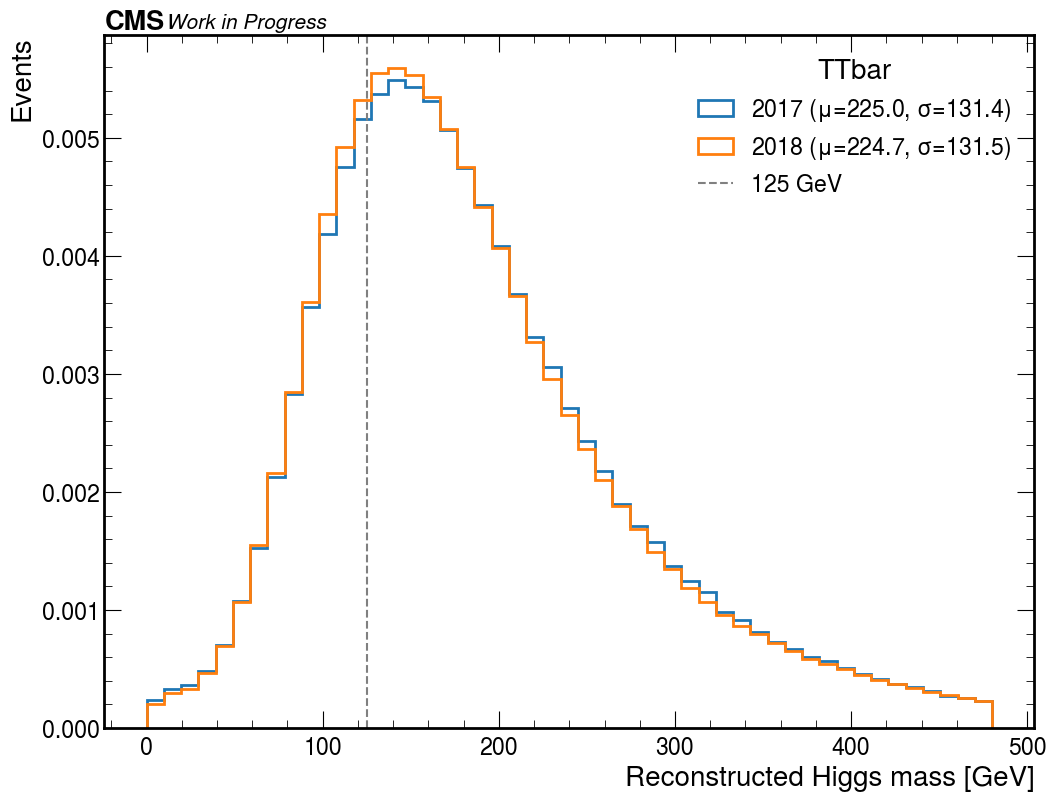

In [187]:
plt.rcParams.update({"font.size": 20})

bins = 50

nice_ch = {
    "ele": "ELECTRON",
    "mu": "MUON",
}

sample = "TTbar"
channels = ["ele", "mu"]
region = "signal_region"

fig, ax = plt.subplots(figsize=(12, 9))

for year in ["2017", "2018"]:
        
    df1 = events_dict[region][year]["mu"][sample]    
    df2 = events_dict[region][year]["ele"][sample]

    df = pd.concat([df1, df2])
    
    x = df["rec_higgs_m"]
    w = df["event_weight"]
    ax.hist(
        x, 
        bins=np.linspace(0,480,bins), 
        weights=w,
        density=True, 
        histtype="step", 
        linewidth=2, 
        label=rf"{year} ($\mu$={np.mean(x):.1f}, $\sigma$={np.std(x):.1f})"
    )

ax.axvline(125, color="grey", linestyle="--", label=rf"125 GeV")

if len(channels) > 1:
    ax.legend(title=f"{sample}")    
else:
    ax.legend(title=f"{nice_ch[ch]} channel - {sample}")


ax.set_ylabel("Events")
ax.set_xlabel(f"Reconstructed Higgs mass [GeV]")
ax.set_ylim(0)

# hep.cms.lumitext("%.1f " % luminosity + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
# plt.savefig(f"/Users/fmokhtar/Desktop/farakiko/{sample}.pdf")        

In [11]:
# tagger_cuts = [0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.8]
# tagger_cuts = [0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95]
# tagger_cuts = np.linspace(0.7, 0.97, 28)

# tagger_cuts = [0.95, 0.955, 0.96, 0.965, 0.97, 0.975, 0.98, 0.985, 0.99]
# tagger_cuts = [0.90, 0.925, 0.95, 0.975, 0.99]

tagger_cuts = np.linspace(0.9, 0.99, 19)
# tagger_cuts = np.linspace(0.9, 0.99, 19*2-1)
# tagger_cuts = np.linspace(0.2, 0.97, 30)
# tagger_cuts = np.linspace(0.1, 0.85, 25)

# wp = 0.85
mass_window = [50, 200]

years = ["2017", "2018", "2016", "2016APV"]
channels = ["ele", "mu"]

s_over_b = {}

for tagger in [
    "fj_ParT_score",
#     "fj_ParT_score_finetuned",
#     "fj_ParT_score_finetuned_HPO",

    f"fj_ParT_score_finetuned_v2_nor2",
#         f"fj_ParT_score_finetuned_v2_nor3",
#         f"fj_ParT_score_finetuned_v2_nor4",
#         f"fj_ParT_score_finetuned_v2_nor5", 

#         f"fj_ParT_score_finetuned_v2_nors1",
#         f"fj_ParT_score_finetuned_v2_nors2",
]:

        
    print("TAGGER:", tagger)
    s_over_b[tagger] = []

    for tagger_cut in tagger_cuts:
        print("tagger cut", tagger_cut)
        s, b = 0, 0
        for year in years:
            for ch in channels:
                for sample in events_dict["signal_region"][year][ch]:
                    df = events_dict["signal_region"][year][ch][sample]

                    # add tagger cut
                    df = df[df[tagger]>tagger_cut]
                    # add mass window
                    df = df[(df["rec_higgs_m"]>mass_window[0]) & (df["rec_higgs_m"]<mass_window[1])]

                    # remove high weight events
                    df = df[df["event_weight"]<145]

                    # add inverted tagger cut
#                     df = df[df[tagger]<wp]

                    ##############################    
                    if "WJets" in sample:
                        s += df["event_weight"].sum()
                    else:
                        b += df["event_weight"].sum()

        s_over_b[tagger].append(s/math.sqrt(b))

TAGGER: fj_ParT_score
tagger cut 0.9
tagger cut 0.905
tagger cut 0.91
tagger cut 0.915
tagger cut 0.92
tagger cut 0.925
tagger cut 0.93
tagger cut 0.935
tagger cut 0.9400000000000001
tagger cut 0.9450000000000001
tagger cut 0.95
tagger cut 0.955
tagger cut 0.96
tagger cut 0.965
tagger cut 0.97
tagger cut 0.975
tagger cut 0.98
tagger cut 0.985
tagger cut 0.99
TAGGER: fj_ParT_score_finetuned_v2_nor2
tagger cut 0.9
tagger cut 0.905
tagger cut 0.91
tagger cut 0.915
tagger cut 0.92
tagger cut 0.925
tagger cut 0.93
tagger cut 0.935
tagger cut 0.9400000000000001
tagger cut 0.9450000000000001
tagger cut 0.95
tagger cut 0.955
tagger cut 0.96
tagger cut 0.965
tagger cut 0.97
tagger cut 0.975
tagger cut 0.98
tagger cut 0.985
tagger cut 0.99


In [19]:
# tagger_cuts = [0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.8]
# tagger_cuts = [0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95]


# tagger_cuts = [0.95, 0.955, 0.96, 0.965, 0.97, 0.975, 0.98, 0.985, 0.99]
# tagger_cuts = [0.90, 0.925, 0.95, 0.975, 0.99]

# tagger_cuts = np.linspace(0.9, 0.99, 19)
tagger_cuts = np.linspace(0.7, 0.97, 28)
# tagger_cuts = np.linspace(0.1, 0.85, 25)

wp = 0.97
mass_window = [80, 160]

years = ["2017", "2018", "2016", "2016APV"]

channels = ["ele", "mu"]

s_over_b = {}

for tagger in [
    "fj_ParT_score",
#     "fj_ParT_score_finetuned",
#     "fj_ParT_score_finetuned_HPO",

    f"fj_ParT_score_finetuned_v2_nor2",
#         f"fj_ParT_score_finetuned_v2_nor3",
#         f"fj_ParT_score_finetuned_v2_nor4",
#         f"fj_ParT_score_finetuned_v2_nor5", 

#         f"fj_ParT_score_finetuned_v2_nors1",
#         f"fj_ParT_score_finetuned_v2_nors2",
]:

        
    print("TAGGER:", tagger)
    s_over_b[tagger] = []

    for tagger_cut in tagger_cuts:
        print("tagger cut", tagger_cut)
        s, b = 0, 0
        for year in years:
            for ch in channels:
                for sample in events_dict["signal_region"][year][ch]:
                    if sample=="Data":
                        continue
                        
                    df = events_dict["signal_region"][year][ch][sample]

                    # add tagger cut
                    df = df[df[tagger]>tagger_cut]
                    # add mass window
                    df = df[(df["rec_higgs_m"]>mass_window[0]) & (df["rec_higgs_m"]<mass_window[1])]

                    # remove high weight events
                    df = df[df["event_weight"]<145]

                    # add inverted tagger cut
                    df = df[df[tagger]<wp]

                    ##############################    
                    if sample in utils.signals:
                        s += df["event_weight"].sum()
                    else:
                        b += df["event_weight"].sum()

        s_over_b[tagger].append(s/math.sqrt(b))

TAGGER: fj_ParT_score
tagger cut 0.7
tagger cut 0.71
tagger cut 0.72
tagger cut 0.73
tagger cut 0.74
tagger cut 0.75
tagger cut 0.76
tagger cut 0.77
tagger cut 0.7799999999999999
tagger cut 0.7899999999999999
tagger cut 0.7999999999999999
tagger cut 0.8099999999999999
tagger cut 0.82
tagger cut 0.83
tagger cut 0.84
tagger cut 0.85
tagger cut 0.86
tagger cut 0.87
tagger cut 0.8799999999999999
tagger cut 0.8899999999999999
tagger cut 0.8999999999999999
tagger cut 0.9099999999999999
tagger cut 0.9199999999999999
tagger cut 0.9299999999999999
tagger cut 0.94
tagger cut 0.95
tagger cut 0.96
tagger cut 0.97


/var/folders/d7/p4v84gls67vdp9_q2rkkvkch0000gn/T/ipykernel_73990/3119391320.py:67: RuntimeWarning: invalid value encountered in double_scalars
  s_over_b[tagger].append(s/math.sqrt(b))


TAGGER: fj_ParT_score_finetuned_v2_nor2
tagger cut 0.7
tagger cut 0.71
tagger cut 0.72
tagger cut 0.73
tagger cut 0.74
tagger cut 0.75
tagger cut 0.76
tagger cut 0.77
tagger cut 0.7799999999999999
tagger cut 0.7899999999999999
tagger cut 0.7999999999999999
tagger cut 0.8099999999999999
tagger cut 0.82
tagger cut 0.83
tagger cut 0.84
tagger cut 0.85
tagger cut 0.86
tagger cut 0.87
tagger cut 0.8799999999999999
tagger cut 0.8899999999999999
tagger cut 0.8999999999999999
tagger cut 0.9099999999999999
tagger cut 0.9199999999999999
tagger cut 0.9299999999999999
tagger cut 0.94
tagger cut 0.95
tagger cut 0.96
tagger cut 0.97


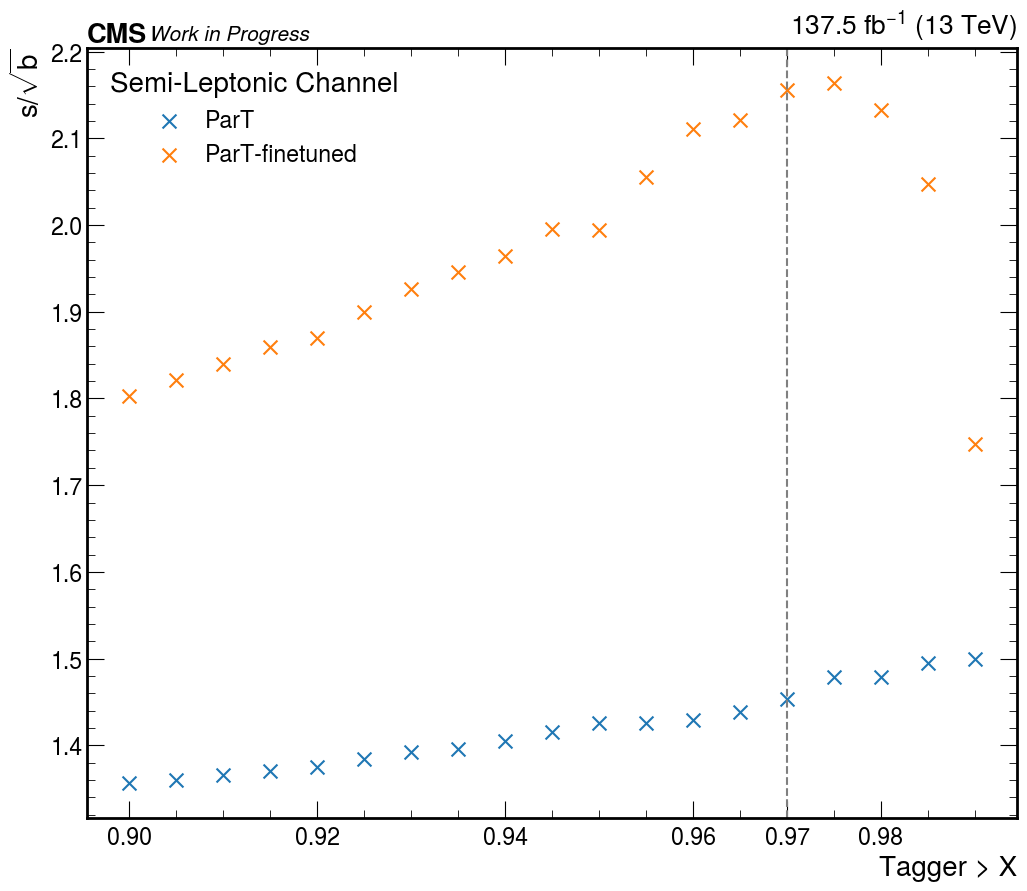

In [18]:
color_dict = {
    "fj_ParT_score": "tab:blue",
    "fj_ParT_score_finetuned": "tab:red",
    "fj_ParT_score_finetuned_HPO": "tab:green",
    "fj_ParT_score_finetuned_v2_nor2": "tab:orange",
}

lab_dict = {    
    "fj_ParT_score": "ParT",
    "fj_ParT_score_finetuned": "ParT-finetuned",
#     "fj_ParT_score_finetuned_HPO": "ParT-finetuned (HPO)",
    "fj_ParT_score_finetuned_HPO": "ParT-finetuned",    
#     "fj_ParT_score_finetuned_v2_nor2": "ParT-finetuned-singlelayer (HPO)",
    "fj_ParT_score_finetuned_v2_nor2": "ParT-finetuned-singlelayer",
    "fj_ParT_score_finetuned_v2_nor2": "ParT-finetuned",
}


plt.rcParams.update({"font.size": 20})


fig, ax = plt.subplots(figsize=(12, 10))

for tagger in [
        "fj_ParT_score",
#         "fj_ParT_score_finetuned",
#         "fj_ParT_score_finetuned_HPO",
    f"fj_ParT_score_finetuned_v2_nor2",
]:
    ax.scatter(tagger_cuts, s_over_b[tagger], marker="x", s=100, label=lab_dict[tagger], color=color_dict[tagger])
#         ax.scatter(tagger_cuts, s_over_b[year][tagger], marker="x", s=100, label=tagger)

ax.axvline(0.97, color="grey", linestyle="--")#, label=rf"125 GeV")

# ax.set_ylim(0, 1.4)
ax.legend(title=f"Semi-Leptonic Channel")
ax.set_ylabel(r"$s/\sqrt{b}$");
ax.set_xlabel(r"Tagger > X")
# ax.set_xlabel(rf"{wp} > Tagger > X")
# ax.set_xticks(tagger_cuts)
ax.set_xticks([0.9, 0.92, 0.94, 0.96, 0.97, 0.98])


lum_ = 0
for year in years:
    lum = 0
    for ch in channels:
        with open("../fileset/luminosity.json") as f:
            lum += json.load(f)[ch][year] / 1000.0

    lum_ += lum / len(channels)

hep.cms.lumitext("%.1f " % lum_ + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
plt.savefig(f"/Users/fmokhtar/Desktop/farakikopku2/soverb_high_signal_region.pdf")

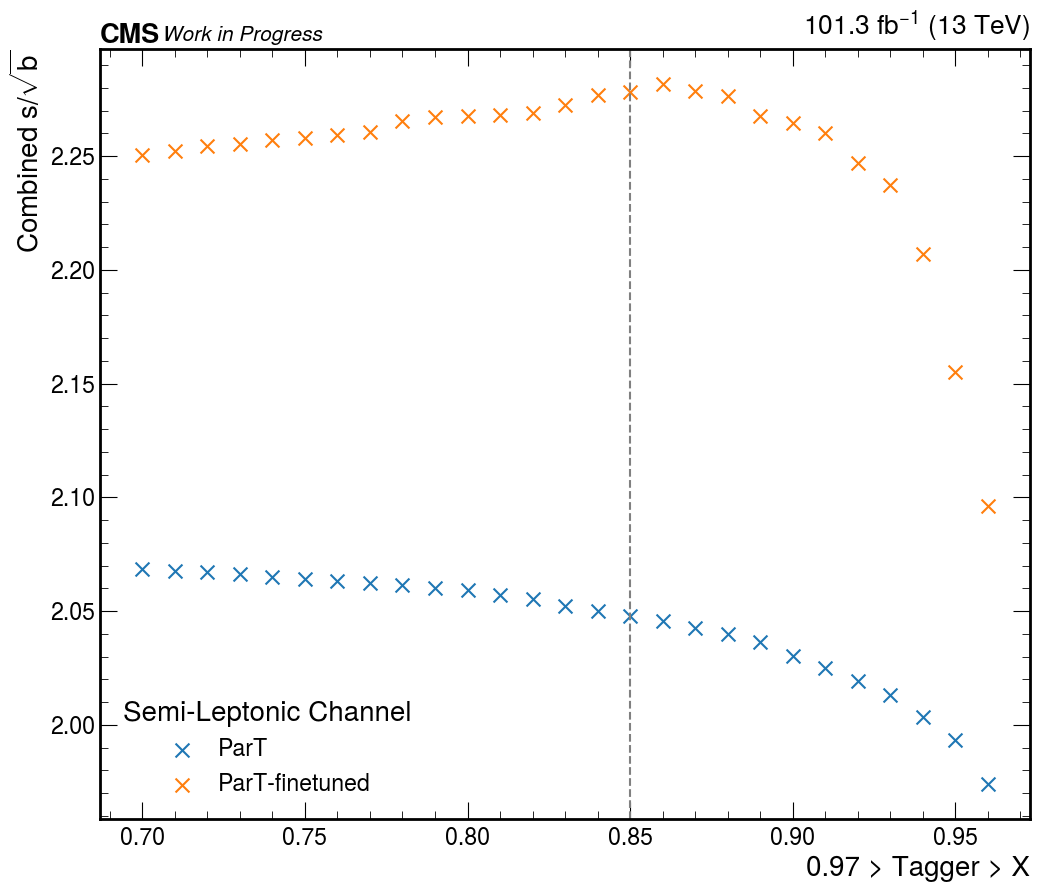

In [20]:
color_dict = {
    "fj_ParT_score": "tab:blue",
    "fj_ParT_score_finetuned": "tab:red",
    "fj_ParT_score_finetuned_HPO": "tab:green",
    "fj_ParT_score_finetuned_v2_nor2": "tab:orange",
}

lab_dict = {    
    "fj_ParT_score": "ParT",
    "fj_ParT_score_finetuned": "ParT-finetuned",
#     "fj_ParT_score_finetuned_HPO": "ParT-finetuned (HPO)",
    "fj_ParT_score_finetuned_HPO": "ParT-finetuned",    
#     "fj_ParT_score_finetuned_v2_nor2": "ParT-finetuned-singlelayer (HPO)",
    "fj_ParT_score_finetuned_v2_nor2": "ParT-finetuned-singlelayer",
    "fj_ParT_score_finetuned_v2_nor2": "ParT-finetuned",
}


plt.rcParams.update({"font.size": 20})


fig, ax = plt.subplots(figsize=(12, 10))
years = ["2018", "2017"]


soverb_high = 1.95

for tagger in [
        "fj_ParT_score",
#         "fj_ParT_score_finetuned",
#         "fj_ParT_score_finetuned_HPO",
    f"fj_ParT_score_finetuned_v2_nor2",
]:
    ax.scatter(tagger_cuts, ((soverb_high**2+np.array(s_over_b[tagger])**2)**0.5), marker="x", s=100, label=lab_dict[tagger], color=color_dict[tagger])
#         ax.scatter(tagger_cuts, s_over_b[year][tagger], marker="x", s=100, label=tagger)

ax.axvline(0.85, color="grey", linestyle="--")

# ax.set_ylim(0, 1.4)
ax.legend(title=f"Semi-Leptonic Channel")
ax.set_ylabel(r"Combined $s/\sqrt{b}$");
ax.set_xlabel(r"Tagger > X")
ax.set_xlabel(rf"{wp} > Tagger > X")
# ax.set_xticks(tagger_cuts)

lum_ = 0
for year in years:
    lum = 0
    for ch in channels:
        with open("../fileset/luminosity.json") as f:
            lum += json.load(f)[ch][year] / 1000.0

    lum_ += lum / len(channels)

hep.cms.lumitext("%.1f " % lum_ + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
plt.savefig(f"/Users/fmokhtar/Desktop/farakikopku/soverb_medium_signal_region.pdf")

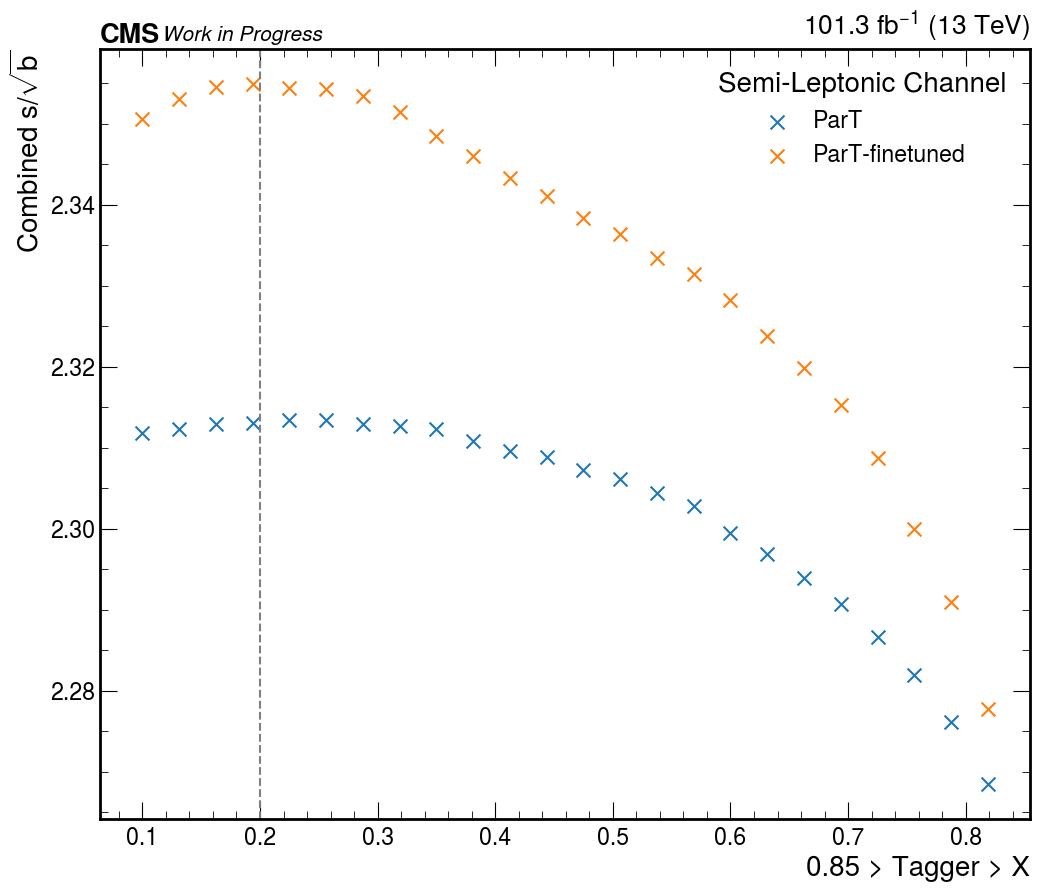

In [480]:
color_dict = {
    "fj_ParT_score": "tab:blue",
    "fj_ParT_score_finetuned": "tab:red",
    "fj_ParT_score_finetuned_HPO": "tab:green",
    "fj_ParT_score_finetuned_v2_nor2": "tab:orange",
}

lab_dict = {    
    "fj_ParT_score": "ParT",
    "fj_ParT_score_finetuned": "ParT-finetuned",
#     "fj_ParT_score_finetuned_HPO": "ParT-finetuned (HPO)",
    "fj_ParT_score_finetuned_HPO": "ParT-finetuned",    
#     "fj_ParT_score_finetuned_v2_nor2": "ParT-finetuned-singlelayer (HPO)",
    "fj_ParT_score_finetuned_v2_nor2": "ParT-finetuned-singlelayer",
    "fj_ParT_score_finetuned_v2_nor2": "ParT-finetuned",
}


plt.rcParams.update({"font.size": 20})


fig, ax = plt.subplots(figsize=(12, 10))
years = ["2018", "2017"]


soverb_high = 2.26

for tagger in [
        "fj_ParT_score",
#         "fj_ParT_score_finetuned",
#         "fj_ParT_score_finetuned_HPO",


#         f"fj_ParT_score_finetuned_v2_10_5",
#         f"fj_ParT_score_finetuned_v2_10_12",   ### best: --start-lr 6.75e-3 --num-epochs 2500 norelu

#         f"fj_ParT_score_finetuned_v2_r1",
#         f"fj_ParT_score_finetuned_v2_r2",
#         f"fj_ParT_score_finetuned_v2_rs1",
#         f"fj_ParT_score_finetuned_v2_rs2",

#         f"fj_ParT_score_finetuned_v2_nor1",
    f"fj_ParT_score_finetuned_v2_nor2",
#         f"fj_ParT_score_finetuned_v2_nor3",
#         f"fj_ParT_score_finetuned_v2_nor4",
#         f"fj_ParT_score_finetuned_v2_nor5", 

#         f"fj_ParT_score_finetuned_v2_nors1",
#         f"fj_ParT_score_finetuned_v2_nors2",
]:
    ax.scatter(tagger_cuts, ((soverb_high**2+np.array(s_over_b[tagger])**2)**0.5), marker="x", s=100, label=lab_dict[tagger], color=color_dict[tagger])
#         ax.scatter(tagger_cuts, s_over_b[year][tagger], marker="x", s=100, label=tagger)

ax.axvline(0.2, color="grey", linestyle="--")#, label=rf"125 GeV")

# ax.set_ylim(0, 1.4)
ax.legend(title=f"Semi-Leptonic Channel")
ax.set_ylabel(r"Combined $s/\sqrt{b}$");
ax.set_xlabel(r"Tagger > X")
ax.set_xlabel(rf"{wp} > Tagger > X")
# ax.set_xticks(tagger_cuts)
# ax.set_xticks([0.9, 0.92, 0.94, 0.96, 0.97, 0.98])


lum_ = 0
for year in years:
    lum = 0
    for ch in channels:
        with open("../fileset/luminosity.json") as f:
            lum += json.load(f)[ch][year] / 1000.0

    lum_ += lum / len(channels)

hep.cms.lumitext("%.1f " % lum_ + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
plt.savefig(f"/Users/fmokhtar/Desktop/farakikopku/soverb_low_signal_region.pdf")

In [170]:
events_dict["signal_region"][year][ch]["QCD"]["met_pt"]

1       642.511780
2         7.111576
4        41.294540
5       656.898438
6       183.150711
           ...    
2719     87.127525
2721    165.594070
2722    117.591286
2726    120.117790
2729     31.681070
Name: met_pt, Length: 12749, dtype: float32

In [1139]:
model = {}
model["Model 1"], model["Model 2"] = {}, {}

In [1022]:
# change epoch 5 and add epoch 19

model["Model 1"]["M"] = [1.01, 1.01, 0.99, 1.00, 1.00, 1.01, 1.00, 1.00, 1.00, 1.00, 1.00, 1.01, 1.01, 1.00, 1.00, 1.02, 1.01, 1.01, 1.01]
model["Model 1"]["IQR"] = [0.38, 0.34, 0.37, 0.36, 0.35, 0.35, 0.33, 0.35, 0.34, 0.35, 0.34, 0.33, 0.33, 0.32, 0.33, 0.36, 0.33, 0.33, 0.32] 
model["Model 1"]["fm"] = [0.13, 0.15, 0.14, 0.15, 0.15, 0.15, 0.16, 0.15, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.15, 0.15, 0.16, 0.16]
 
model["Model 2"]["M"] = [1.05, 1.04, 1.03, 1.03, 1.03, 1.03, 1.03, 1.03, 1.02, 1.03, 1.03, 1.03, 1.03, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02]
model["Model 2"]["IQR"] = [0.43, 0.40, 0.37, 0.36, 0.36, 0.34, 0.34, 0.34, 0.33, 0.34, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.32, 0.32, 0.32]
model["Model 2"]["fm"] = [0.13, 0.14, 0.14, 0.15, 0.15, 0.16, 0.17, 0.16, 0.17, 0.17, 0.17, 0.18, 0.17, 0.18, 0.18, 0.17, 0.17, 0.17, 0.17, 0.18]

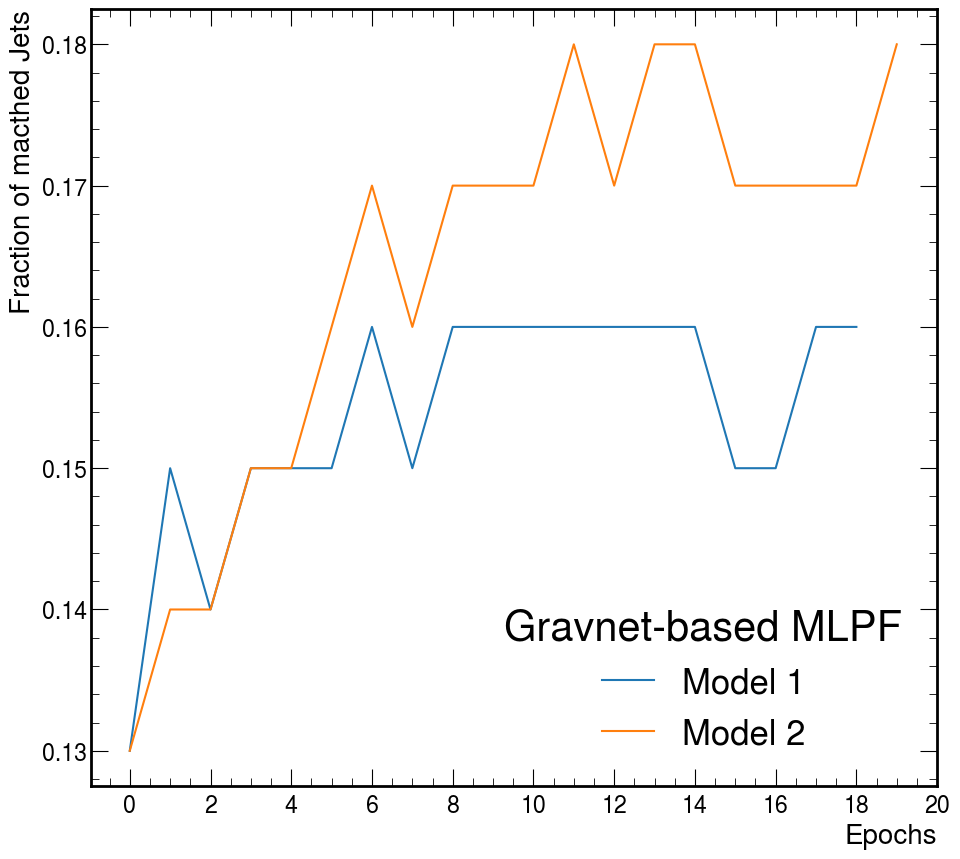

In [1023]:
fig, ax = plt.subplots(figsize=(10,9))

for m in ["Model 1", "Model 2"]:
    x = model[m]["fm"]
    ax.plot(x, label=m)

ax.set_xlabel("Epochs")
ax.set_ylabel(f"Fraction of macthed Jets")
ax.set_xticks([0,2,4,6,8,10,12,14,16,18, 20])
ax.legend(title="Gravnet-based MLPF", loc="best", title_fontsize=30, fontsize=25)
plt.tight_layout()
plt.savefig(f"/Users/fmokhtar/Desktop/mlpfz/Jet_fm.pdf")

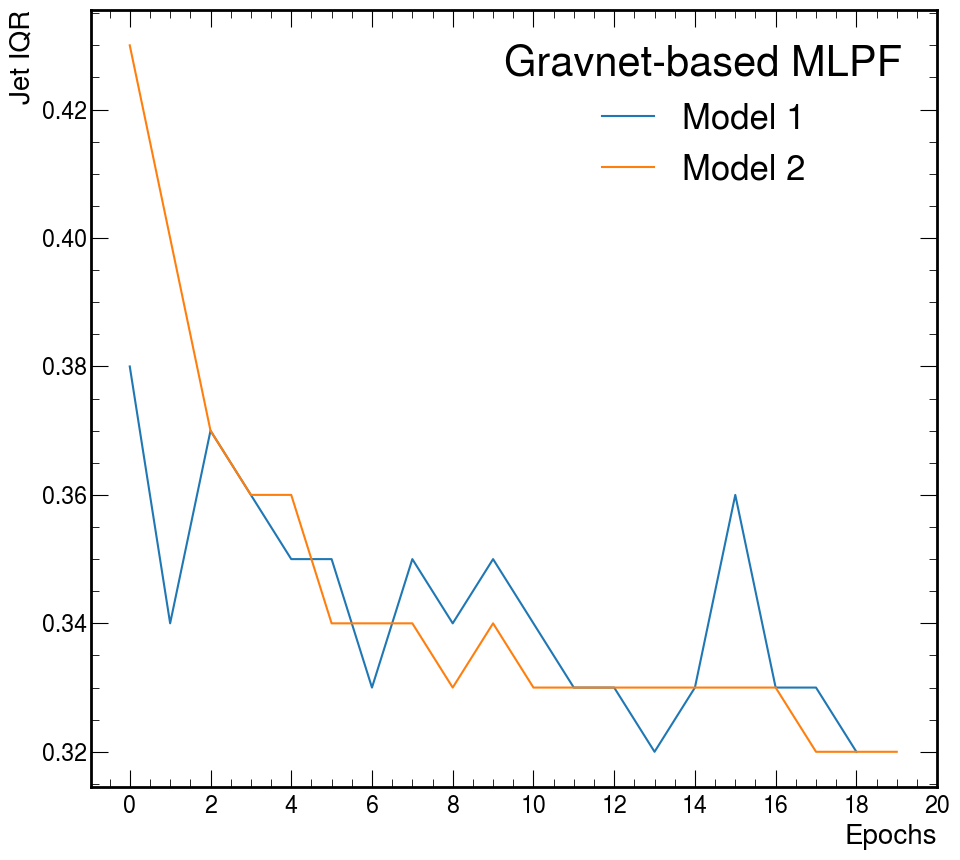

In [1024]:
fig, ax = plt.subplots(figsize=(10,9))


for m in ["Model 1", "Model 2"]:
    x = model[m]["IQR"]
    ax.plot(x, label=m)

ax.set_xlabel("Epochs")
ax.set_ylabel(f"Jet IQR")
ax.set_xticks([0,2,4,6,8,10,12,14,16,18, 20])
ax.legend(title="Gravnet-based MLPF", loc="best", title_fontsize=30, fontsize=25)
plt.tight_layout()
plt.savefig(f"/Users/fmokhtar/Desktop/mlpfz/Jet_IQR.pdf")

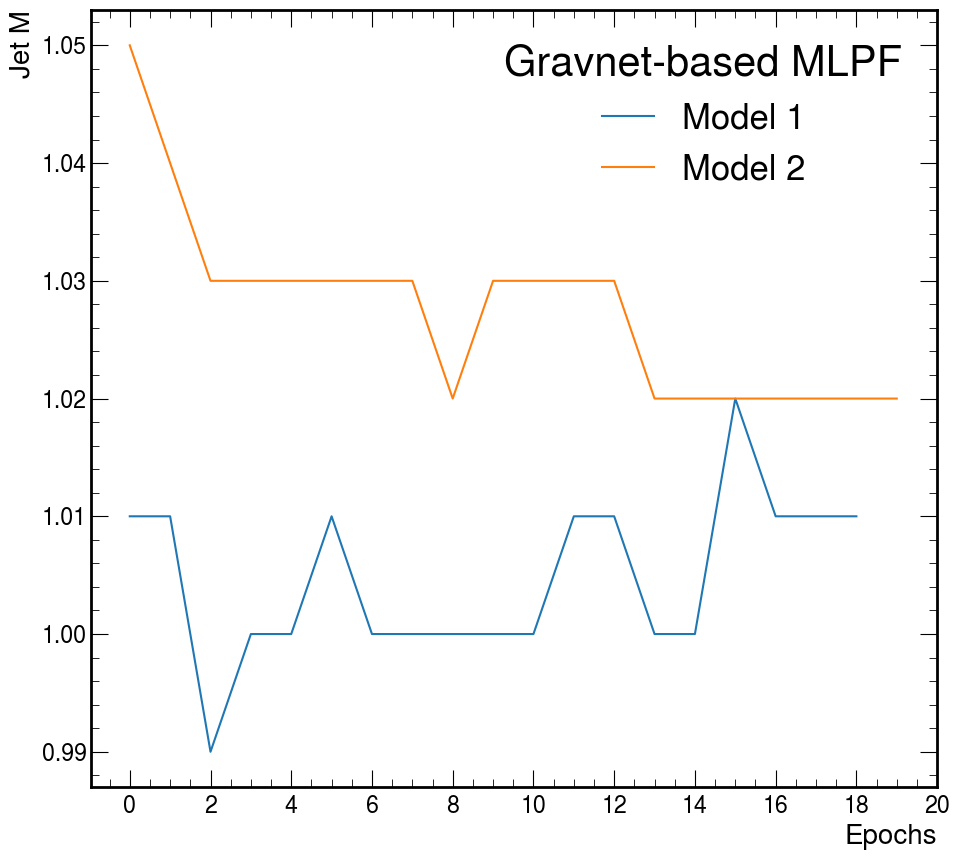

In [1025]:
fig, ax = plt.subplots(figsize=(10,9))


for m in ["Model 1", "Model 2"]:
    x = model[m]["M"]
    ax.plot(x, label=m)

ax.set_xlabel("Epochs")
ax.set_ylabel(f"Jet M")
ax.set_xticks([0,2,4,6,8,10,12,14,16,18, 20])
ax.legend(title="Gravnet-based MLPF", loc="best", title_fontsize=30, fontsize=25)
plt.tight_layout()
plt.savefig(f"/Users/fmokhtar/Desktop/mlpfz/Jet_M.pdf")

In [618]:
np.abs(events_dict["signal_region"][year][ch]["QCD"]["met_fj_dphi"])

58       0.528146
135      1.955553
140      0.412779
143      2.183701
269      0.310532
           ...   
32701    0.054920
32777    3.137909
32862    0.422301
32881    0.397864
32976    2.762763
Name: met_fj_dphi, Length: 17427, dtype: float32

In [891]:
! ls /Users/fmokhtar/Downloads/

mlpf_losses.pkl


In [997]:
import pickle as pkl
with open("/Users/fmokhtar/Downloads/mlpf_losses_1.pkl", "rb") as f:
    losses1 = pkl.load(f)
    
import pickle as pkl
with open("/Users/fmokhtar/Downloads/mlpf_losses_2.pkl", "rb") as f:
    losses2 = pkl.load(f)    

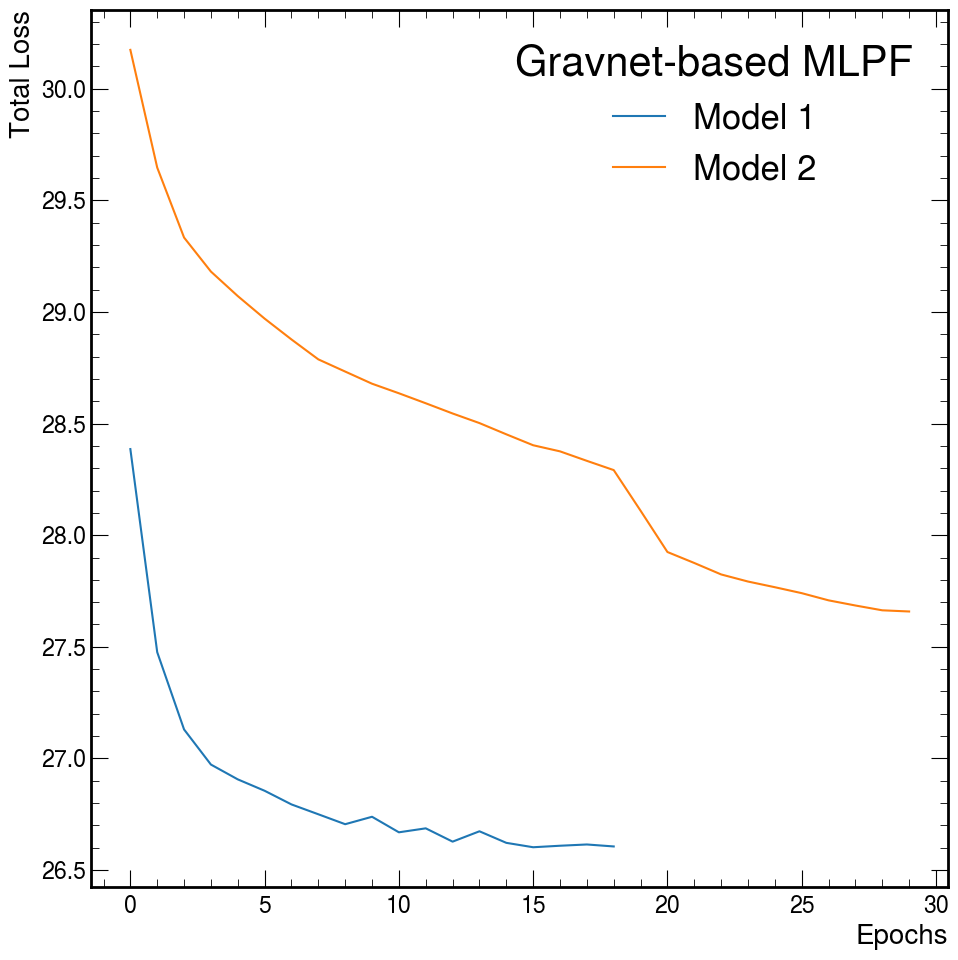

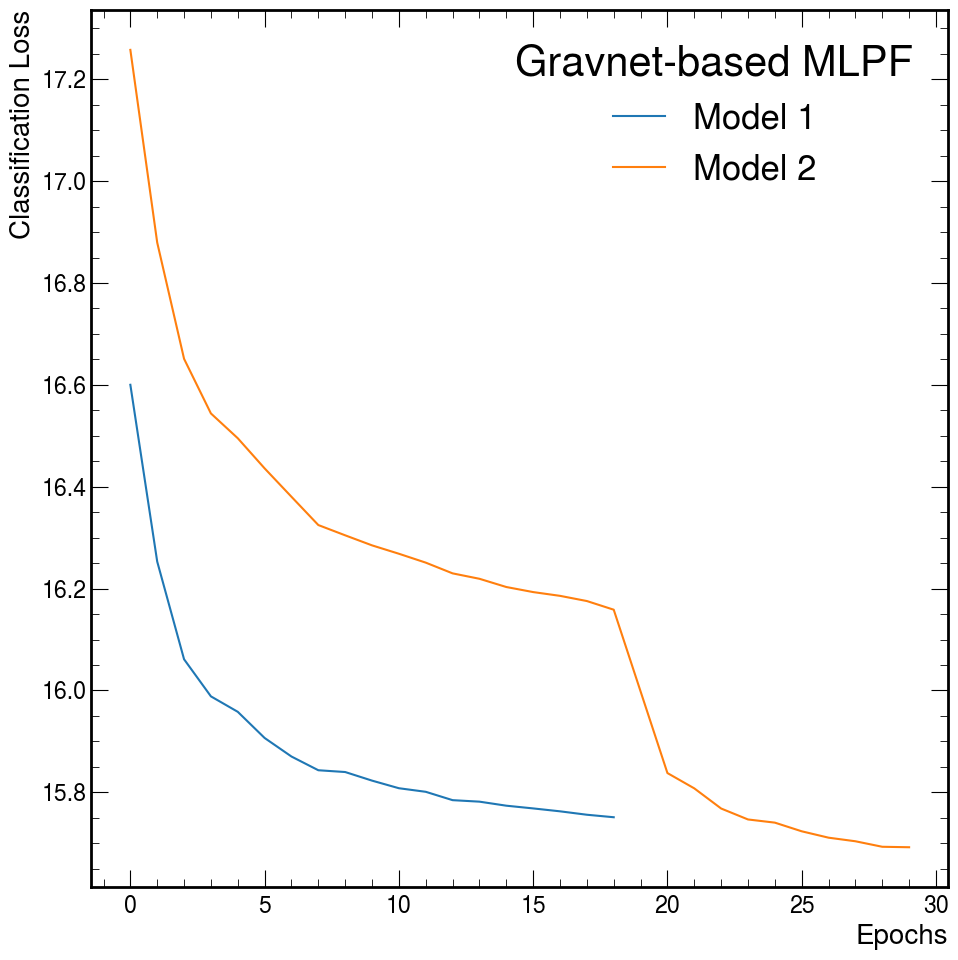

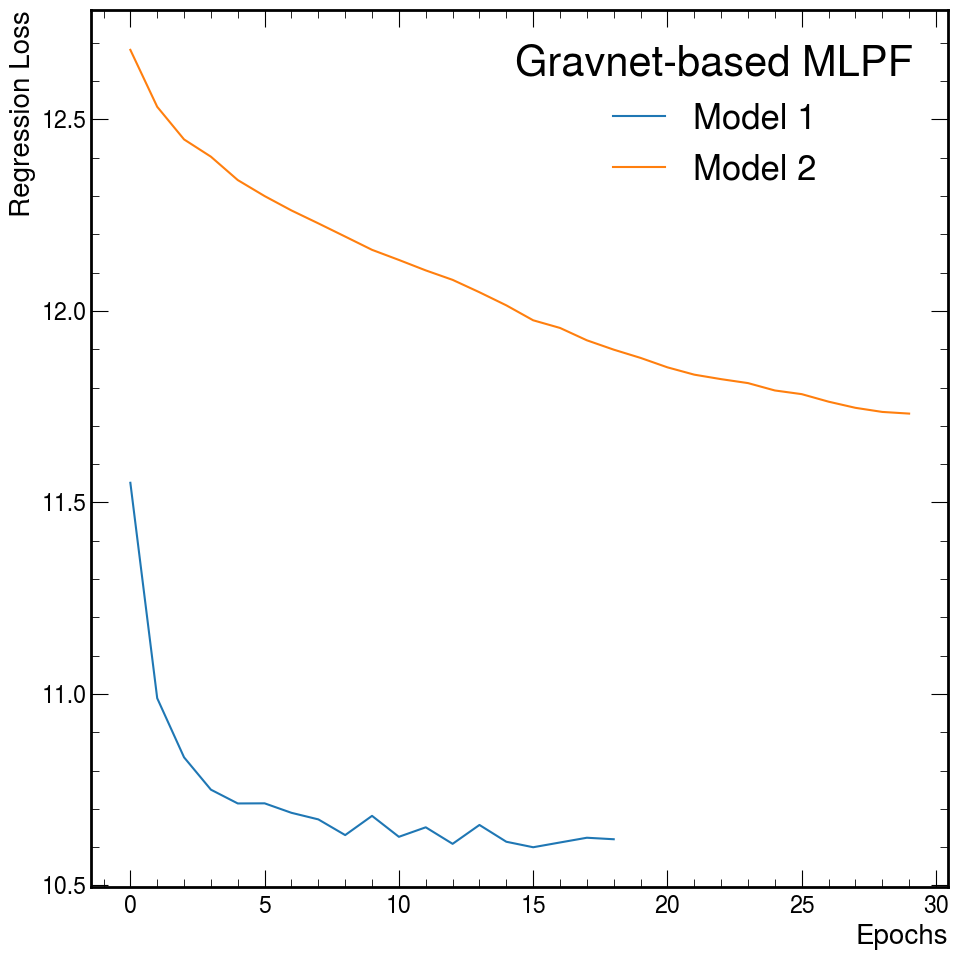

In [1003]:
for loss in ["Total", "Classification", "Regression"]:
    fig, ax = plt.subplots()

    ax.plot(losses1["valid"][loss], label="Model 1")
    ax.plot(losses2["valid"][loss], label="Model 2")
    
    ax.set_xlabel("Epochs")
    ax.set_ylabel(f"{loss} Loss")
#     ax.set_ylim(0.8 * losses["train"][loss][-1], 1.2 * losses["train"][loss][-1])
    ax.legend(title="Gravnet-based MLPF", loc="best", title_fontsize=30, fontsize=25)
    plt.tight_layout()
    plt.savefig(f"/Users/fmokhtar/Desktop/mlpfz/mlpf_loss_{loss}.pdf")

In [967]:
"checkpoint-01-28.385813.pth"[:13]

'checkpoint-01'

In [1008]:
for key in events_dict["signal_region"][year][ch]["QCD"]:
    print(key)

fj_msoftdrop
lep_pt
lep_isolation
lep_misolation
lep_fj_dr
lep_met_mt
met_fj_dphi
met_pt
deta
mjj
n_bjets_L
n_bjets_M
n_bjets_T
n_bjetsDeepCSV_L
n_bjetsDeepCSV_M
n_bjetsDeepCSV_T
fj_lsf3
fj_minus_lep_m
fj_pt
rec_higgs_m
fj_genjetmass
fj_genjetpt
weight_mu
weight_ele
fj_ParT_score
fj_ParT_mass
event_weight
fj_ParT_score_finetuned


In [765]:
def get_soverb(ev, tagger, presel, categories_sel, years, channels, MET_cut=False):

    mass_window = [80, 160]

    num_sig = {
        "ggF": 0, 
        "ttH": 0, 
        "VH": 0,
        "VBF": 0,
    }
    num_bkg = {
        "WJetsLNu": 0, 
        "TTbar": 0, 
        "QCD": 0,
        "DYJets": 0,
        "Others": 0,
    }

    deno_sig, deno_bkg = 0, 0
    s, b = 0, 0

    for year in years:
        for ch in channels:
            for sample in samples:
                if sample=="Data":
                    continue

                for k, v in presel.items():
                    if "QCD" in k:
                        df = ev["qcd_region"][year][ch][sample]
                    else:
                        df = ev["signal_region"][year][ch][sample]

                    df = df.query(v)  

                for category, category_sel in categories_sel.items():
                    df = df.query(category_sel)
                    
                if MET_cut:
                    if ch=="ele":
                        df = df[df["met_pt"]>70]
                    else:
                        df = df[df["met_pt"]>50]

                if sample == "QCD":
                    threshold = 20
                    df = df[df["event_weight"]<threshold]
                    
                ######################## composition start
                if sample in utils.signals:

                    deno_sig += df["event_weight"].sum()
                    num_sig[sample] += df["event_weight"].sum()
                else:
                    deno_bkg += df["event_weight"].sum()

                    if sample in dominant_backgrounds:
                        num_bkg[sample] += df["event_weight"].sum()
                    else:
                        num_bkg["Others"] += df["event_weight"].sum()     
                ######################## composition end

                ######################## soverb start
                df = df[(df["rec_higgs_m"]>=mass_window[0]) & (df["rec_higgs_m"]<=mass_window[1])]

                if sample in utils.signals:                
                    s += df["event_weight"].sum()
                else:
                    b += df["event_weight"].sum()
                ######################## soverb end

    num_sig = dict(sorted(num_sig.items(), key=lambda item: item[1]))
    num_bkg = dict(sorted(num_bkg.items(), key=lambda item: item[1]))

    if len(years) == 4:
        lab = "Run2"
    else:
        lab = "_".join(years)

    print("\033[1m" + f"{list(presel.keys())[0]} ({lab}):" + '\033[0m')
    if len(list(categories_sel.items()))!=0:
        print("Category:", category)

    print("------------------------")

    if "purity" in list(presel.keys())[0]:
        print("\033[1m" + rf"s/sqrt(b) in [{mass_window[0]},{mass_window[1]}]: {s/math.sqrt(b):.2f}" + '\033[0m')
        print("------------------------")

    print(f"Signal: {deno_sig:.2f}")
    for sample in num_sig:
        print(f"- {sample}: {100*(num_sig[sample]/deno_sig):.0f}%")

    print("------------------------")
    print(f"Background: {deno_bkg:.2f}")
    for sample in num_bkg:
        if sample=="":
            print("\033[1m" + f"- {sample}: {100*(num_bkg[sample]/deno_bkg):.0f}%")
        else:
            print(f"- {sample}: {100*(num_bkg[sample]/deno_bkg):.0f}%")             

# Stacked hists

In [892]:
vars_to_plot = [
#     "fj_minus_lep_m",
#     "fj_pt",
#     "lep_pt",
#     "fj_msoftdrop",
#     "lep_fj_dr",
#     "lep_met_mt",
#     "met_fj_dphi",
#     "deta",
#     "met",
#     "fj_lsf3",
#     "mjj",
#     "fj_pt_over_lep_pt",
    "rec_higgs_m",
#     "fj_ParT_mass",
]

samples_to_plot = [
    "ggF", 
    "VH",
    "VBF",
    "ttH",
    "QCD",
    "DYJets",
    "WJetsLNu",
    "WZQQ",
    "TTbar",
    "SingleTop",
    "Diboson",
    "Data",
]

# samples_to_plot = ["QCD"]

In [900]:
tagger = "fj_ParT_score"
tagger = "fj_ParT_score_finetuned"

presel = {
#     "Lep iso": f"fj_pt>0",

    "High purity signal region": f"({tagger}>0.97)",
#     "High purity signal region": f"({tagger}>0.97) & (fj_pt>300)",
#     "High purity signal region + nbjetsL=0": f"({tagger}>0.97) & (n_bjets_L==0)",
#     "High purity signal region + nbjetsM=0": f"({tagger}>0.97) & (n_bjets_M==0)",
#     "High purity signal region + nbjetsT=0": f"({tagger}>0.97) & (n_bjets_T==0)",    
#     "High purity signal region + mT>30": f"({tagger}>0.97) & (lep_met_mt>30)",    

#     "Medium purity signal region": f"({tagger}<0.97) & ({tagger}>0.85)",

#     "Medium purity signal region": f"({tagger}<0.97) & ({tagger}>0.85) & (fj_pt>300)",
#     "Medium purity signal region + nbjetsL=0": f"({tagger}<0.97) & ({tagger}>0.85) & (n_bjets_L==0)",
#     "Medium purity signal region + nbjetsM=0": f"({tagger}<0.97) & ({tagger}>0.85) & (n_bjets_M==0)",
#     "Medium purity signal region + nbjetsT=0": f"({tagger}<0.97) & ({tagger}>0.85) & (n_bjets_T==0)",
#     "Medium purity signal region + mT>30": f"({tagger}<0.97) & ({tagger}>0.85) & (lep_met_mt>30)",

#     "WJets control region": f"({tagger}<0.85) & ({tagger}>0.20)",
#     "WJets control region": f"({tagger}<0.85) & ({tagger}>0.20) & (fj_pt>250)",
#     "WJets control region + nbjetsL=0": f"({tagger}<0.85) & ({tagger}>0.20) & (n_bjets_L==0)",   
#     "WJets control region + nbjetsM=0": f"({tagger}<0.85) & ({tagger}>0.20) & (n_bjets_M==0)",   
#     "WJets control region + nbjetsT=0": f"({tagger}<0.85) & ({tagger}>0.20) & (n_bjets_T==0)",   
    
#     "WJets control region + mT>40": f"({tagger}<0.85) & ({tagger}>0.20) & (lep_met_mt>40)",       
#     "WJets control region + mT>30 + nbjetsL=0": f"({tagger}<0.85) & ({tagger}>0.20) & (lep_met_mt>30) & (n_bjets_L==0)",   
#     "WJets control region + mT>30 + nbjetsM=0": f"({tagger}<0.85) & ({tagger}>0.20) & (lep_met_mt>30) & (n_bjets_M==0)",   
#     "WJets control region + mT>30 + nbjetsT=0": f"({tagger}<0.85) & ({tagger}>0.20) & (lep_met_mt>30) & (n_bjets_T==0)",   
    
#     "WJets control region + mT>10": f"({tagger}<0.85) & ({tagger}>0.20) & (lep_met_mt>10)",   
#     "WJets control region + mT>20": f"({tagger}<0.85) & ({tagger}>0.20) & (lep_met_mt>20)",   
#     "WJets control region + mT>30": f"({tagger}<0.85) & ({tagger}>0.20) & (lep_met_mt>30)",
#     "WJets control region + mT>40": f"({tagger}<0.85) & ({tagger}>0.20) & (lep_met_mt>40)",   
#     "WJets control region + mT>50": f"({tagger}<0.85) & ({tagger}>0.20) & (lep_met_mt>50)",       

#     "tagger only": f"({tagger}<0.85) & ({tagger}>0.20)",   
#     "bjet only": f"n_bjets_L==0",   
    
#     "Top control region": f"({tagger}<0.20) & (n_bjets_T>0)",  

#     "QCD control region": f"({tagger}<0.20) & (n_bjets_T==0)",      
#     "QCD control region + dR>0.1": f"({tagger}<0.20) & (n_bjets_T==0) & (lep_fj_dr>0.1)",  
#     "QCD control region": f"({tagger}<0.20) & (lep_fj_dr>0.15)",  

#     "Tagger > 0.2": f"({tagger}>0.20)",

#     "WJets control region": f"({tagger}<0.80) & ({tagger}>0.20) & (n_bjets_L==0)"#" & (lep_fj_dr>0.3)",

}

categories_sel = {
#     "VBF_pt200toinf": "( (mjj>1000) & (deta>3.5) )",
#     "ggF_pt200to300": "( (mjj<1000) | (deta<3.5) ) & (fj_pt<300)",
#     "ggF_pt300toinf": "( (mjj<1000) | (deta<3.5) ) & (fj_pt>300)",
}


channels = ["ele", "mu"]
years = ["2018", "2017", "2016", "2016APV"]

num, den = 0, 0
# fill histograms
hists = {}

for var in vars_to_plot:
            
    if var == "rec_higgs_m":
        hists[var] = hist2.Hist(
            hist2.axis.StrCategory([], name="samples", growth=True),
    #         utils.axis_dict[var],
            hist2.axis.Variable(list(range(50, 240, 20)), name="var", label=r"Higgs reconstructed mass [GeV]", overflow=True)
        )
    else:
        hists[var] = hist2.Hist(
            hist2.axis.StrCategory([], name="samples", growth=True),
            utils.axis_dict[var],
#             hist2.axis.Regular(10, 0, 1, name="var", label=r"MET", overflow=True)
            
        )        
        
    for sample in samples_to_plot:
        for year in years:
            for ch in channels:
            
                for region, sel in presel.items():

                    if "High" in region:
                        use = events_dict   # doesnt include qcd pt 170-300
                    else:
                        use = events_dict2   # includes qcd pt 170-300

                    if "QCD" in region:
                        df = use["qcd_region"][year][ch][sample]
                    else:
                        df = use["signal_region"][year][ch][sample]

                    df = df.query(sel)
                    
                    if "High" not in region:
                        if ch=="ele":
                            df = df[df["met_pt"]>70]
                        else:
                            df = df[df["met_pt"]>50]

#                     df = df[df["n_bjets_L"]==0]
#                     df = df[df["lep_fj_dr"]>0.2]

#                     df = df[df["lep_met_mt"]>40]
#                     df = df[df["lep_met_mt"]<50]
#                     df = df[df["fj_ParT_mass"]<50]
#                     df = df[df["fj_pt"]>250]

                for category, category_sel in categories_sel.items():
                    df = df.query(category_sel)

#                 if sample == "QCD":
#                     threshold = 100

#                     den_ = len(df['event_weight'])
#                     df = df[df["event_weight"]<threshold]
#                     num_ = (den_ - len(df['event_weight']))

#                     den += den_
#                     num += num_
                
                if var=="met":
                    x = df["met_pt"]
                elif var=="fj_pt_over_lep_pt":
                    x = df["fj_pt"]/df["lep_pt"] 
                elif var=="met_fj_dphi":
                    x = np.abs(df["met_fj_dphi"])
                else:
                    x = df[var]
                
                hists[var].fill(
                    samples=sample,
                    var=x,
                    weight=df["event_weight"],
                )     
try:
    print(f"Removing {num} out of {den} qcd events by applying qcd event_weight<{threshold} ({(100*num/den):.2f}%)")
except:
    z=1

Will plot rec_higgs_m histogram

High purity signal region (Run2):
------------------------
s/sqrt(b) in [80,160]: 2.16
------------------------
Signal: 175.72
- ttH: 7%
- VH: 17%
- VBF: 21%
- ggF: 56%
------------------------
Background: 5866.95
- QCD: 4%
- Others: 6%
- DYJets: 12%
- TTbar: 26%
- WJetsLNu: 52%


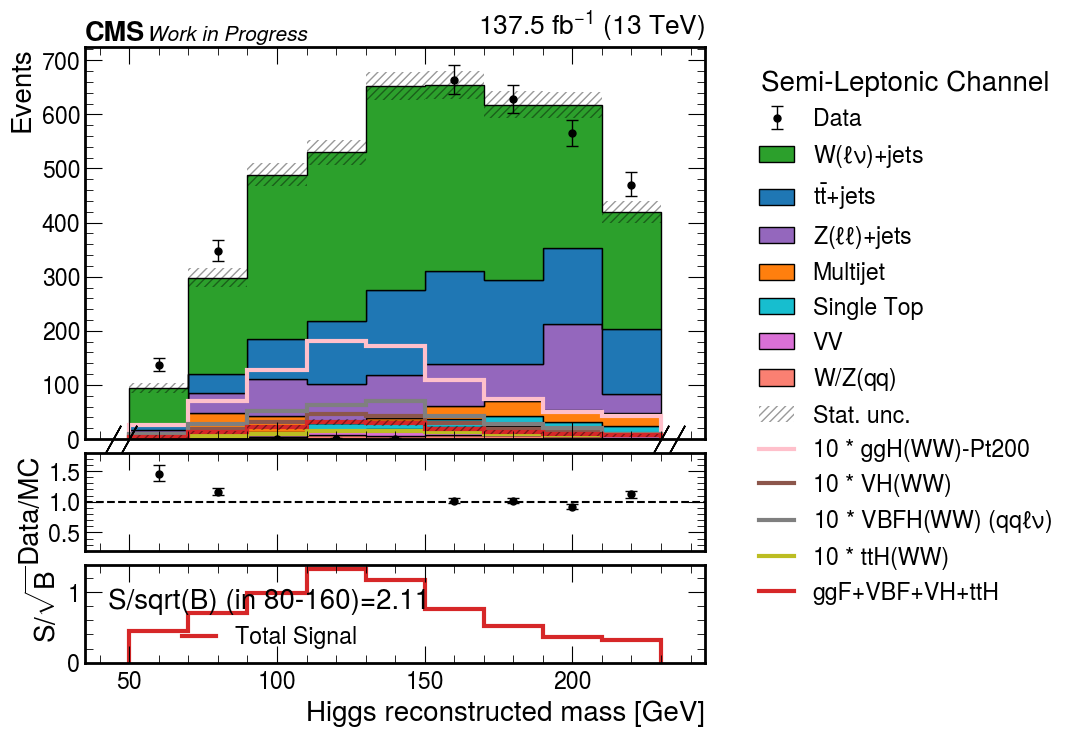

In [902]:
plt.rcParams.update({"font.size": 20})
add_data = True
MET_cut = True

if "purity" in list(presel.keys())[0]:
    add_soverb=True
    blind_region=[90,150]
    if "High" in list(presel.keys())[0]:
        mult=10
        MET_cut=False
    else:
        mult=100
else:
    add_soverb=False
    blind_region=None
    mult=1
    
from utils import plot_hists
plot_hists(years, channels, hists, vars_to_plot,             
            add_data=add_data,
            logy=False,
            add_soverb=add_soverb,
            only_sig=False,
            mult=mult,
            outpath="/Users/fmokhtar/Desktop/farakikopku5/",
#             text_=list(presel.keys())[0],
#             text_=list(presel.keys())[0] + "+ jetpt>300",           
#             text_=list(presel.keys())[0] + f"\n category: {list(categories_sel.keys())[0]}",
#             text_=list(presel.keys())[0] + f"\n category: {list(categories_sel.keys())[0]} \n Applying qcd event_weight<{threshold}",
#             text_=list(presel.keys())[0] + f"\n Applying qcd event_weight<{threshold}",

            blind_region=blind_region,
           save_as=f"qcd_qcd"
          )
print()
get_soverb(use, tagger, presel, categories_sel, years, channels, MET_cut=MET_cut)

In [869]:
tagger = "fj_ParT_score"
tagger = "fj_ParT_score_finetuned"

presel = {    
#     "High purity signal region": f"({tagger}>0.97)",
#     "High purity signal region + nbjetsL=0": f"({tagger}>0.97) & (n_bjets_L==0)",
#     "High purity signal region + nbjetsM=0": f"({tagger}>0.97) & (n_bjets_M==0)",
#     "High purity signal region + nbjetsT=0": f"({tagger}>0.97) & (n_bjets_T==0)",    
    
    "Medium purity signal region": f"({tagger}<0.97) & ({tagger}>0.85)",
#     "Medium purity signal region + nbjetsL=0": f"({tagger}<0.97) & ({tagger}>0.85) & (n_bjets_L==0)",
#     "Medium purity signal region + nbjetsM=0": f"({tagger}<0.97) & ({tagger}>0.85) & (n_bjets_M==0)",
#     "Medium purity signal region + nbjetsT=0": f"({tagger}<0.97) & ({tagger}>0.85) & (n_bjets_T==0)",
    
    
    "WJets control region": f"({tagger}<0.85) & ({tagger}>0.20)",       
#     "WJets control region + mT>30": f"({tagger}<0.85) & ({tagger}>0.20) & (lep_met_mt>30)",   

#     "WJets control region + nbjetsL=0": f"({tagger}<0.85) & ({tagger}>0.20) & (n_bjets_L==0)",   
#     "WJets control region + nbjetsM=0": f"({tagger}<0.85) & ({tagger}>0.20) & (n_bjets_M==0)",   
#     "WJets control region + nbjetsT=0": f"({tagger}<0.85) & ({tagger}>0.20) & (n_bjets_T==0)",       
#     "WJets control region + mT>10": f"({tagger}<0.85) & ({tagger}>0.20) & (lep_met_mt>10)",   
#     "WJets control region + mT>20": f"({tagger}<0.85) & ({tagger}>0.20) & (lep_met_mt>20)",   
#     "WJets control region + mT>30": f"({tagger}<0.85) & ({tagger}>0.20) & (lep_met_mt>30)",   
    "WJets control region + mT>40": f"({tagger}<0.85) & ({tagger}>0.20) & (lep_met_mt>40)",   
#     "WJets control region + mT>50": f"({tagger}<0.85) & ({tagger}>0.20) & (lep_met_mt>50)",       
    
    
}

channels = ["ele", "mu"]
years = ["2018", "2017", "2016", "2016APV"]

# fill histograms
var = "rec_higgs_m"
sample = "WJetsLNu"
h = hist2.Hist(
    hist2.axis.StrCategory([], name="region", growth=True),
    hist2.axis.Variable(list(range(50, 240, 10)), name="var", label=r"Higgs reconstructed mass [GeV]", overflow=True)
)

for region, sel in presel.items():
                
    for year in years:
        for ch in channels:

            if "QCD" in region:
                df = events_dict["qcd_region"][year][ch][sample]
            else:
                df = events_dict["signal_region"][year][ch][sample]

            df = df.query(sel)    

            if "High" not in region:
                if ch=="ele":
                    df = df[df["met_pt"]>70]
                else:
                    df = df[df["met_pt"]>50]    

#             else:
#                 threshold = 4
#                 df = df[df["event_weight"]<threshold]
                    
            h.fill(
                region=region,
                var=df[var],
                weight=df["event_weight"],
            )     


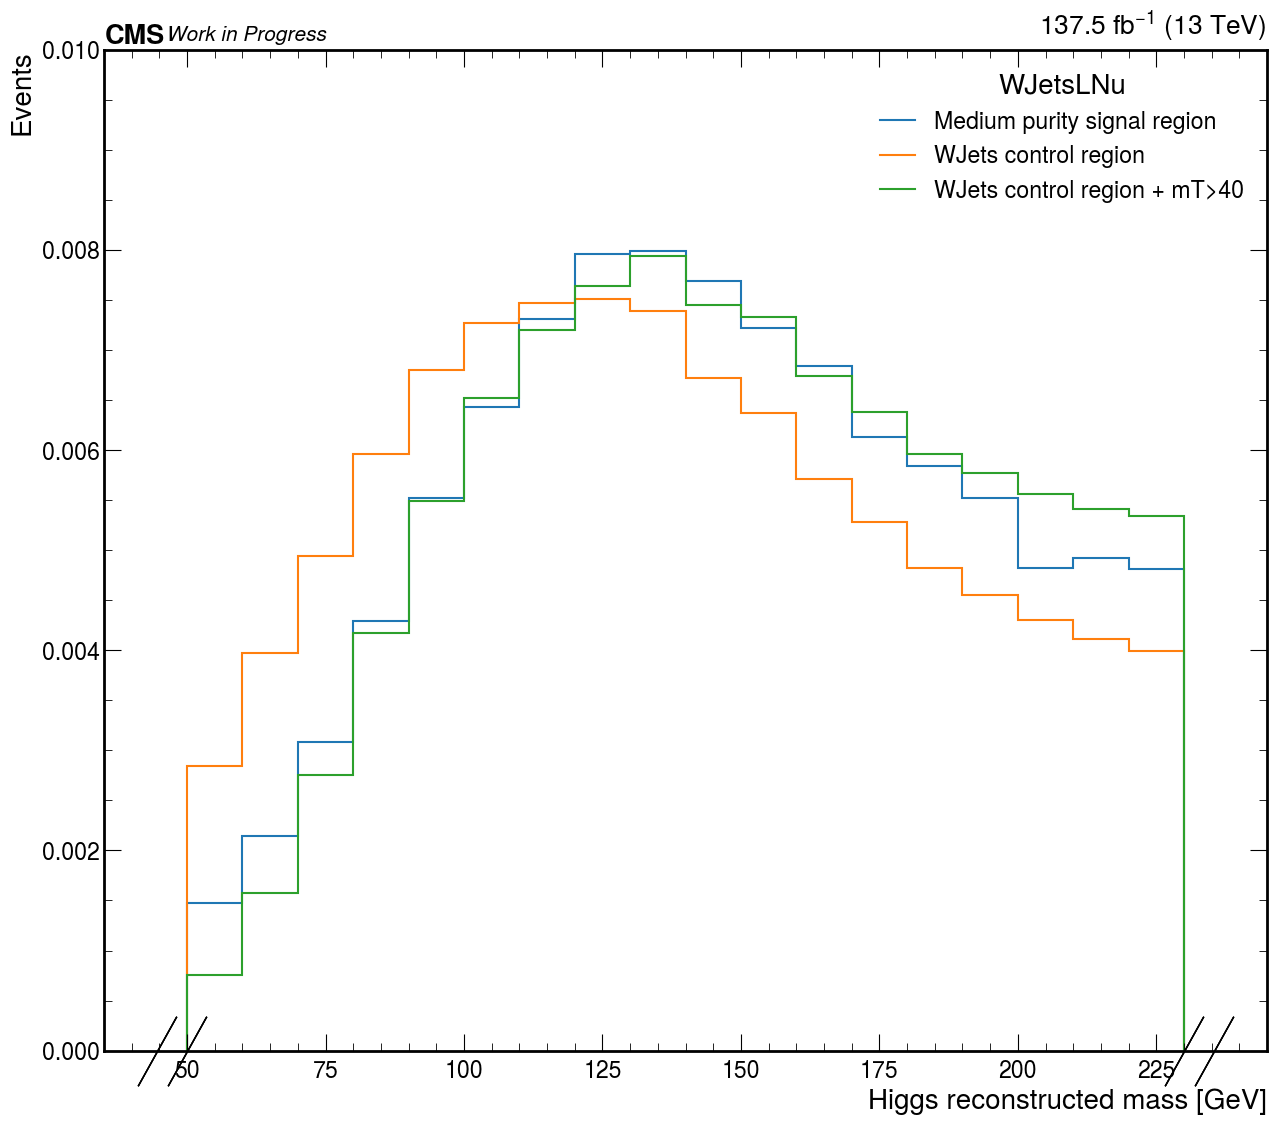

In [870]:
fig, ax = plt.subplots(figsize=(15, 13))
for region in presel:
    hep.histplot(h[{"region": region}].project("var"),
        label=region,
        density=True,
#         yerr=False,
    )
ax.legend(title=sample, loc="upper right")
ax.set_ylabel("Events")
ax.set_ylim(0, 0.01)
# ax.set_yscale("log")

lum_=0
for year in years:
    lum = 0
    for ch in channels:
        with open("../fileset/luminosity.json") as f:
            lum += json.load(f)[ch][year] / 1000.0

    lum_ += lum / len(channels)

hep.cms.lumitext("%.1f " % lum_ + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
plt.savefig(f"/Users/fmokhtar/Desktop/farakikopku5/z.pdf")     

# High qcd weights

In [584]:
samples_to_plot = list(events_dictqcd["signal_region"]["2017"]["ele"].keys())
samples_to_plot

['QCD_Pt_3200toInf',
 'QCD_Pt_1800to2400',
 'QCD_Pt_2400to3200',
 'QCD_Pt_1000to1400',
 'QCD_Pt_600to800',
 'QCD_Pt_300to470',
 'QCD_Pt_170to300',
 'QCD_Pt_800to1000',
 'QCD_Pt_470to600',
 'QCD_Pt_1400to1800']

In [585]:
tagger = "fj_ParT_score_finetuned"
presel = {
#     "High purity signal region": f"({tagger}>0.97)",
    "Medium purity signal region": f"({tagger}<0.97) & ({tagger}>0.85)",
#     "WJets control region": f"({tagger}<0.85) & ({tagger}>0.20) & (n_bjets_L==0)",   
}

channels = ["ele", "mu"]
years = ["2018", "2017", "2016", "2016APV"]

# fill histograms
hists = {}

# var = "rec_higgs_m"
# var = "fj_pt"
var = "event_weight"
if var=="rec_higgs_m":
    h = hist2.Hist(
        hist2.axis.StrCategory([], name="samples", growth=True),
        hist2.axis.Variable(list(range(50, 240, 20)), name="var", label=r"Higgs reconstructed mass [GeV]", overflow=True)
    )  
elif var == "fj_pt":
    h = hist2.Hist(
        hist2.axis.StrCategory([], name="samples", growth=True),
        hist2.axis.Variable(list(range(200, 800, 20)), name="var", label=r"Jet $p_T$ [GeV]", overflow=True)
    )      
else:
    h = hist2.Hist(
        hist2.axis.StrCategory([], name="samples", growth=True),
        hist2.axis.Variable(list(range(0, 500, 20)), name="var", label=r"Event weight", overflow=True)
    )      

for sample in samples_to_plot:
    for year in years:
        for ch in channels:

            for k, v in presel.items():

                df = events_dictqcd["signal_region"][year][ch][sample]
                df = df.query(v)

            x = df[var]
            if len(x)==0:
                x = 0   
                
            if var=="event_weight":
                h.fill(
                    samples=sample, var=x,
                )

            else:
                h.fill(
                    samples=sample, var=x, weight=df["event_weight"],
                )

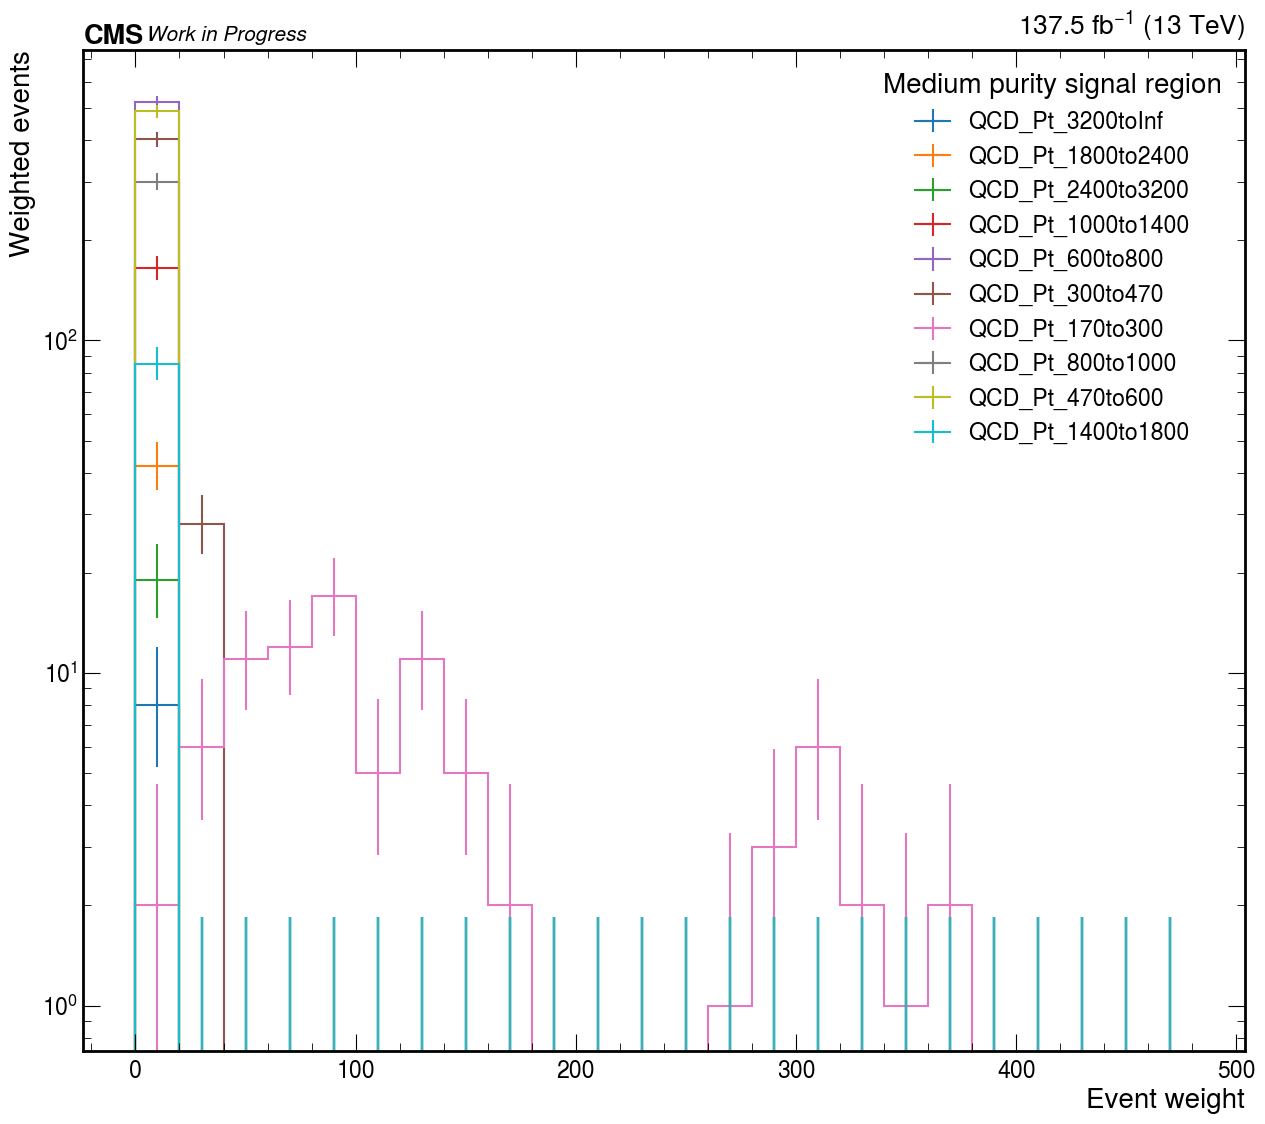

In [588]:
fig, ax = plt.subplots(figsize=(15, 13))
for sample in samples_to_plot:
    hep.histplot(h[{"samples": sample}].project("var"),
        label=sample,
#         density=True,
#         yerr=False,
    )
ax.legend(title=list(presel.keys())[0], loc="upper right")
ax.set_ylabel("Weighted events")
# ax.set_ylim(0.01, 10e4)
# ax.set_ylim(0, 2500)
ax.set_yscale("log")

lum_=0
for year in years:
    lum = 0
    for ch in channels:
        with open("../fileset/luminosity.json") as f:
            lum += json.load(f)[ch][year] / 1000.0

    lum_ += lum / len(channels)

hep.cms.lumitext("%.1f " % lum_ + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
plt.savefig(f"/Users/fmokhtar/Desktop/farakikopku5/qcd_high_weights_wjets_jetpt.pdf")     

# soverb

In [149]:
dominant_backgrounds = ["WJetsLNu", "TTbar", "QCD", "DYJets"]

In [150]:
samples

['ggF',
 'VH',
 'VBF',
 'ttH',
 'QCD',
 'DYJets',
 'WJetsLNu',
 'WZQQ',
 'TTbar',
 'SingleTop',
 'Diboson',
 'Data']

In [333]:
# tagger = "ParT_finetuned"
tagger = "fj_ParT_score_finetuned"

presel = {
#     "High purity signal region": f"({tagger}>0.97)",
#     "Medium purity signal region": f"({tagger}<0.97) & ({tagger}>0.85)",
    
#     "WJets control region": f"({tagger}<0.85) & ({tagger}>0.20) & (n_bjets_L==0)", 
    "WJets control region": f"({tagger}<0.85) & ({tagger}>0.20)", 

#     "WJets control region + dR>0.2": f"({tagger}<0.85) & ({tagger}>0.20) & (n_bjets_L==0) & (lep_fj_dr>0.2)",    

#     "Top control region": f"({tagger}<0.2) & (n_bjets_T>0)",  
#     "Top control region + dR>0.1": f"({tagger}<0.20) & (n_bjets_T>0) & (lep_fj_dr>0.1)",      

#     "QCD control region": f"({tagger}<0.20) & (n_bjets_T==0)",  
#     "Lep iso": f"fj_pt>0",
}

categories_sel = {
#     "VBF_pt200toinf": "( (mjj>1000) & (deta>3.5) )",
#     "ggF_pt200to300": "( (mjj<1000) | (deta<3.5) ) & (fj_pt<300)",    
#     "ggF_pt300toinf": "( (mjj<1000) | (deta<3.5) ) & (fj_pt>300)",
    
}

mass_window = [80, 160]

years = ["2018", "2017", "2016APV", "2016"]
channels = ["ele", "mu"]

num_sig = {
    "ggF": 0, 
    "ttH": 0, 
    "VH": 0,
    "VBF": 0,
}
num_bkg = {
    "WJetsLNu": 0, 
    "TTbar": 0, 
    "QCD": 0,
    "DYJets": 0,
    "Others": 0,
}

deno_sig, deno_bkg = 0, 0
s, b = 0, 0

for year in years:
    for ch in channels:
        for sample in samples:
            if sample=="Data":
                continue

            for k, v in presel.items():
                if "QCD" in k:
                    df = events_dict["qcd_region"][year][ch][sample]
                else:
                    df = events_dict["signal_region"][year][ch][sample]

                df = df.query(v)  
                
#                 if "High" in k:
#                     if sample == "QCD":
#                         df = df[df["event_weight"]<140]
#                 if "Medium" in k:
#                     if sample == "QCD":
#                         df = df[df["event_weight"]<200]
            
#             for category, category_sel in categories_sel.items():
#                 df = df.query(category_sel)            
            
#             if sample == "QCD":
#                 df = df[df["event_weight"]<50]
                
#             if ch=="ele":
#                 df = df[df["met_pt"]>70]
#             else:
#                 df = df[df["met_pt"]>50]
                
#             df = df[df["n_bjets_L"]==0]
#             df = df[df["lep_fj_dr"]>0.2]
            df = df[df["lep_met_mt"]>40]
    
#             df = df[(df["fj_pt"]/df["lep_pt"])<3]

#             df = df[np.abs(df["met_fj_dphi"])<2.5]

#             df = df[df["fj_ParT_mass"]<50]

#             df = df[df["fj_pt"]>250]
            ######################## composition start
            if sample in utils.signals:
                
                deno_sig += df["event_weight"].sum()
                num_sig[sample] += df["event_weight"].sum()
            else:
                deno_bkg += df["event_weight"].sum()
                
                if sample in dominant_backgrounds:
                    num_bkg[sample] += df["event_weight"].sum()
                else:
                    num_bkg["Others"] += df["event_weight"].sum()     
            ######################## composition end
            
            ######################## soverb start
            df = df[(df["rec_higgs_m"]>=mass_window[0]) & (df["rec_higgs_m"]<=mass_window[1])]
    
            if sample in utils.signals:                
                s += df["event_weight"].sum()
            else:
                b += df["event_weight"].sum()
            ######################## soverb end

In [334]:
num_sig = dict(sorted(num_sig.items(), key=lambda item: item[1]))
num_bkg = dict(sorted(num_bkg.items(), key=lambda item: item[1]))

if len(years) == 4:
    lab = "Run2"
else:
    lab = "_".join(years)

print("\033[1m" + f"{list(presel.keys())[0]} ({lab}):" + '\033[0m')
# print("Category:", category)

print("------------------------")

if "purity" in list(presel.keys())[0]:
    print("\033[1m" + rf"s/sqrt(b) in [{mass_window[0]},{mass_window[1]}]: {s/math.sqrt(b):.2f}" + '\033[0m')
    print("------------------------")

print(f"Signal: {deno_sig:.2f}")
for sample in num_sig:
    print(f"- {sample}: {100*(num_sig[sample]/deno_sig):.0f}%")
    
print("------------------------")
print(f"Background: {deno_bkg:.2f}")
for sample in num_bkg:
    if sample=="":
        print("\033[1m" + f"- {sample}: {100*(num_bkg[sample]/deno_bkg):.0f}%")
    else:
        print(f"- {sample}: {100*(num_bkg[sample]/deno_bkg):.0f}%") 

WJets control region (Run2):
------------------------
Signal: 475.17
- ttH: 16%
- VH: 17%
- VBF: 20%
- ggF: 47%
------------------------
Background: 497404.16
- Others: 2%
- QCD: 5%
- DYJets: 15%
- TTbar: 18%
- WJetsLNu: 59%


In [587]:
(0.74**2 + 0.81**2 + 0.59**2)**0.5   # VBF / ggF200-300 / ggF300-450 / ggF450-inf

1.2457126474432216

# WJetsLNu region

In [455]:
tagger = "fj_ParT_score_finetuned_v2_nor2"

# mass_window = [50, 200]

years = ["2018", "2017"]
# years = ["2017"]
channels = ["ele", "mu"]

num_sig = {
    "ggF": 0, 
    "ttH": 0, 
    "VH": 0,
    "VBF": 0,
}
num_bkg = {
    "WJetsLNu": 0, 
    "TTbar": 0, 
    "QCD": 0,
    "Others": 0,
}
deno_sig, deno_bkg = 0, 0

# tagger_cuts = [0.01, 0.02, 0.03, 0.04, 0.07, 0.09, 0.1, 0.2, 0.8]
# tagger_cuts = np.linspace(0.01, 0.8, 21)
tagger_cuts = np.linspace(0.01, 0.3, 21)
ttt = []
for tagger_cut in tagger_cuts:
    for year in years:
        for ch in channels:
            for sample in samples:
                if sample=="Data":
                    continue

                df = events_dict[year][ch][sample]

    #             df = df[(df["rec_higgs_m"]>mass_window[0]) & (df["rec_higgs_m"]<mass_window[1])]

                df = df[df["event_weight"]<140]
                df = df[df[tagger]<0.85]
                df = df[df[tagger]>tagger_cut]
                df = df[df["n_bjets_L"]==0]                


                if sample in utils.signals:
                    deno_sig += df["event_weight"].sum()
                    num_sig[sample] += df["event_weight"].sum()
                else:
                    deno_bkg += df["event_weight"].sum()
                    if sample in dominant_backgrounds:
                        num_bkg[sample] += df["event_weight"].sum()
                    else:
                        num_bkg["Others"] += df["event_weight"].sum()
                        
    ttt.append(100*(num_bkg["WJetsLNu"]/deno_bkg))  

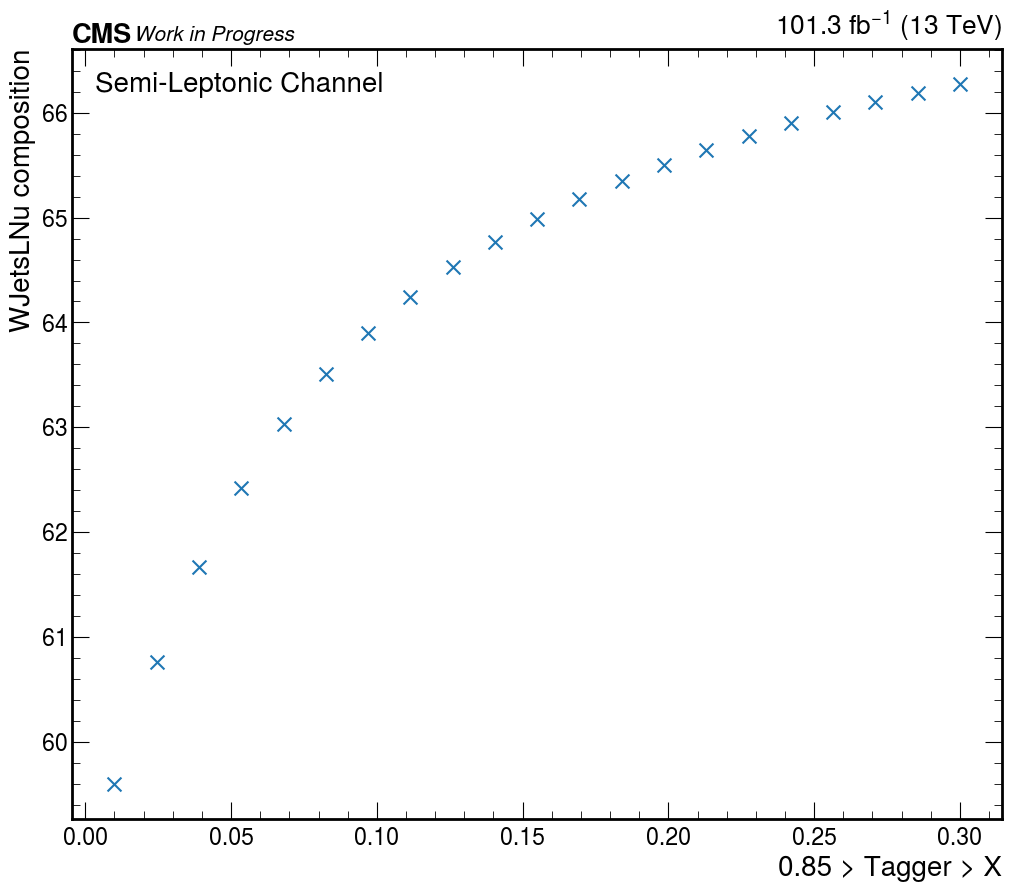

In [456]:
years = ["2018", "2017"]
fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(tagger_cuts, ttt, marker="x", s=100)

# ax.axvline(0.85, color="grey", linestyle="--")#, label=rf"125 GeV")

# ax.set_ylim(0, 1.4)
ax.legend(title=f"Semi-Leptonic Channel")
ax.set_ylabel(r"WJetsLNu composition");
ax.set_xlabel(r"0.85 > Tagger > X")
# ax.set_xlabel(rf"{wp} > Tagger > X")
# ax.set_xticks(tagger_cuts)
# ax.set_xticks([0.9, 0.92, 0.94, 0.96, 0.97, 0.98])

lum_ = 0
for year in years:
    lum = 0
    for ch in channels:
        with open("../fileset/luminosity.json") as f:
            lum += json.load(f)[ch][year] / 1000.0

    lum_ += lum / len(channels)

hep.cms.lumitext("%.1f " % lum_ + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
plt.savefig(f"/Users/fmokhtar/Desktop/farakikopku/soverb_W_region4.pdf")  

# Sculpting

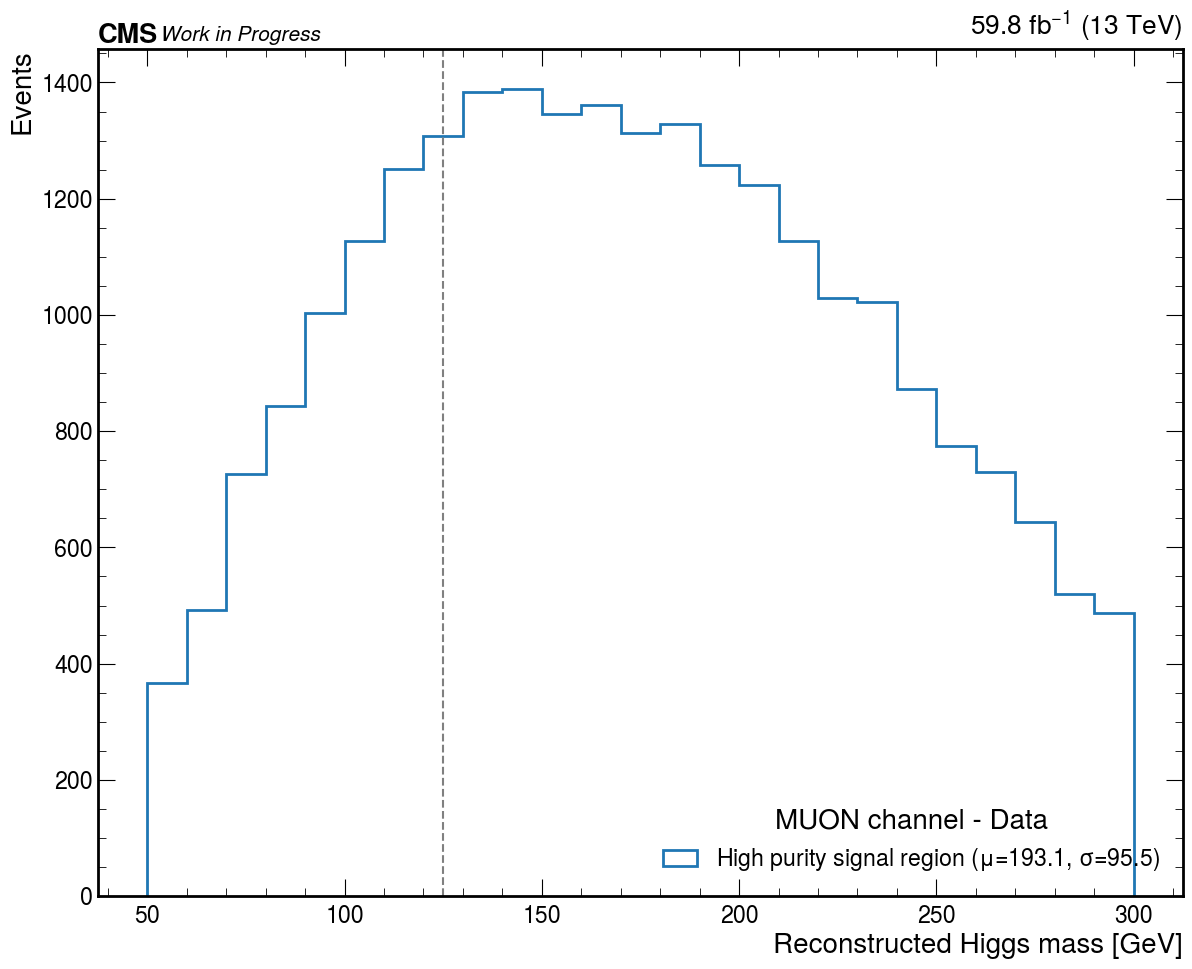

In [531]:
plt.rcParams.update({"font.size": 20})

# tagger = "fj_ParT_score_finetuned_v2_10_12"
tagger = "fj_ParT_score"
# tagger = "fj_ParT_score_finetuned"
presel = {
    "High purity signal region": f"({tagger}>0.97)",
#     "Medium purity signal region": f"({tagger}<0.97) & ({tagger}>0.85)",    
#     "Low purity signal region": f"({tagger}<0.85) & ({tagger}>0.20)",   
    
#     "Top control region": f"({tagger}<0.30) & (n_bjets_T>0)",  

#     "Top control region + dR>0.1": f"({tagger}<0.3) & (n_bjets_T>0) & (lep_fj_dr>0.1)",
#     "Top control region + dR>0.2": f"({tagger}<0.3) & (n_bjets_T>0) & (lep_fj_dr>0.2)",
#     "Top control region + dR>0.3": f"({tagger}<0.3) & (n_bjets_T>0) & (lep_fj_dr>0.3)",
#     "Top control region + dR>0.4": f"({tagger}<0.9) & (n_bjets_T>0) & (lep_fj_dr>0.4)",
    
#     "WJets control region": f"({tagger}<0.80) & ({tagger}>0.20) & (n_bjets_L==0)",

#     "QCD control region": f"({tagger}<0.20) & (n_bjets_T==0)",  
    
#     "ParT-finetuned>0.97": f"(fj_ParT_score_finetuned_v2_nor2>0.97)",
#     "ParT>0.99": f"(fj_ParT_score>0.99)"
    
    
}

nice_ch = {
    "ele": "ELECTRON",
    "mu": "MUON",
}

sample = "Data"
channels = ["mu"]#, "ele"]
years = ["2018"]#, "2017"]

fig, ax = plt.subplots(figsize=(14, 11))
for k, v in presel.items():
    
    for year in years:

        if "QCD" in k:
            region="qcd_region"
        else:
            region="signal_region"

        df1 = events_dict[region][year]["mu"][sample]    
        df2 = events_dict[region][year]["ele"][sample]

        df = pd.concat([df1, df2])

        if len(years) > 1:
            df1 = events_dict[region][years[1]]["mu"][sample]    
            df2 = events_dict[region][years[1]]["ele"][sample]

            df11 = pd.concat([df1, df2])

            df = pd.concat([df, df11])
            break
            
    bins = 26

    df1 = df.copy().query(v)

    x = df1["rec_higgs_m"]
#     w = df1["event_weight"]

    ax.hist(
        x, 
        bins=np.linspace(50,300,bins), 
#         weights=w,
#         density=True, 
        histtype="step", 
        linewidth=2, 
        label=rf"{k} ($\mu$={np.mean(x):.1f}, $\sigma$={np.std(x):.1f})"
    )

ax.axvline(125, color="grey", linestyle="--")#, label=rf"125 GeV")

if len(channels) > 1:
    ax.legend(title=f"{sample}")    
else:
    ax.legend(title=f"{nice_ch[ch]} channel - {sample}")


ax.set_ylabel("Events")
ax.set_xlabel(f"Reconstructed Higgs mass [GeV]")
ax.set_ylim(0)

lum_=0
for year in years:
    lum = 0
    for ch in channels:
        with open("../fileset/luminosity.json") as f:
            lum += json.load(f)[ch][year] / 1000.0

    lum_ += lum / len(channels)

hep.cms.lumitext("%.1f " % lum_ + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
plt.savefig(f"/Users/fmokhtar/Desktop/farakikopku/mass_sculpting_{sample}.pdf")        

In [514]:
all_files = glob.glob("ttt/*")
log_files = glob.glob("ttt/log*")

In [505]:
all_files

['ttt/t', 'ttt/log.txt', 'ttt/a.txt']

In [506]:
log_files

['ttt/log.txt']

# Data

In [121]:
# get lumi
with open("../fileset/luminosity.json") as f:
    luminosity = json.load(f)
    
luminosity

{'ele': {'Run2': 137640.0,
  '2016APV': 19492.72,
  '2016': 16809.96,
  '2017': 41476.02,
  '2018': 59816.23},
 'mu': {'Run2': 137640.0,
  '2016APV': 19436.16,
  '2016': 16810.81,
  '2017': 41475.26,
  '2018': 59781.96},
 'lep': {'Run2': 137640.0,
  '2016APV': 19436.16,
  '2016': 16810.81,
  '2017': 41475.26,
  '2018': 59781.96}}

In [479]:
# ################### option 1
# plt.rcParams.update({"font.size": 20})
# nice_ch = {
#     "ele": "Electron",
#     "mu": "Muon",
# }

# # tagger = "fj_ParT_score"
# tagger = "fj_ParT_score_finetuned"

# region_sel = {
#     "High purity signal region": f"({tagger}>0.97)",
# #     "Medium purity signal region": f"({tagger}<0.97) & ({tagger}>0.85)",    
# #     "Low purity signal region": f"({tagger}<0.85) & ({tagger}>0.20)",   
    
# #     "WJets control region": f"({tagger}<0.85) & ({tagger}>0.20) & (n_bjets_L==0)",
# #     "Top control region": f"({tagger}<0.30) & (n_bjets_T>0)",  
# #     "QCD control region": f"({tagger}<0.20) & (n_bjets_T==0)",  
# }


# ptbins = [
#     (200,300), 
#     (300,450), 
#     (450,650), 
#     (650, 2000)
# ]
# blind = True
# blind_region = (80, 160)
# mult = 10

# ch = "ele"
# years = ["2018", "2017", "2016APV", "2016"]

# fig, axs = plt.subplots(2, 2, figsize=(16,14), constrained_layout=True)

# VBF = True
# for i, ptbin in enumerate(ptbins):
#     xs, ws = {}, {}
#     for sample in ["Data", "ggF", "VBF"]:
#         xs[sample], ws[sample] = [], []
#         for year in years:
        
#             for region, sel in region_sel.items():
#                 if "QCD" in region:
#                     df = events_dict["qcd_region"][year][ch][sample]    
#                 else:
#                     df = events_dict["signal_region"][year][ch][sample]    
#                 df = df.query(sel)
                
#             df = df[(df["fj_pt"]>ptbin[0]) & (df["fj_pt"]<ptbin[1])]
            
#             if VBF:
#                 df = df[df["mjj"]>1000]
#                 df = df[df["deta"]>3.5]
#             else:
#                 df = df[df["mjj"]<1000]
#                 df = df[df["deta"]<3.5]
                
#             x = df["rec_higgs_m"]
#             if blind:
#                 x[(x>blind_region[0]) & (x<blind_region[1])] = 0   # blinding    

#             w = df[f"event_weight"]
            
#             if ((sample=="ggF") or (sample=="VBF")) and (mult!=1):
#                 w=w*mult
#                 lab=f"{mult} * {sample}"
#             else:
#                 lab=sample
                
#             xs[sample] += x.tolist()
#             ws[sample] += w.tolist() 

#         bins = 20
#         if i<2:
#             axs[0, i].hist(
#                 xs[sample], 
#                 weights=ws[sample],                    
#                 bins=np.linspace(50,240,bins),  
#                 histtype="step", 
#                 linewidth=2,
#                 label=lab,                    
#             )
#         else:
#             axs[1, i-2].hist(
#                 xs[sample],
#                 weights=ws[sample],                    
#                 bins=np.linspace(50,240,bins), 
#                 histtype="step", 
#                 linewidth=2, 
#                 label=lab,
#             )            

# lum = 0
# for year in years:
#     lum += luminosity[ch][year] / 1000.0

# for i, ax in enumerate([axs[0,0], axs[0,1], axs[1,0], axs[1,1]]):
#     lab = list([str(ptbin_) for ptbin_ in ptbins[i]])
#     for j, v in enumerate(lab):
#         if v=="2000":
#             lab[j] = "inf"
#     ax.legend(title=rf"$p_T$ $\in$ [{','.join(lab)}]", loc="upper left")
    
#     ax.set_ylabel(f"Events ({nice_ch[ch]} channel)")
#     ax.set_xlabel(f"Reconstructed Higgs mass [GeV]")
    
#     if i==3:
#         ax.set_ylim(0,4)
#         ax.set_yticks([0,1,2,3])
#     else:
#         ax.set_ylim(0)    

#     hep.cms.lumitext("%.1f " % lum + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
#     hep.cms.text("Work in Progress", ax=ax, fontsize=15)
# # plt.savefig(f"/Users/fmokhtar/Desktop/farakikopku2/Data_ggF_{ch}_option1.pdf")        

INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral


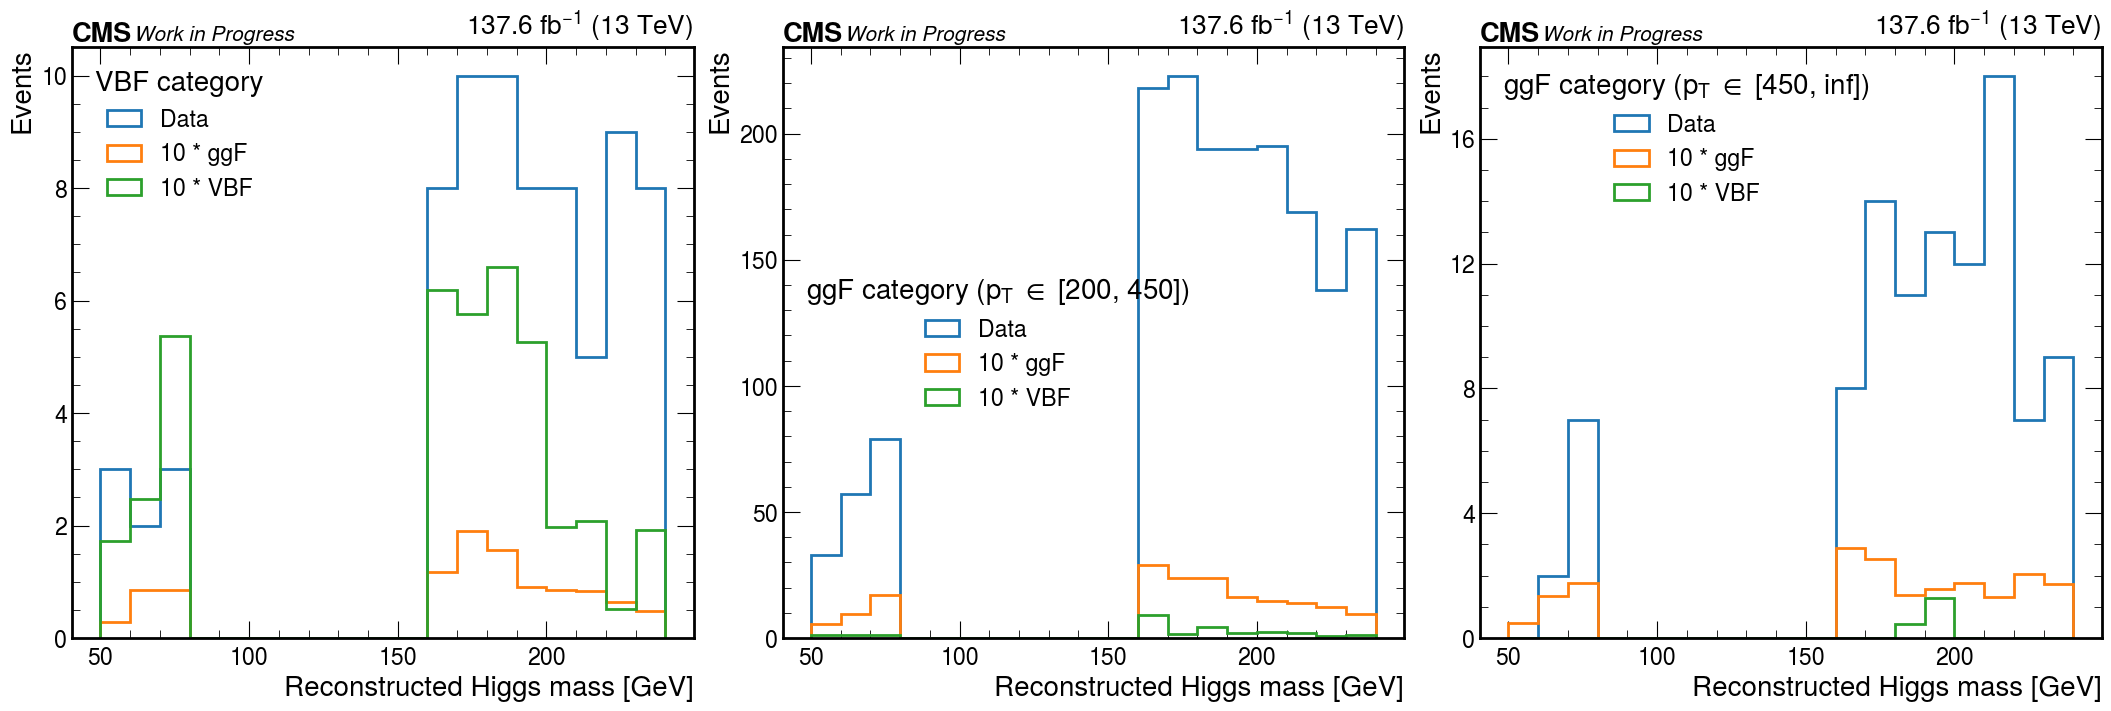

In [615]:
################### option 2
plt.rcParams.update({"font.size": 20})
nice_ch = {
    "ele": "Electron",
    "mu": "Muon",
}

# tagger = "fj_ParT_score"
tagger = "fj_ParT_score_finetuned"

region_sel = {
    "High purity signal region": f"({tagger}>0.97)",
#     "Medium purity signal region": f"({tagger}<0.97) & ({tagger}>0.85)",    
#     "Low purity signal region": f"({tagger}<0.85) & ({tagger}>0.20)",   
    
#     "WJets control region": f"({tagger}<0.85) & ({tagger}>0.20) & (n_bjets_L==0)",
#     "Top control region": f"({tagger}<0.30) & (n_bjets_T>0)",  
#     "QCD control region": f"({tagger}<0.20) & (n_bjets_T==0)",  
}

categories = {
    "VBF category": "(mjj>1000) & (deta>3.5)",
    rf"ggF category ($p_T$ $\in$ [200, 450])": "(mjj<1000) & (deta<3.5) & (fj_pt>200) & (fj_pt<450)",
    rf"ggF category ($p_T$ $\in$ [450, inf])": "(mjj<1000) & (deta<3.5) & (fj_pt>450)",
}

blind = True
blind_region = (80, 160)
mult = 10

channels = ["mu", "ele"]
years = ["2018", "2017", "2016APV", "2016"]
lum = 0
for year in years:
    lum += luminosity[ch][year] / 1000.0
    
fig, axs = plt.subplots(1, 3, figsize=(21,7), constrained_layout=True)
    
xs, ws = {}, {}
for i, (category, sel_category) in enumerate(categories.items()):
    for sample in ["Data", "ggF", "VBF"]:
        xs[sample], ws[sample] = [], []
        for year in years:
            
            for ch in channels:
                for region, sel in region_sel.items():
                    if "QCD" in region:
                        df = events_dict["qcd_region"][year][ch][sample]    
                    else:
                        df = events_dict["signal_region"][year][ch][sample]    
                    df = df.query(sel)
                    
                df = df.query(sel_category)

                x = df["rec_higgs_m"]
#                 if blind and (sample=="Data"):
                if blind:
                    
                    x[(x>blind_region[0]) & (x<blind_region[1])] = 0   # blinding    

                w = df[f"event_weight"]

                if ((sample=="ggF") or (sample=="VBF")) and (mult!=1):
                    w=w*mult
                    lab=f"{mult} * {sample}"
                else:
                    lab=sample

                xs[sample] += x.tolist()
                ws[sample] += w.tolist()

        axs[i].hist(
            xs[sample], 
            weights=ws[sample],
            bins=np.linspace(50,240,20),  
            histtype="step", 
            linewidth=2, 
            label=lab
        )          
    axs[i].legend(title=category)
    axs[i].set_ylabel(f"Events")
    axs[i].set_xlabel(f"Reconstructed Higgs mass [GeV]")
    axs[i].set_ylim(0)    
    hep.cms.lumitext("%.1f " % lum + r"fb$^{-1}$ (13 TeV)", ax=axs[i], fontsize=20)
    hep.cms.text("Work in Progress", ax=axs[i], fontsize=15)
    if i==2:
        axs[i].set_yticks([0,4,8,12,16])
    
# plt.savefig(f"/Users/fmokhtar/Desktop/farakikopku2/VBF_ggF_high.pdf")

In [655]:
list(range(50, 240, 20))

[50, 70, 90, 110, 130, 150, 170, 190, 210, 230]

In [ ]:

    
# plt.savefig(f"/Users/fmokhtar/Desktop/farakikopku2/VBF_ggF_high.pdf")

In [622]:
var

'rec_higgs_m'

In [686]:
################### option 2
def blindBins(h, blind_region, blind_samples=[]):
    """
    Blind (i.e. zero) bins in histogram ``h``.
    If ``blind_samples`` specified, only blind those samples, else blinds all.

    CAREFUL: assumes axis=0 is samples, axis=3 is mass_axis

    """

    h = h.copy()

    massbins = h.axes["mass_observable"].edges

    lv = int(np.searchsorted(massbins, blind_region[0], "right"))
    rv = int(np.searchsorted(massbins, blind_region[1], "left") + 1)

    if blind_samples:
        for blind_sample in blind_samples:
            sample_index = np.argmax(np.array(list(h.axes[0])) == blind_sample)
            h.view(flow=True)[sample_index, :, :, lv:rv] = 0

    else:
        h.view(flow=True)[:, :, :, lv:rv] = 0

    return h

plt.rcParams.update({"font.size": 20})

# tagger = "fj_ParT_score"
tagger = "fj_ParT_score_finetuned"

regions_sel = {
    "High purity signal region": f"({tagger}>0.97)",
    "Medium purity signal region": f"({tagger}<0.97) & ({tagger}>0.85)",    
#     "Low purity signal region": f"({tagger}<0.85) & ({tagger}>0.20)",   
    
#     "WJets control region": f"({tagger}<0.85) & ({tagger}>0.20) & (n_bjets_L==0)",
#     "Top control region": f"({tagger}<0.30) & (n_bjets_T>0)",  
#     "QCD control region": f"({tagger}<0.20) & (n_bjets_T==0)",  
}

categories_sel = {
    "VBF category": "(mjj>1000) & (deta>3.5)",
    rf"ggF category ($p_T$ $\in$ [200, 450])": "(mjj<1000) & (deta<3.5) & (fj_pt>200) & (fj_pt<450)",
    rf"ggF category ($p_T$ $\in$ [450, inf])": "(mjj<1000) & (deta<3.5) & (fj_pt>450)",
}

samples = ["Data", "ggF", "VBF"]
channels = ["ele", "mu"]
blind = True
blind_region = (80, 160)

years = ["2018", "2017", "2016", "2016APV"]
lum = 0
for year in years:
    lum += luminosity[ch][year] / 1000.0
    

# fill histograms
hists = hist2.Hist(
    hist2.axis.StrCategory([], name="samples", growth=True),            
    hist2.axis.StrCategory([], name="regions", growth=True),
    hist2.axis.StrCategory([], name="categories", growth=True),    
    hist2.axis.Variable(
        list(range(50, 240, 10)), name="mass_observable", label=r"Higgs reconstructed mass [GeV]", overflow=True
    ),
)        

mult = {
    "High purity signal region": 10,
    "Medium purity signal region": 100,
}

for sample in samples:
    for year in years:
        for ch in channels:
            df = events_dict["signal_region"][year][ch][sample]
            for region, region_sel in regions_sel.items():
                for category, category_sel in categories_sel.items():
                    df1 = df.copy().query(region_sel)
                    df1 = df1.query(category_sel)

                    if "High" in region_sel:
                        if sample == "QCD":
                            df1 = df1[df1["event_weight"]<140]
                    elif "Medium" in region_sel:
                        if sample == "QCD":
                            df1 = df1[df1["event_weight"]<200]

                    if ((sample=="ggF") or (sample=="VBF")):
                        df1["event_weight"]=df1["event_weight"]*mult[region]

                    hists.fill(
                        samples=sample,
                        regions=region,
                        categories=category,
                        mass_observable=df1["rec_higgs_m"],
                        weight=df1["event_weight"],
                    )

INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \in from STIXGeneral


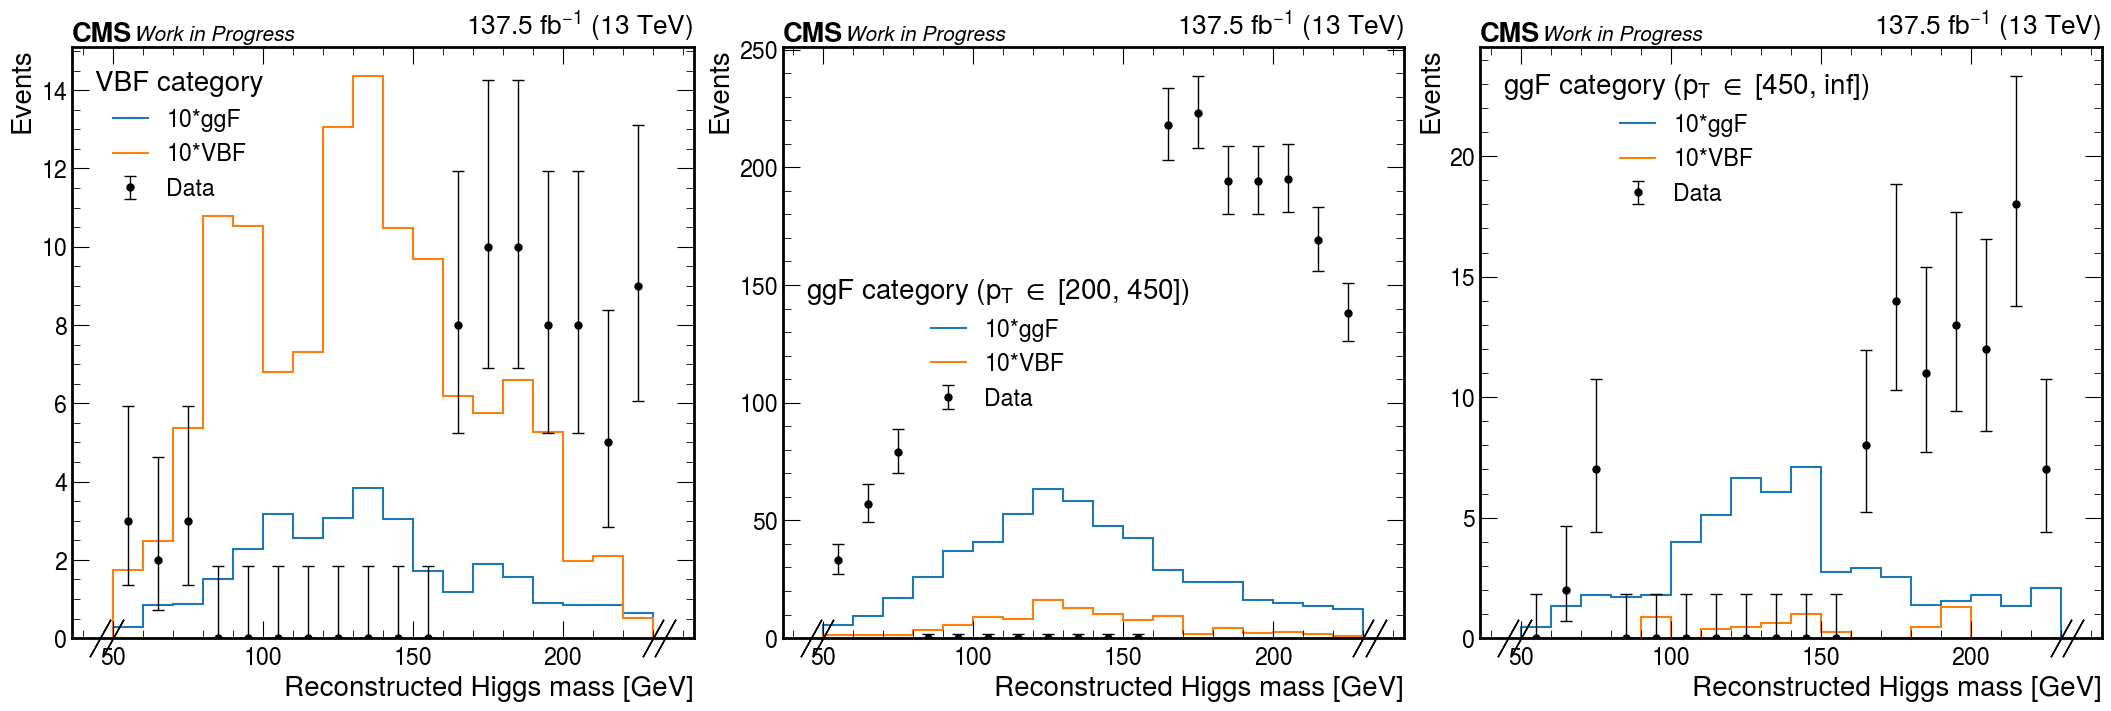

In [688]:
fig, axs = plt.subplots(1, 3, figsize=(21,7), constrained_layout=True)

region = "High purity signal region"
for i, category in enumerate(categories_sel):
    for sample in samples:
        
        
        if sample == "Data":
            if blind:
                hists = blindBins(hists, (blind_region[0],blind_region[1]), blind_samples=["Data"])
            
            hep.histplot(
                hists[{"samples": sample, "regions": region, "categories": category}],
                ax=axs[i],
                label=sample,
                histtype="errorbar",
                color="k",
                capsize=4,           
            )   
            
        else:
            if mult[region]==1:
                lab = sample            
            else:
                lab = f"{mult[region]}*{sample}"
            
            hep.histplot(
                hists[{"samples": sample, "regions": region, "categories": category}],
                ax=axs[i],
                histtype="step",
                label=lab,
            )    
            
    axs[i].legend(title=category)
    axs[i].set_ylabel(f"Events")
    axs[i].set_xlabel(f"Reconstructed Higgs mass [GeV]")
    axs[i].set_ylim(0)    
    hep.cms.lumitext("%.1f " % lum + r"fb$^{-1}$ (13 TeV)", ax=axs[i], fontsize=20)
    hep.cms.text("Work in Progress", ax=axs[i], fontsize=15)
#     if i==2:
#         axs[i].set_yticks([0,4,8,12,16])
plt.savefig(f"/Users/fmokhtar/Desktop/farakikopku3/pt450_VBF_ggF_high_pku.pdf")

# QCD

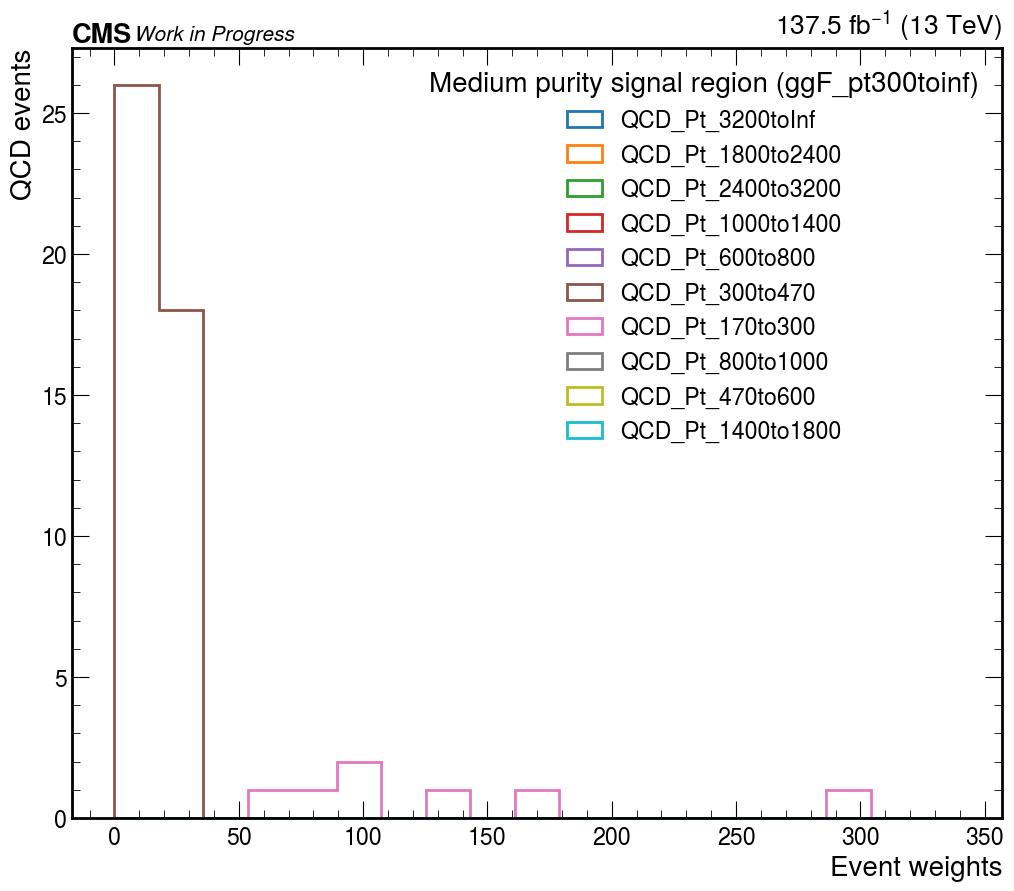

In [573]:
################### option 1
plt.rcParams.update({"font.size": 20})
nice_ch = {
    "ele": "Electron",
    "mu": "Muon",
}

# tagger = "fj_ParT_score"
tagger = "fj_ParT_score_finetuned"

region_sel = {
#     "High purity signal region": f"({tagger}>0.97)",
    "Medium purity signal region": f"({tagger}<0.97) & ({tagger}>0.85)",    
#     "Low purity signal region": f"({tagger}<0.85) & ({tagger}>0.20)",   
    
#     "WJets control region": f"({tagger}<0.85) & ({tagger}>0.20) & (n_bjets_L==0)",
#     "Top control region": f"({tagger}<0.30) & (n_bjets_T>0)",  
#     "QCD control region": f"({tagger}<0.20) & (n_bjets_T==0)",  
}
categories_sel = {
#     "VBF_pt200toinf": "( (mjj>1000) & (deta>3.5) )",
#     "ggF_pt200to300": "( (mjj<1000) & (deta<3.5) & (fj_pt<300) )",
    "ggF_pt300toinf": "( (mjj<1000) & (deta<3.5) & (fj_pt>300) )",
    
}
blind = True
blind_region = (80, 160)
mult = 10

years = ["2018", "2017", "2016APV", "2016"]
sample="QCD"

fig, ax = plt.subplots(figsize=(12,10))    

ws = {}

for sample in events_dict2["signal_region"]["2017"][ch]:
    ws[sample] = []
    for year in years:
        for ch in ["ele", "mu"]:
            try:
                df = events_dict2["signal_region"][year][ch][sample]
            except:
                continue

            for region, sel in region_sel.items():
                df = df.query(sel)

            for category, category_sel in categories_sel.items():
                df = df.query(category_sel)

            w = df[f"event_weight"]
            ws[sample] += w.tolist() 
    
    ws[sample] = np.array(ws[sample])
    ws[sample] = ws[sample][ws[sample]>10]

    bins = 20
    ax.hist(
        ws[sample],
        bins=np.linspace(0,340,bins), 
        histtype="step", 
        linewidth=2, 
        label=sample
    )
#     break

lum = 0
for year in years:
    lum += luminosity[ch][year] / 1000.0

ax.legend(title=f"{region} ({category})", loc="upper right")

ax.set_ylabel(f"QCD events")
ax.set_xlabel(f"Event weights")  
ax.set_ylim(0)

hep.cms.lumitext("%.1f " % lum + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
plt.savefig(f"/Users/fmokhtar/Desktop/farakikopku2/WWW_QCD_weights_medium_{category}.pdf")        

In [740]:
def plot_ratio(h, years, region1 = "Medium_signal_region", region2 = "QCD_region", sample="QCD", category="VBF", tag=""):
    
    fig, (ax, rax) = plt.subplots(
        nrows=2,
        ncols=1,
        figsize=(10, 10),
        gridspec_kw={"height_ratios": (4, 2), "hspace": 0.07},
        sharex=True,
    )

    hep.histplot(
        h[{"region": region1, "categories": category}],
        ax=ax,
#         histtype="step",
        histtype="errorbar",        
        label=region1,
        density=True
    )
    hep.histplot(
        h[{"region": region2, "categories": category}],
        ax=ax,
        histtype="step",
        label=region2,
        density=True    
    )

    from hist.intervals import ratio_uncertainty

    data_val = h[{"region": region1, "categories": category}].values()
    tot_val = h[{"region": region2, "categories": category}].values()
    yerr = ratio_uncertainty(data_val, tot_val, "poisson")
    

    data_val /= data_val.sum()
    tot_val /= tot_val.sum()


    hep.histplot(
        data_val / tot_val,
        h[{"region": region1, "categories": category}].axes.edges[0],
        yerr=yerr,
        ax=rax,
        histtype="step",
        color="k",
#         capsize=4,
    )
    ax.set_xlabel("")
    rax.set_xlabel(f"{h.axes[-1].label}")  # assumes the variable to be plotted is at the last axis

    rax.set_ylabel("Ratio", fontsize=20, loc="center")

    
#     rax.set_ylim(0, 0.004)
#     rax.set_yticks([0, 0.4, 1, 1.4])
    
    rax.axhline(1, ls="--", color="k")    
#     rax.set_ylim(0, 2.5)
#     rax.set_yticks([0, 0.4, 1, 1.4])

    ax.legend(title=category)
    
    lum_ = 0
    for year in years:
        lum = 0
        for ch in ["ele", "mu"]:
            with open("../fileset/luminosity.json") as f:
                lum += json.load(f)[ch][year] / 1000.0

        lum_ += lum / len(channels)

    hep.cms.lumitext("%.1f " % lum_ + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)

    hep.cms.text("Work in Progress", ax=ax, fontsize=15)
    
    
    ax.set_ylabel(f"Normalized {sample} events")
    
    if tag:
        plt.savefig(f"/Users/fmokhtar/Desktop/farakikopku3/ratio_{sample}_{tag}.pdf")        
    else:
        plt.savefig(f"/Users/fmokhtar/Desktop/farakikopku3/ratio_{sample}.pdf")   

In [741]:
tagger = "fj_ParT_score_finetuned"
presel = {
    "High purity signal region": f"({tagger}>0.97)",
    "Medium purity signal region": f"({tagger}<0.97) & ({tagger}>0.85)",
    "Low purity signal region": f"({tagger}<0.85) & ({tagger}>0.20)",
    "0.85>Tagger>0.20": f"({tagger}<0.85) & ({tagger}>0.20)",

#     "WJets control region": f"({tagger}<0.85) & ({tagger}>0.20) & (n_bjets_L==0)",   
    
#     "Top control region": f"({tagger}<0.20) & (n_bjets_T>0)",  
    "QCD control region": f"({tagger}<0.20) & (n_bjets_T==0)",  

}

categories_sel = {
    "VBF_pt200toinf": "( (mjj>1000) & (deta>3.5) )",
    "ggF_pt200to300": "( (mjj<1000) & (deta<3.5) & (fj_pt<300) )",
    "ggF_pt300toinf": "( (mjj<1000) & (deta<3.5) & (fj_pt>300) )",
    
}
            
channels = ["ele", "mu"]
years = ["2018", "2017", "2016", "2016APV"]

sample = "QCD"

# fill histograms
hists = {}
for var in vars_to_plot:
            
    if var == "rec_higgs_m":
        hists[var] = hist2.Hist(
            hist2.axis.StrCategory([], name="region", growth=True),
            hist2.axis.StrCategory([], name="categories", growth=True),            
            hist2.axis.Variable(
                list(range(50, 240, 20)), name="mass_observable", label=r"Higgs reconstructed mass [GeV]", overflow=True
            )
        )
    else:
        hists[var] = hist2.Hist(
            hist2.axis.StrCategory([], name="region", growth=True),
            utils.axis_dict[var],
        )
        
    for year in years:
        for ch in channels:
                
            for region, region_sel in presel.items():
                for category, category_sel in categories_sel.items():
                
                    if "QCD control region" in region:
                        df = events_dict["qcd_region"][year][ch][sample]
                    else:
                        df = events_dict["signal_region"][year][ch][sample]

                    if "High" in region:
                        if sample == "QCD":
                            df = df[df["event_weight"]<140]
                    elif "Medium" in region:
                        if sample == "QCD":
                            df = df[df["event_weight"]<200]

                    df = df.query(region_sel)
                    df = df.query(category_sel)

                    hists[var].fill(
                        region=region,
                        categories=category,
                        mass_observable=df[var],
                        weight=df["event_weight"],
                    )     

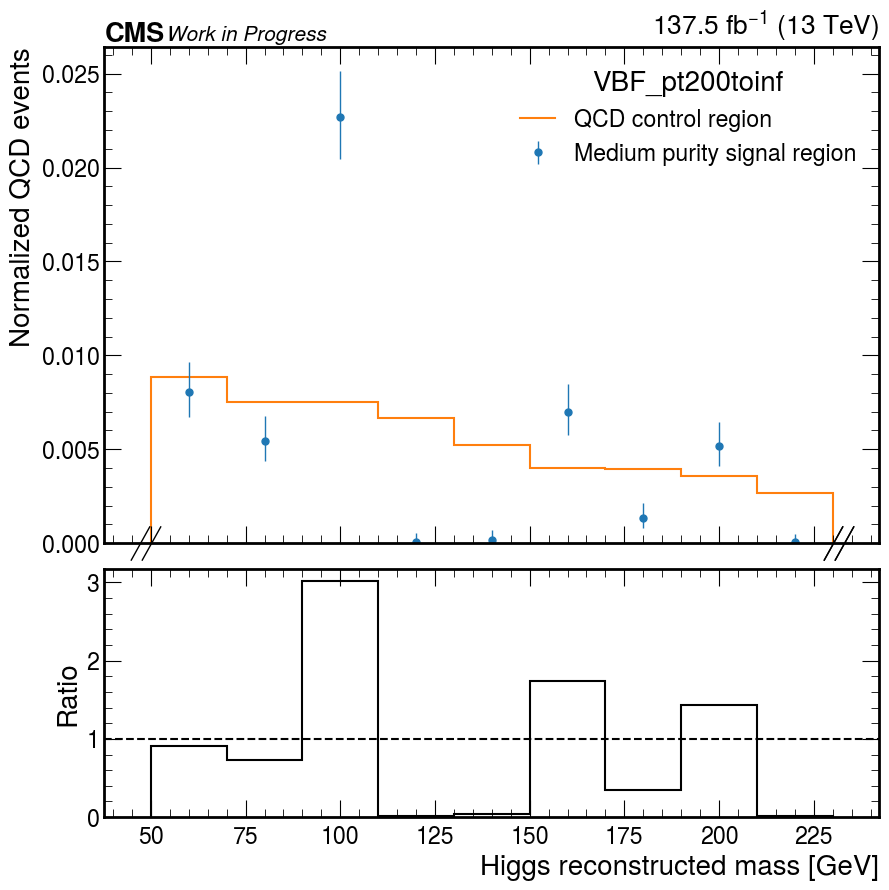

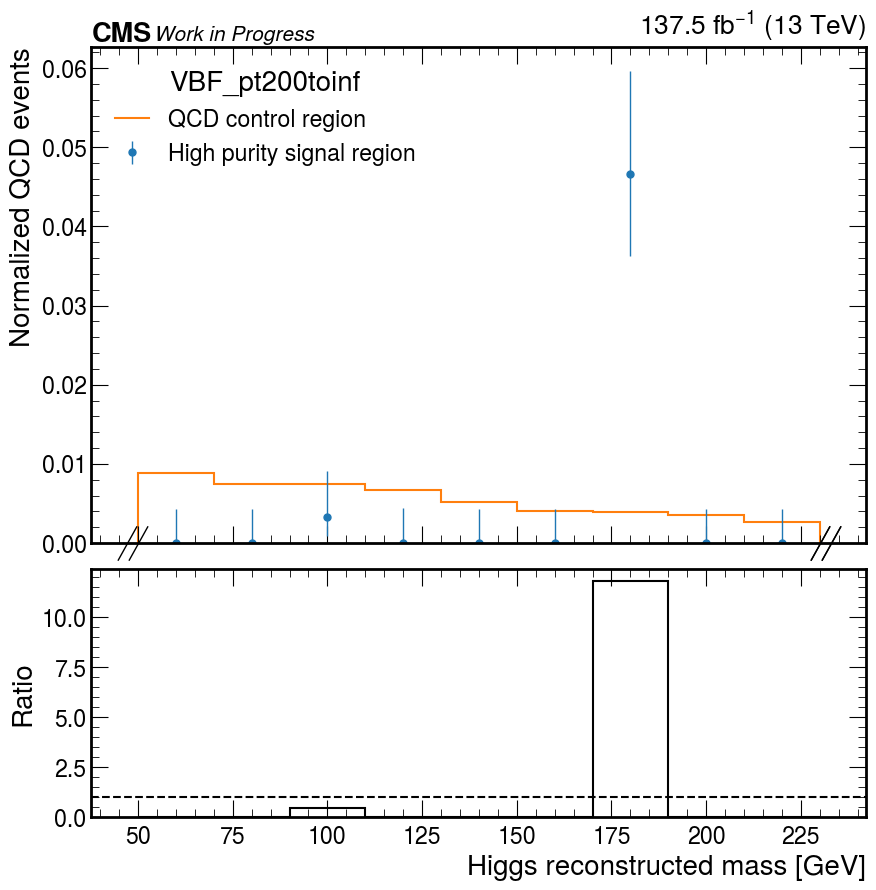

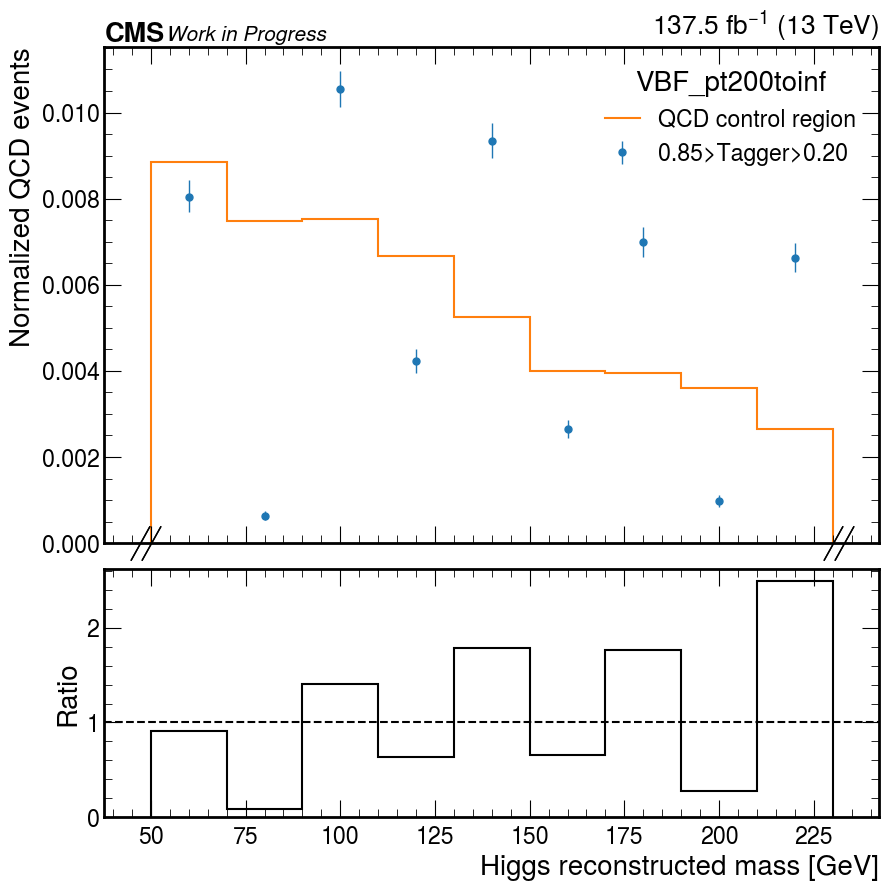

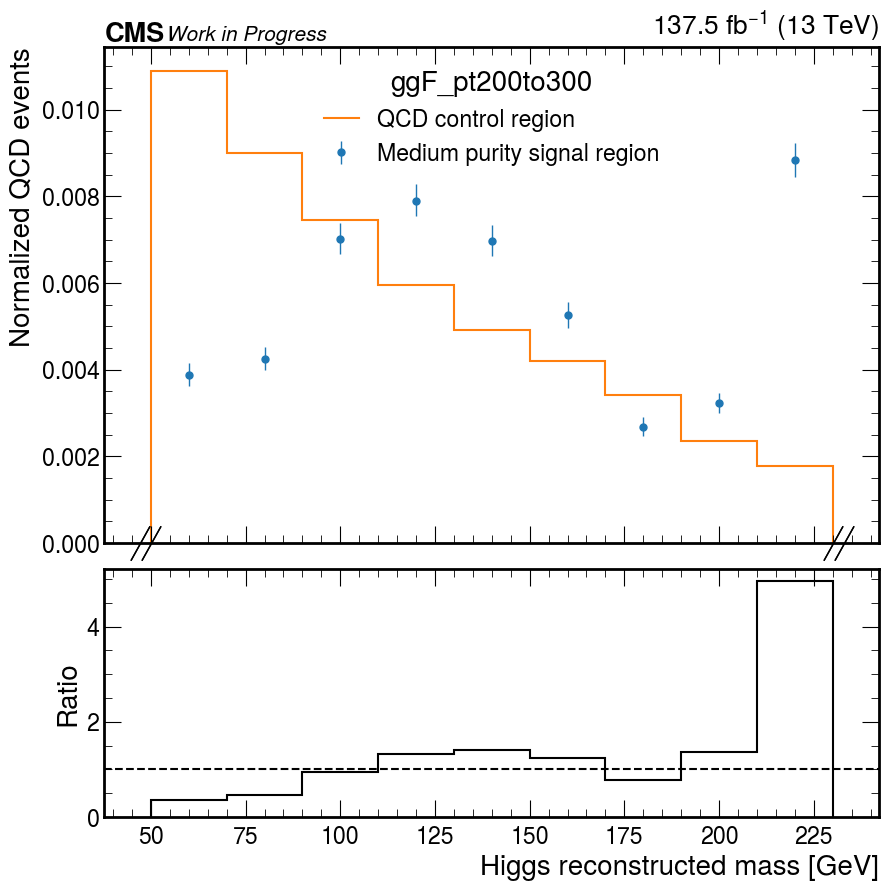

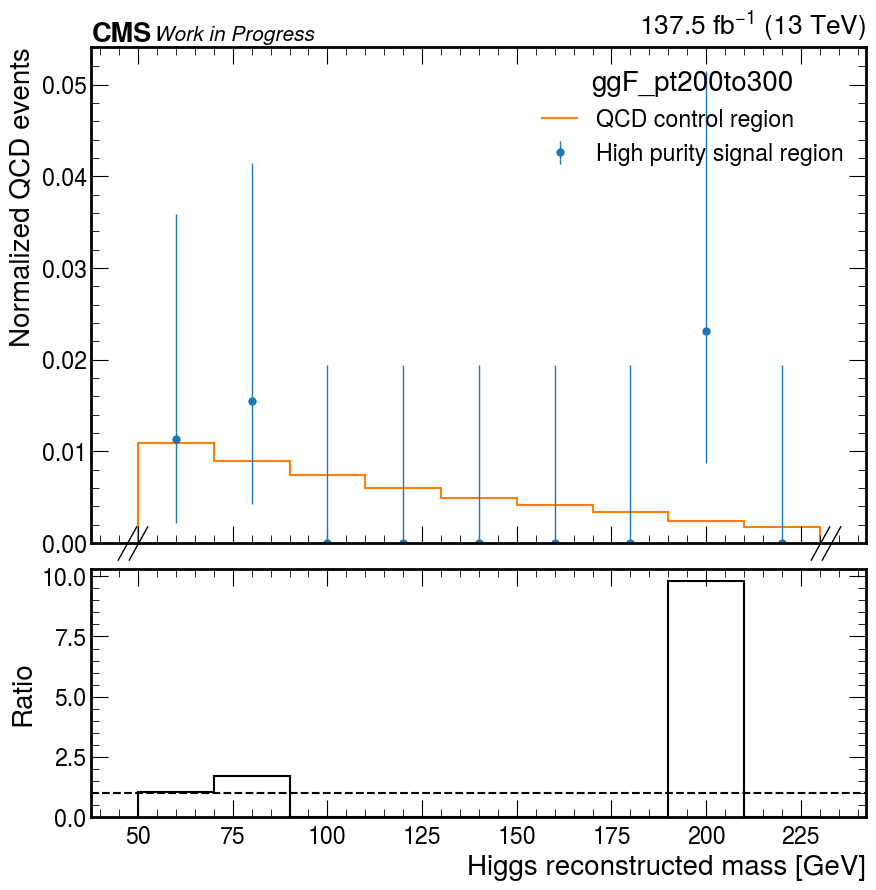

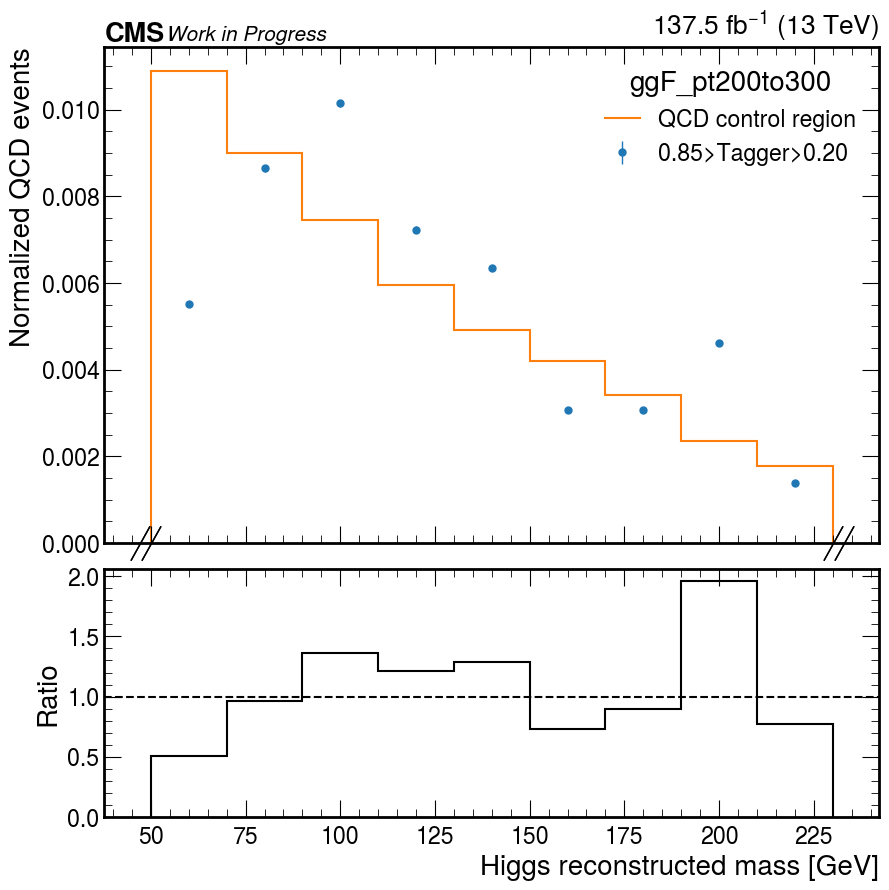

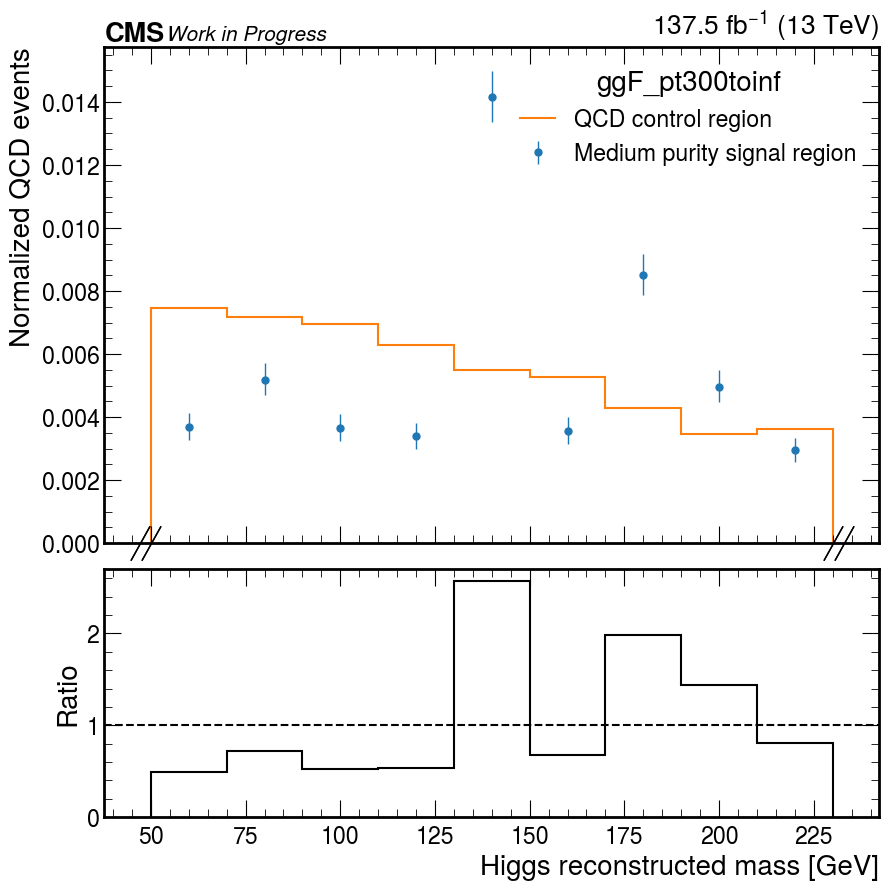

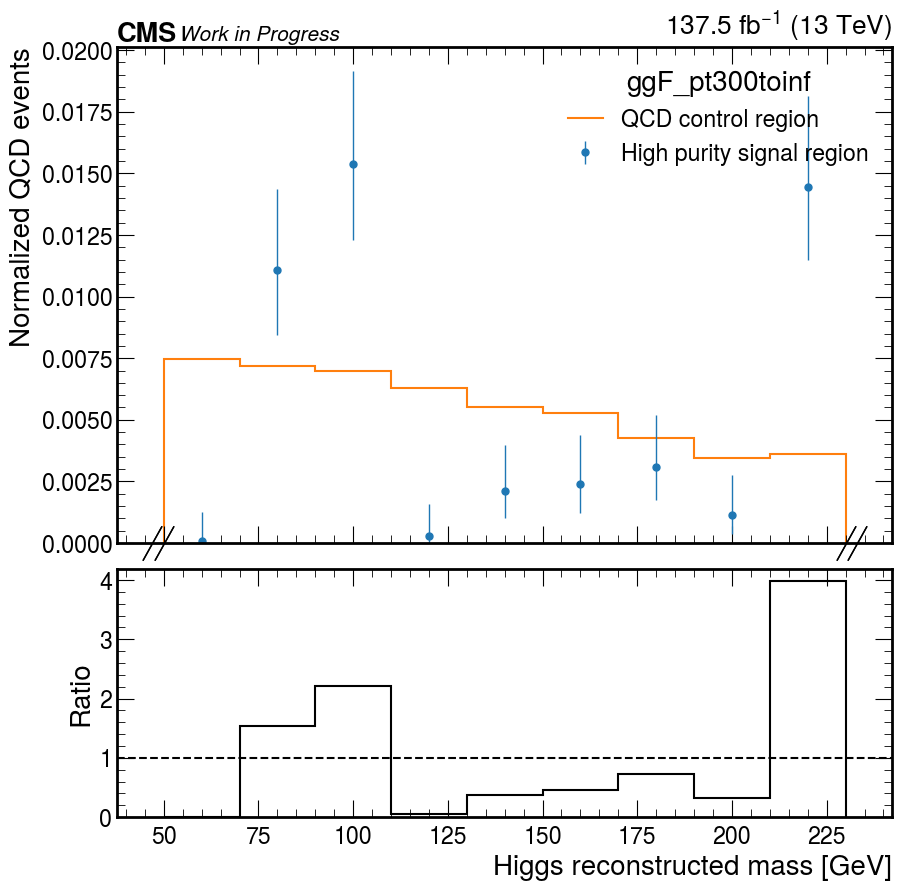

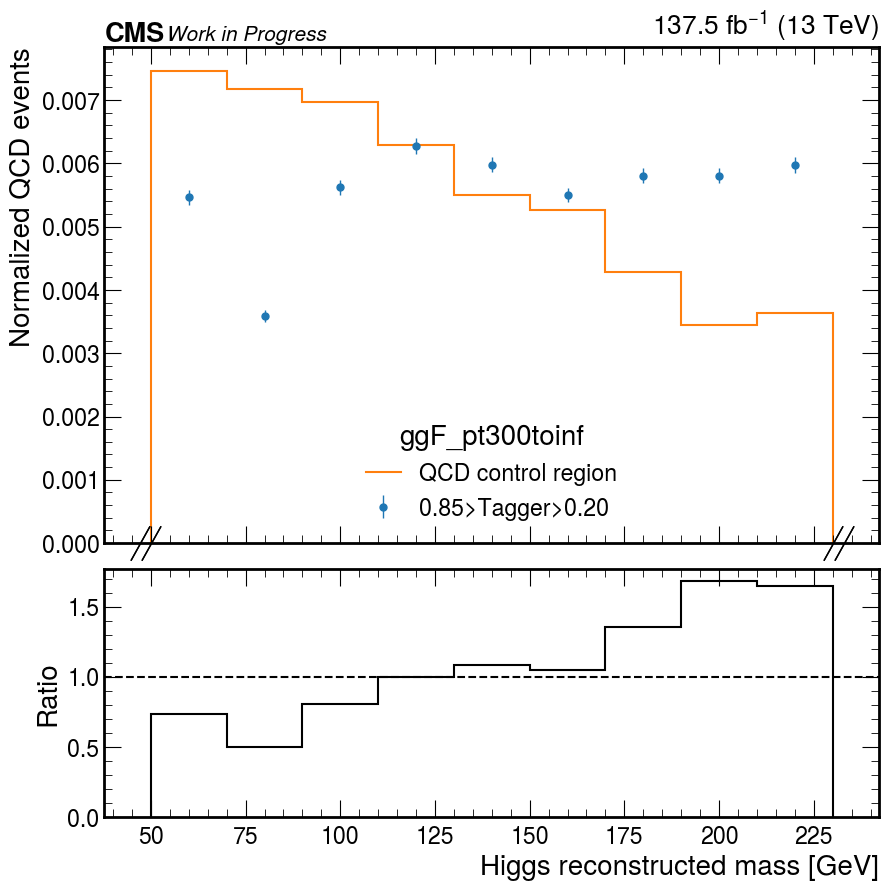

In [754]:
region_dic = {
    "Medium purity signal region": "medium",
    "High purity signal region": "high",
    "0.85>Tagger>0.20": "low",    
}

for category in ["VBF_pt200toinf", "ggF_pt200to300", "ggF_pt300toinf"]:
    
    for region in region_dic:
        plot_ratio(hists["rec_higgs_m"], 
                   years, 
                   region1 = region,
                   region2 = "QCD control region",
                   sample=sample,
                   category=category,
                   tag=f"{category}_{region_dic[region]}"
                  )

In [ ]:
fig, ax = plt.subplots(figsize=(14, 11))
ax.hist(
    x, 
    bins=np.linspace(50,300,bins), 
    weights=w,
    density=True, 
    histtype="step", 
    linewidth=2, 
    label=rf"{k} ($\mu$={np.mean(x):.1f}, $\sigma$={np.std(x):.1f})"
)

ax.axvline(125, color="grey", linestyle="--", label=rf"125 GeV")

if len(channels) > 1:
    ax.legend(title=f"{sample}")    
else:
    ax.legend(title=f"{nice_ch[ch]} channel - {sample}")


ax.set_ylabel("Events")
ax.set_xlabel(f"Reconstructed Higgs mass [GeV]")
ax.set_ylim(0)

lum_=0
for year in years:
    lum = 0
    for ch in channels:
        with open("../fileset/luminosity.json") as f:
            lum += json.load(f)[ch][year] / 1000.0

    lum_ += lum / len(channels)

hep.cms.lumitext("%.1f " % lum_ + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
plt.savefig(f"/Users/fmokhtar/Desktop/farakikopku/mass_sculpting_{sample}.pdf")        

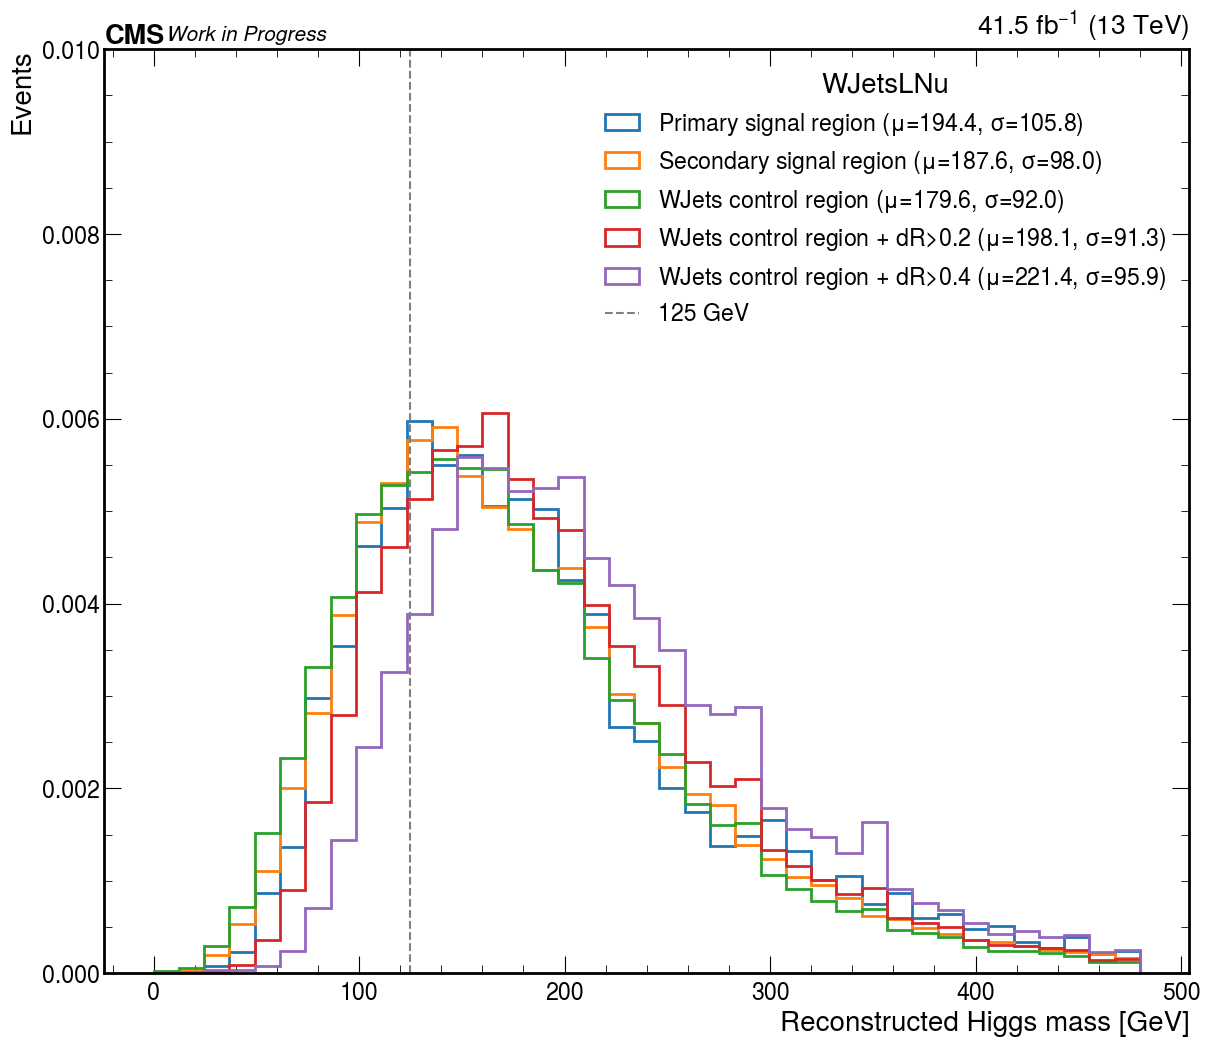

In [140]:
fig, ax = plt.subplots(figsize=(14, 12))
for region, sel in presel.items():

    df1 = df.copy().query(sel)

    x = df1["rec_higgs_m"]
    ax.hist(
        x, 
        bins=np.linspace(0,480,bins), 
        weights=df1["weight"],
        density=True, 
        histtype="step", 
        linewidth=2, 
        label=rf"{region} ($\mu$={np.mean(x):.1f}, $\sigma$={np.std(x):.1f})"
    )

ax.axvline(125, color="grey", linestyle="--", label=rf"125 GeV")

if len(channels) > 1:
    ax.legend(title=f"{sample}")    
else:
    ax.legend(title=f"{nice_ch[ch]} channel - {sample}")


ax.set_ylabel("Events")
ax.set_xlabel(f"Reconstructed Higgs mass [GeV]")
ax.set_ylim(0, 0.01)

luminosity = 0
for year in years:
    lum = 0
    for ch in channels:
        with open("../fileset/luminosity.json") as f:
            lum += json.load(f)[ch][year] / 1000.0

    luminosity += lum / len(channels)    
        
hep.cms.lumitext("%.1f " % luminosity + r"fb$^{-1}$ (13 TeV)", ax=ax, fontsize=20)
hep.cms.text("Work in Progress", ax=ax, fontsize=15)
plt.savefig(f"/Users/fmokhtar/Desktop/farakiko/{sample}.pdf")  

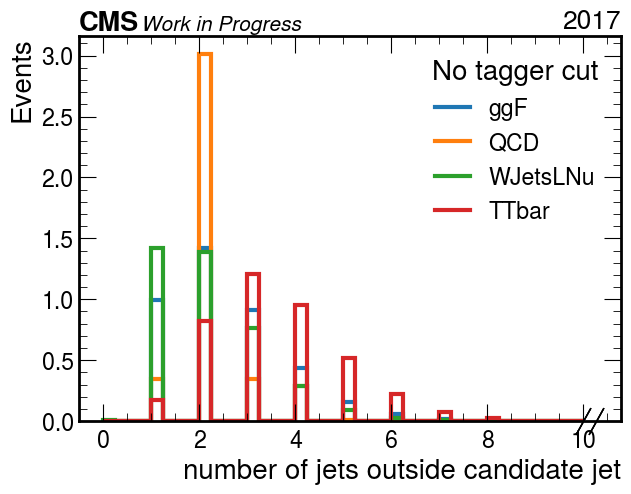

In [20]:
samples_to_plot = [
    "HWW", 
#     "VH",
#     "VBF",
#     "ttH",
     "QCD",
#     "DYJets",
    "WJetsLNu",
    "TTbar",
]

### Example of a 1-d histogram
# make simple 1d-histogram of `lep_pt`
plt.rcParams.update({"font.size": 20})

var = "nj"
# var = "met_fj_dphi"
# var = "lep_met_mt"
# var = "mjj"


h = hist2.Hist(
    hist2.axis.StrCategory([], name="samples", growth=True),
    utils.axis_dict[var],
)  
    
fig, ax = plt.subplots(figsize=(7, 5))

for sample in samples_to_plot:
    for year in years:
        for ch in channels:

            df = events_dict[year][ch][sample]

            # tagger cut
    #         df = df[df["inclusive_score"]>0.9]

    #         df = df[df["lep_fj_dr"]>0.03]        
            df = df[df["n_bjets_M"]<2]
    #         df = df[(df["rec_W_lnu_pt"]/df["rec_W_qq_pt"])<4.8]

            h.fill(
                samples=sample,
                var=df[var],
                weight=df["event_weight"]
            )

for sample in samples_to_plot:
    if sample in utils.sig_labels:
        lab = utils.sig_labels[sample]
    else:
        lab = sample
        
    hep.histplot(
        h[{"samples":sample}],
        ax=ax,
        label=lab,
        linewidth=3,
        density=True
    )

# ax.set_title("Without dR(Jet,Lepton)>0.03")
ax.legend(title=f"No tagger cut")
ax.set_ylabel("Events");  
hep.cms.lumitext(
    "2017", ax=ax, fontsize=20
)
hep.cms.text("Work in Progress", ax=ax, fontsize=15);

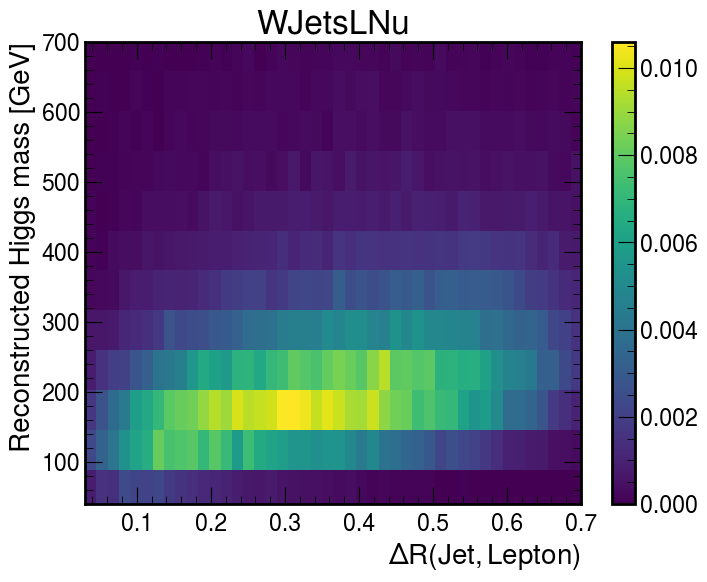

In [16]:
samples_to_plot = [
#     "HWW", 
#     "VH",
#     "VBF",
#     "ttH",
#      "QCD",
#     "DYJets",
    "WJetsLNu",
#     "TTbar",
]

var1 = "lep_fj_dr"
var2 = "rec_higgs_m"

from matplotlib.colors import LogNorm
fig, ax = plt.subplots(figsize=(8, 6))

for sample in samples_to_plot:
    for year in years:
        for i, ch in enumerate(channels):
            df = events_dict[year][ch][sample]

            df = df[df["inclusive_score"]>0.99]
            df = df[df["fj_pt"]>220]

            if i==0:
                dff = df
            else:
                dff = pd.concat([dff, df])


    x = dff[var1].dropna()
    y = dff[var2].dropna()

    plt.hist2d(
        x,
        y,
        density=True,
#         norm=LogNorm(),
        bins=[50,50]
          )

ax.set_xlim(0.03,0.7)
ax.set_ylim(40, 700)
ax.set_xlabel(r"$\Delta R(Jet,Lepton)}$");
ax.set_ylabel(r"Reconstructed Higgs mass [GeV]");
ax.set_title(sample)
plt.colorbar()

### save plot
save_as = f"/Users/fmokhtar/Desktop/hww/{samples_dir[3:]}/"
plt.savefig(f"{save_as}/2d-{var1}-{var2}-{sample}.pdf", bbox_inches='tight')